In [18]:
import melanoma as mel

%matplotlib inline
%load_ext autoreload
%autoreload -p 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

rootpath = '/hpcstor6/scratch01/s/sanghyuk.kim001'
img_size = (224, 224) # height, width
utilInstance = mel.Util(rootpath, img_size)
dataType = mel.DatasetType.ISIC2017


CREATE_DB = 1
# Save datasets as pickle files
if (CREATE_DB == 1):
    utilInstance.saveDatasetsToFile(dataType, 1.2)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
path:  /hpcstor6/scratch01/s/sanghyuk.kim001
seed value:  1
color_mode:  rgb


DEBUG:Melanoma classification:Images available in ISIC2017 train dataset: 2000
DEBUG:Melanoma classification:Images available in ISIC2017 validation dataset: 150
DEBUG:Melanoma classification:Images available in ISIC2017 test dataset: 600
DEBUG:Melanoma classification:Let's check ISIC2017 metadata briefly
DEBUG:Melanoma classification:This is ISIC2017 training data samples


image_id  melanoma  seborrheic_keratosis
0  ISIC_0000000       0.0                   0.0
1  ISIC_0000001       0.0                   0.0
2  ISIC_0000002       1.0                   0.0
3  ISIC_0000003       0.0                   0.0
4  ISIC_0000004       1.0                   0.0

DEBUG:Melanoma classification:This is ISIC2017 test data samples


image_id  melanoma  seborrheic_keratosis
0  ISIC_0012086       0.0                   1.0
1  ISIC_0012092       0.0                   0.0
2  ISIC_0012095       0.0                   0.0
3  ISIC_0012134       0.0                   1.0
4  ISIC_0012136       0.0                   1.0

DEBUG:Melanoma classification:Check null data in ISIC2017 training metadata


image_id                 0
melanoma                 0
seborrheic_keratosis     0
path                     0
cell_type_binary         0
cell_type_task3_1        0
cell_type_task3_2        0
cell_type_binary_idx     0
cell_type_task3_1_idx    0
cell_type_task3_2_idx    0
dtype: int64

DEBUG:Melanoma classification:Check null data in ISIC2017 validation metadata


image_id                 0
melanoma                 0
seborrheic_keratosis     0
path                     0
cell_type_binary         0
cell_type_task3_1        0
cell_type_task3_2        0
cell_type_binary_idx     0
cell_type_task3_1_idx    0
cell_type_task3_2_idx    0
dtype: int64

DEBUG:Melanoma classification:Check null data in ISIC2017 test metadata


image_id                 0
melanoma                 0
seborrheic_keratosis     0
path                     0
cell_type_binary         0
cell_type_task3_1        0
cell_type_task3_2        0
cell_type_binary_idx     0
cell_type_task3_1_idx    0
cell_type_task3_2_idx    0
dtype: int64

In [3]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import EarlyStopping

img_height, img_width = utilInstance.getImgSize()

optimizer1 = Adam(lr=0.001)
optimizer2 = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
red_lr= ReduceLROnPlateau(monitor='val_accuracy', patience=3 , verbose=1, factor=0.7)
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 20)

CFG = dict(
			batch_size            =  64,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  30,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =   90.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.1, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.1, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Model settings
			pretrained_weights = 'imagenet',
			model_optimizer = optimizer2,
			# loss='binary_crossentropy',
			loss='categorical_crossentropy',
			metrics=['accuracy'],
			callbacks = [],

			# Postprocessing
			stopper_patience      =  0,   # 0.01; 0.05; 0.1; 0.2;
			# run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)
base_model = mel.CNN(CFG=CFG)

2023-12-30 17:58:25.863983: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-12-30 17:58:26.043314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-12-30 17:58:26.043353: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-12-30 17:58:26.048083: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-30 17:58:26.048118: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-12-30 17:58:26.049441: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

2023-12-30 17:58:28.773080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-12-30 17:58:28.792791: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/30


2023-12-30 17:58:31.910109: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-12-30 17:58:32.612083: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-12-30 17:58:33.318965: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-12-30 17:58:33.318986: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-12-30 17:58:33.319050: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-30 17:58:33.360881: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-30 17:58:34.070242: I tensorflow/stream_exec

  1/125 [..............................] - ETA: 12:26 - loss: 0.9929 - accuracy: 0.5000

2023-12-30 17:58:34.816096: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


125/125 [==============================] - 73s 543ms/step - loss: 0.9119 - accuracy: 0.5647 - val_loss: 0.4016 - val_accuracy: 0.8584


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
125/125 [==============================] - 66s 521ms/step - loss: 0.7542 - accuracy: 0.6293 - val_loss: 0.3641 - val_accuracy: 0.9026
Epoch 3/30
125/125 [==============================] - 66s 525ms/step - loss: 0.6458 - accuracy: 0.6861 - val_loss: 0.3296 - val_accuracy: 0.9071
Epoch 4/30
125/125 [==============================] - 66s 525ms/step - loss: 0.5863 - accuracy: 0.7250 - val_loss: 0.3076 - val_accuracy: 0.9060
Epoch 5/30
125/125 [==============================] - 66s 526ms/step - loss: 0.5288 - accuracy: 0.7596 - val_loss: 0.2739 - val_accuracy: 0.9366
Epoch 6/30
125/125 [==============================] - 66s 525ms/step - loss: 0.4799 - accuracy: 0.7891 - val_loss: 0.1991 - val_accuracy: 0.9615
Epoch 7/30
125/125 [==============================] - 66s 523ms/step - loss: 0.4480 - accuracy: 0.8039 - val_loss: 0.2047 - val_accuracy: 0.9456
Epoch 8/30
125/125 [==============================] - 66s 528ms/step - loss: 0.4222 - accuracy: 0.8220 - val_loss: 0.1748 - val_ac

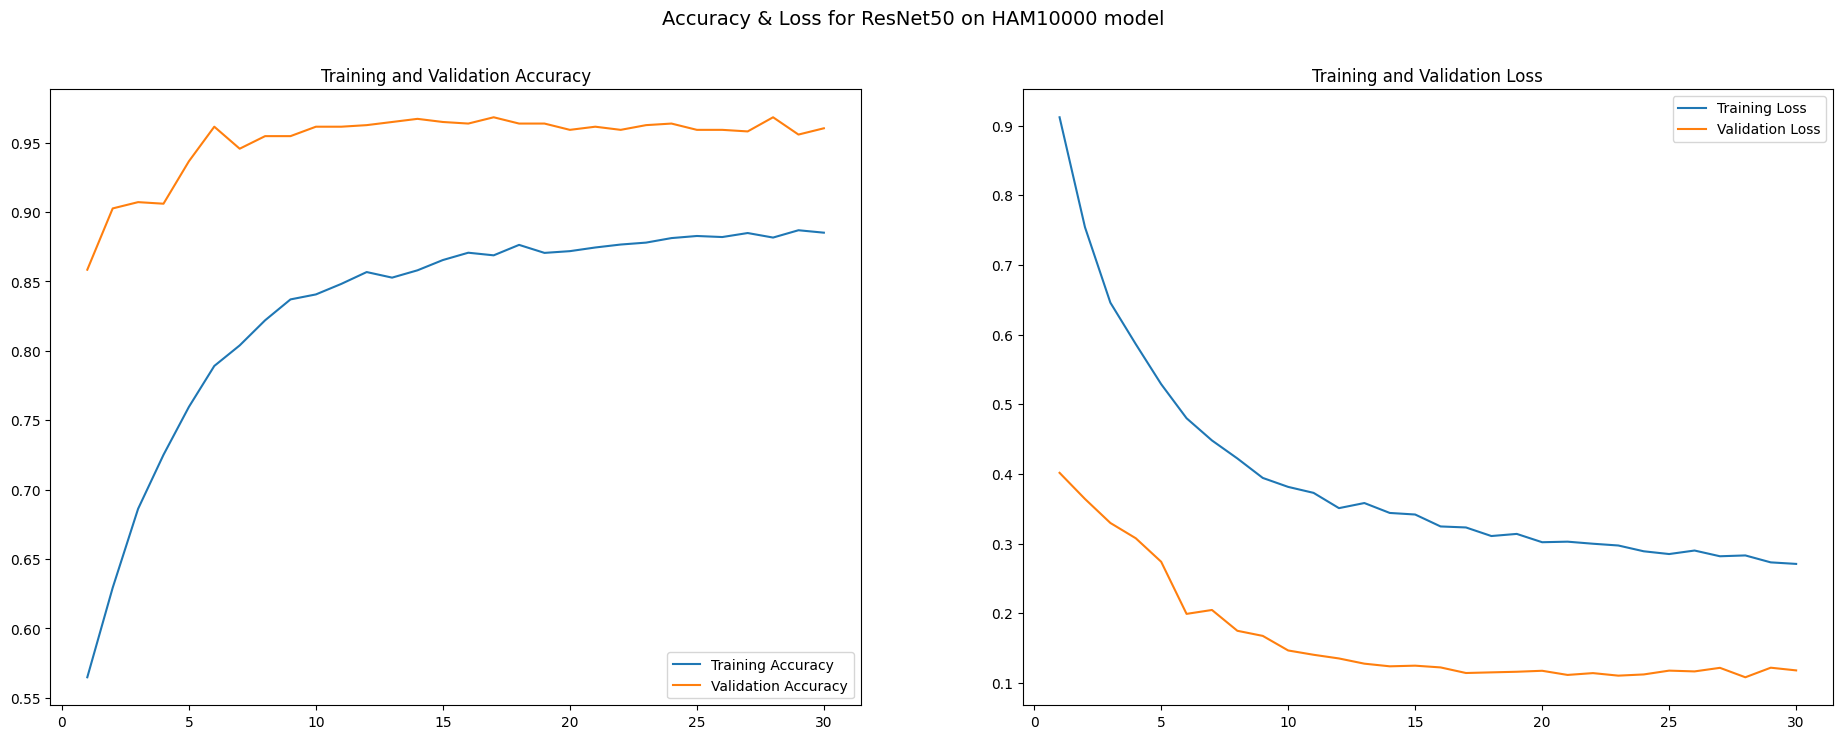

In [3]:
# Solely training HAM10000
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')



model_name = 'ResNet50 on HAM10000'
model = base_model.myresnet50()

# Train HAM10000
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Reloading 'melanoma.model'.
Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with HAM10000 model...

52/52 [==============================] - 2s 23ms/step - loss: 0.9755 - accuracy: 0.6261
Train loss = 0.9754572510719299  ;  Train accuracy = 62.61%

32/32 [==============================] - 1s 22ms/step - loss: 0.9916 - accuracy: 0.6150
Validation loss = 0.9916276931762695  ;  Validation accuracy = 61.50%

21/21 [==============================] - 0s 22ms/step - loss: 0.9989 - accuracy: 0.6182
Test loss = 0.9988936185836792  ;  Test accuracy = 61.82%
Computing predictions for Testing Kaggle DB on ResNet50 trained with HAM10000...
Model report for Testing Kaggle DB on ResNet50 trained with HAM10000 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.60      0.99      0.75       905
   Malignant       0.95      0.17      0.29       732

    accuracy                           0.63      1637
   macro avg       0.78      

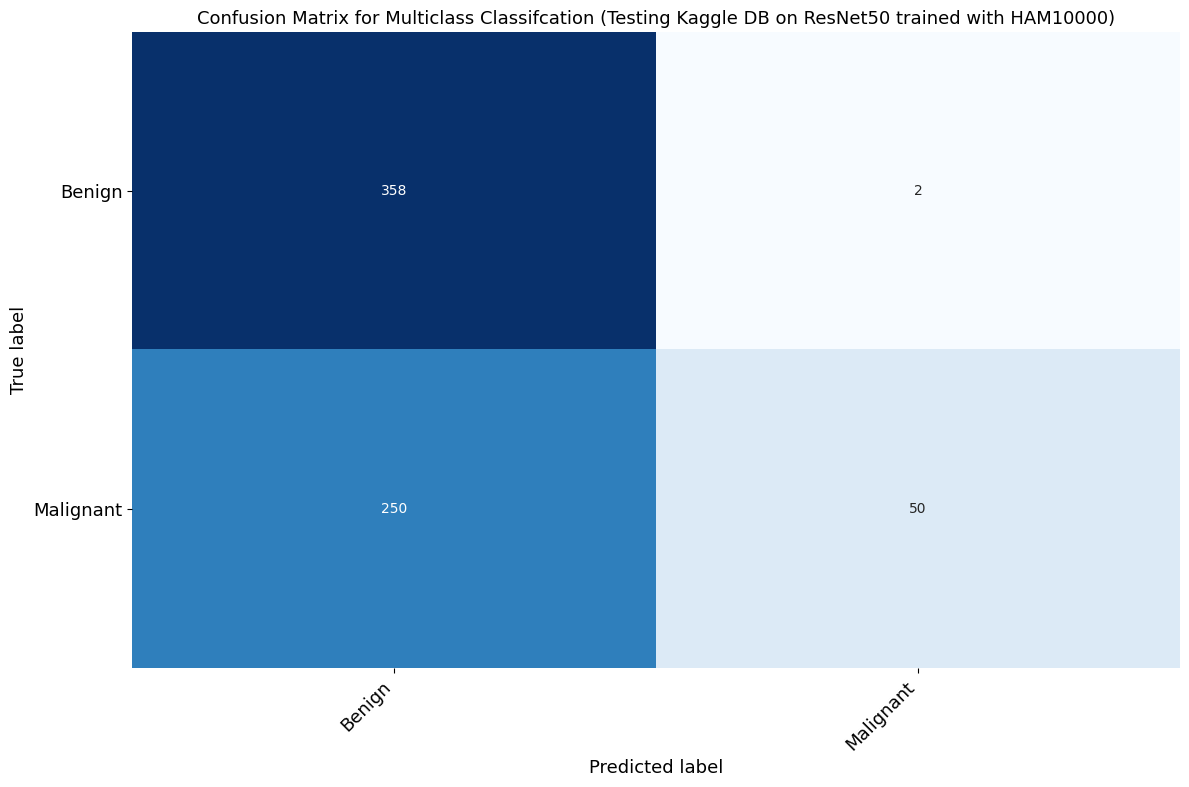

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with HAM10000 model...

251/251 [==============================] - 6s 23ms/step - loss: 0.2284 - accuracy: 0.9004
Train loss = 0.22835031151771545  ;  Train accuracy = 90.04%

28/28 [==============================] - 1s 27ms/step - loss: 0.1081 - accuracy: 0.9683
Validation loss = 0.1080520898103714  ;  Validation accuracy = 96.83%

35/35 [==============================] - 1s 26ms/step - loss: 0.1027 - accuracy: 0.9601
Test loss = 0.10268721729516983  ;  Test accuracy = 96.01%
Computing predictions for Testing HAM10000 on ResNet50 trained with HAM10000...
Model report for Testing HAM10000 on ResNet50 trained with HAM10000 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.91      0.98      0.95      6994
   Malignant       0.76      0.33      0.46      1035

    accuracy                           0.90      8029
   macro avg       0.83      0.66      0.70      8029
wei

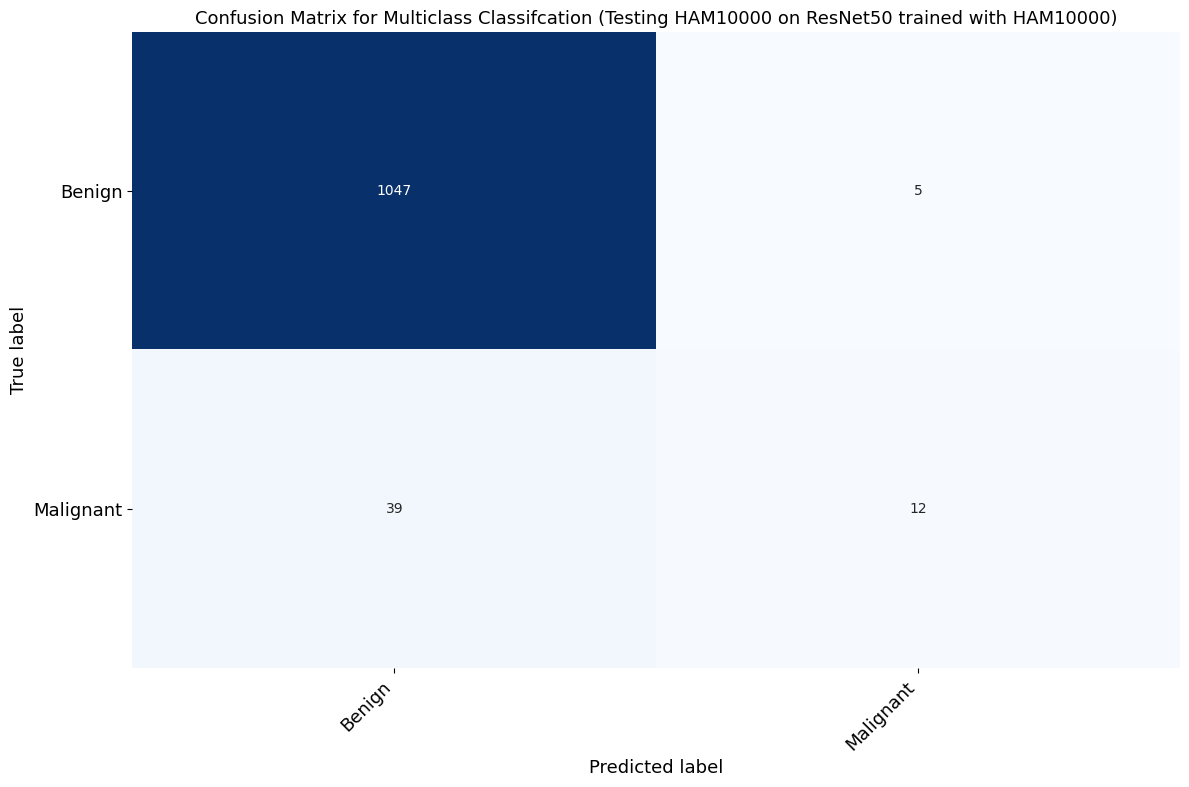

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with HAM10000 model...

23/23 [==============================] - 1s 26ms/step - loss: 0.4871 - accuracy: 0.8236
Train loss = 0.4870709180831909  ;  Train accuracy = 82.36%

6/6 [==============================] - 0s 21ms/step - loss: 0.4387 - accuracy: 0.8500
Validation loss = 0.43869537115097046  ;  Validation accuracy = 85.00%

12/12 [==============================] - 0s 22ms/step - loss: 0.5027 - accuracy: 0.8153
Test loss = 0.5026763081550598  ;  Test accuracy = 81.53%
Computing predictions for Testing ISIC2016 on ResNet50 trained with HAM10000...
Model report for Testing ISIC2016 on ResNet50 trained with HAM10000 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.99      0.90       583
   Malignant       0.75      0.11      0.19       137

    accuracy                           0.82       720
   macro avg       0.79      0.55      0.55       720
weighted

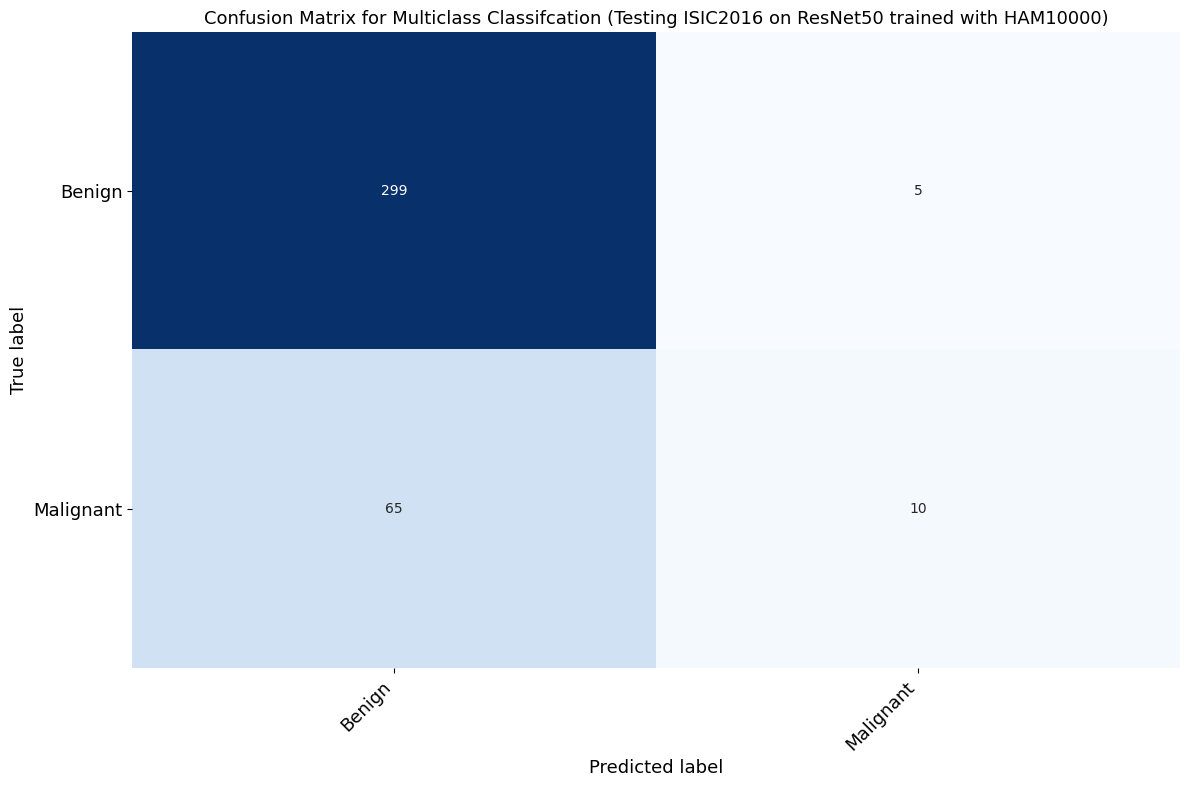

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with HAM10000 model...

63/63 [==============================] - 2s 23ms/step - loss: 0.5442 - accuracy: 0.8240
Train loss = 0.5441734194755554  ;  Train accuracy = 82.40%

5/5 [==============================] - 0s 21ms/step - loss: 0.6505 - accuracy: 0.7933
Validation loss = 0.6504802107810974  ;  Validation accuracy = 79.33%

19/19 [==============================] - 1s 27ms/step - loss: 0.6399 - accuracy: 0.8217
Test loss = 0.6399040818214417  ;  Test accuracy = 82.17%
Computing predictions for Testing ISIC2017 on ResNet50 trained with HAM10000...
Model report for Testing ISIC2017 on ResNet50 trained with HAM10000 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.99      0.90      1626
   Malignant       0.73      0.09      0.17       374

    accuracy                           0.82      2000
   macro avg       0.78      0.54      0.53      2000
weighted 

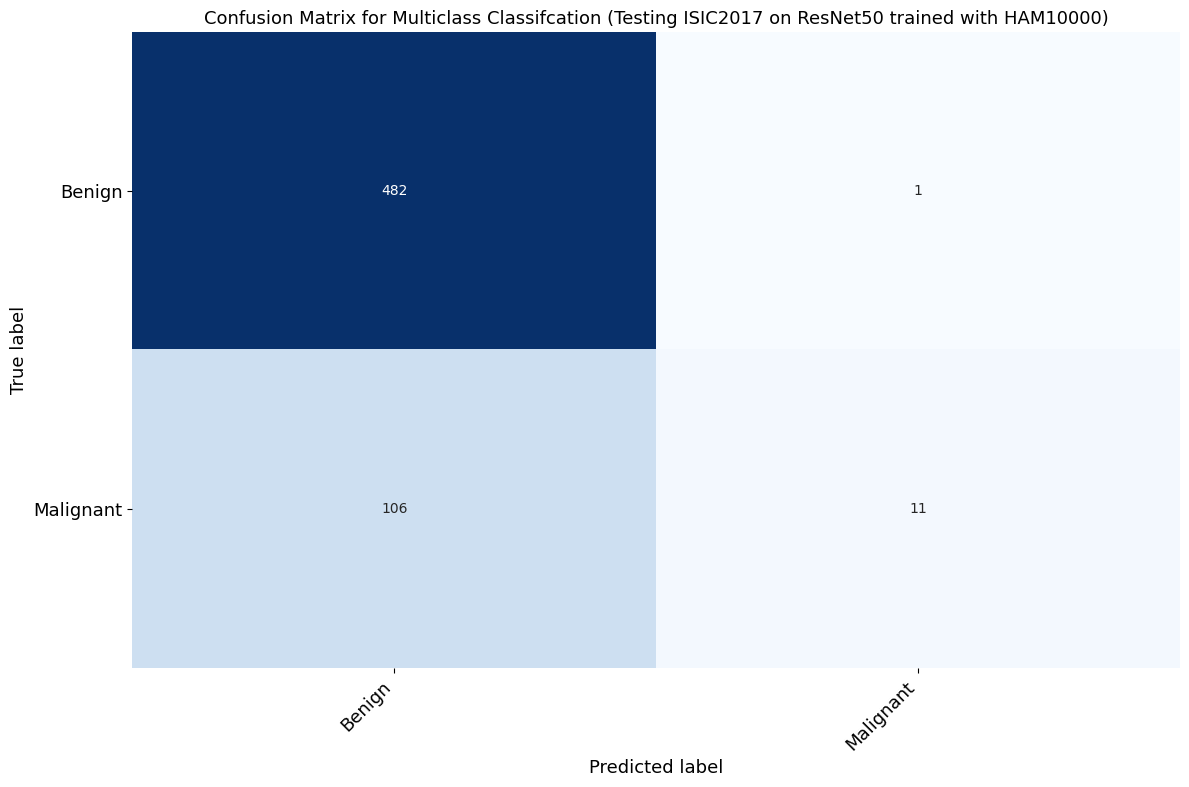

In [16]:
model_name = 'ResNet50 trained with HAM10000'
filename = 'ResNet50 on HAM10000.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
185/185 [==============================] - 14s 73ms/step - loss: 0.4851 - accuracy: 0.7901 - val_loss: 0.1361 - val_accuracy: 0.9604
Epoch 3/30
185/185 [==============================] - 14s 73ms/step - loss: 0.4471 - accuracy: 0.8050 - val_loss: 0.1273 - val_accuracy: 0.9615
Epoch 4/30
185/185 [==============================] - 14s 73ms/step - loss: 0.4301 - accuracy: 0.8151 - val_loss: 0.1186 - val_accuracy: 0.9626
Epoch 5/30
185/185 [==============================] - 14s 74ms/step - loss: 0.4030 - accuracy: 0.8231 - val_loss: 0.1209 - val_accuracy: 0.9649
Epoch 6/30
185/185 [==============================] - 14s 77ms/step - loss: 0.3927 - accuracy: 0.8273 - val_loss: 0.1181 - val_accuracy: 0.9660
Epoch 7/30
185/185 [==============================] - 14s 76ms/step - loss: 0.3794 - accuracy: 0.8313 - val_loss: 0.1209 - val_accuracy: 0.9626
Epoch 8/30
185/185 [==============================] - 14s 76ms/step - loss: 0.3632 - accuracy: 0.8373 - val_loss: 0.1207 - val_accuracy:

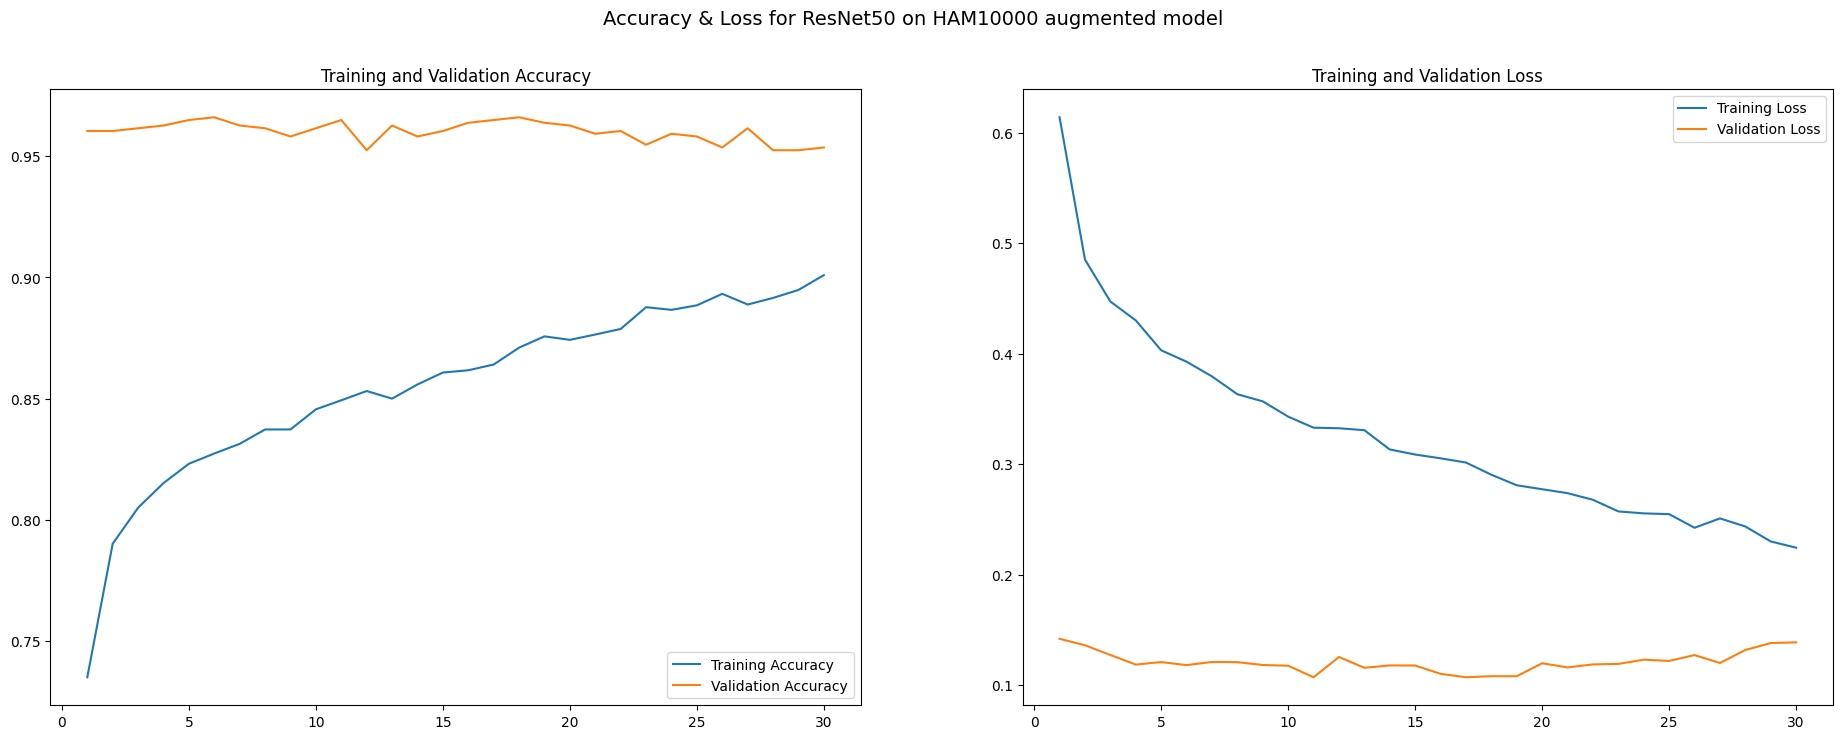

In [8]:
# Solely training HAM10000 self-augmented
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages_HAM10000_augmented, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000_augmented, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_augmentedWith_2434Melanoma_1399Non-Melanoma_224h_224w_binary.pkl')
# HAM10000_augmentedWith_2434Melanoma_1399Non-Melanoma_224h_224w_binary.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000 self-augmented'
model = base_model.myresnet50()

# Train HAM10000
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_HAM10000_augmented,
    trainlabels = trainlabels_binary_HAM10000_augmented,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with HAM10000 augmented model...



52/52 [==============================] - 2s 23ms/step - loss: 0.9072 - accuracy: 0.6463
Train loss = 0.9072253108024597  ;  Train accuracy = 64.63%

32/32 [==============================] - 1s 23ms/step - loss: 0.8607 - accuracy: 0.6570
Validation loss = 0.860692024230957  ;  Validation accuracy = 65.70%

21/21 [==============================] - 0s 22ms/step - loss: 0.8853 - accuracy: 0.6500
Test loss = 0.8853260278701782  ;  Test accuracy = 65.00%
Computing predictions for Testing Kaggle DB on ResNet50 trained with HAM10000 augmented...
Model report for Testing Kaggle DB on ResNet50 trained with HAM10000 augmented model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.61      1.00      0.76       905
   Malignant       0.98      0.21      0.35       732

    accuracy                           0.65      1637
   macro avg       0.79      0.61      0.55      1637
weighted avg       0.77      0.65      0.58      1637

Test Report :
         

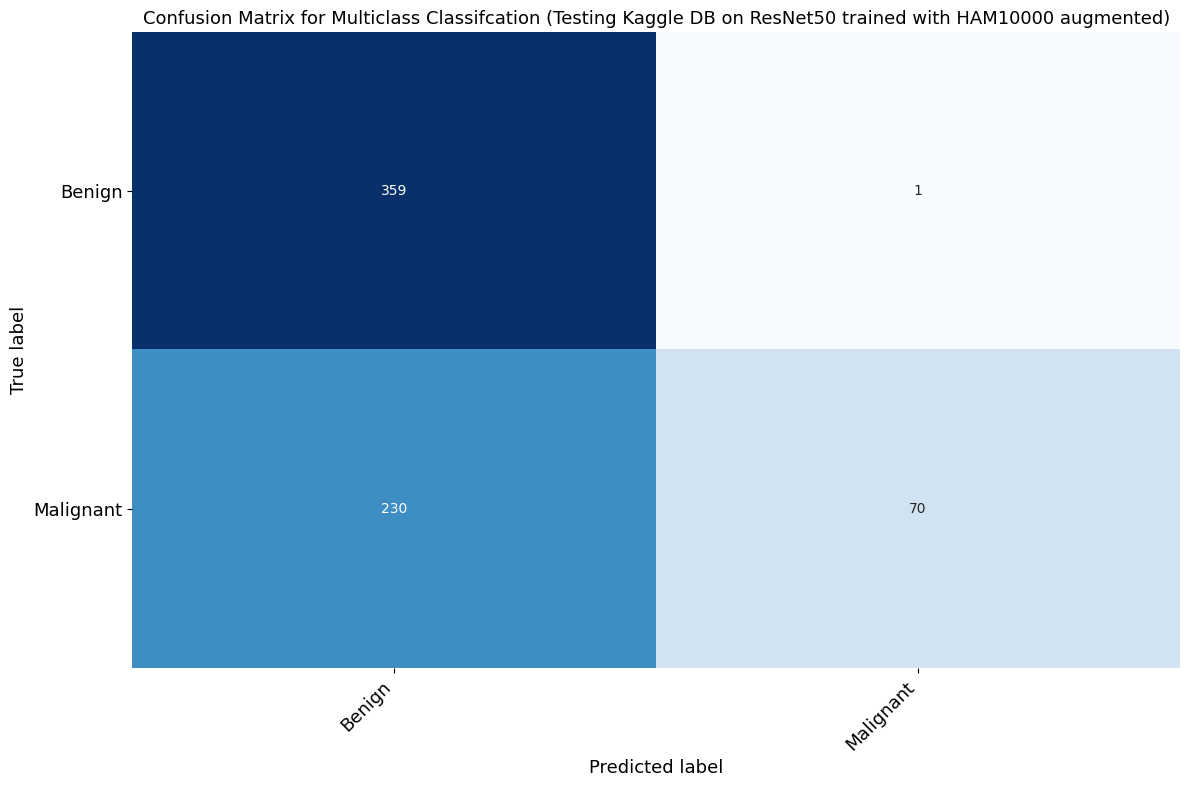

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with HAM10000 augmented model...



251/251 [==============================] - 6s 23ms/step - loss: 0.2110 - accuracy: 0.9108
Train loss = 0.2109678089618683  ;  Train accuracy = 91.08%

28/28 [==============================] - 1s 26ms/step - loss: 0.1071 - accuracy: 0.9649
Validation loss = 0.10707426816225052  ;  Validation accuracy = 96.49%

35/35 [==============================] - 1s 26ms/step - loss: 0.1033 - accuracy: 0.9583
Test loss = 0.10328845679759979  ;  Test accuracy = 95.83%
Computing predictions for Testing HAM10000 on ResNet50 trained with HAM10000 augmented...
Model report for Testing HAM10000 on ResNet50 trained with HAM10000 augmented model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.92      0.98      0.95      6994
   Malignant       0.79      0.42      0.55      1035

    accuracy                           0.91      8029
   macro avg       0.85      0.70      0.75      8029
weighted avg       0.90      0.91      0.90      8029

Test Report :
      

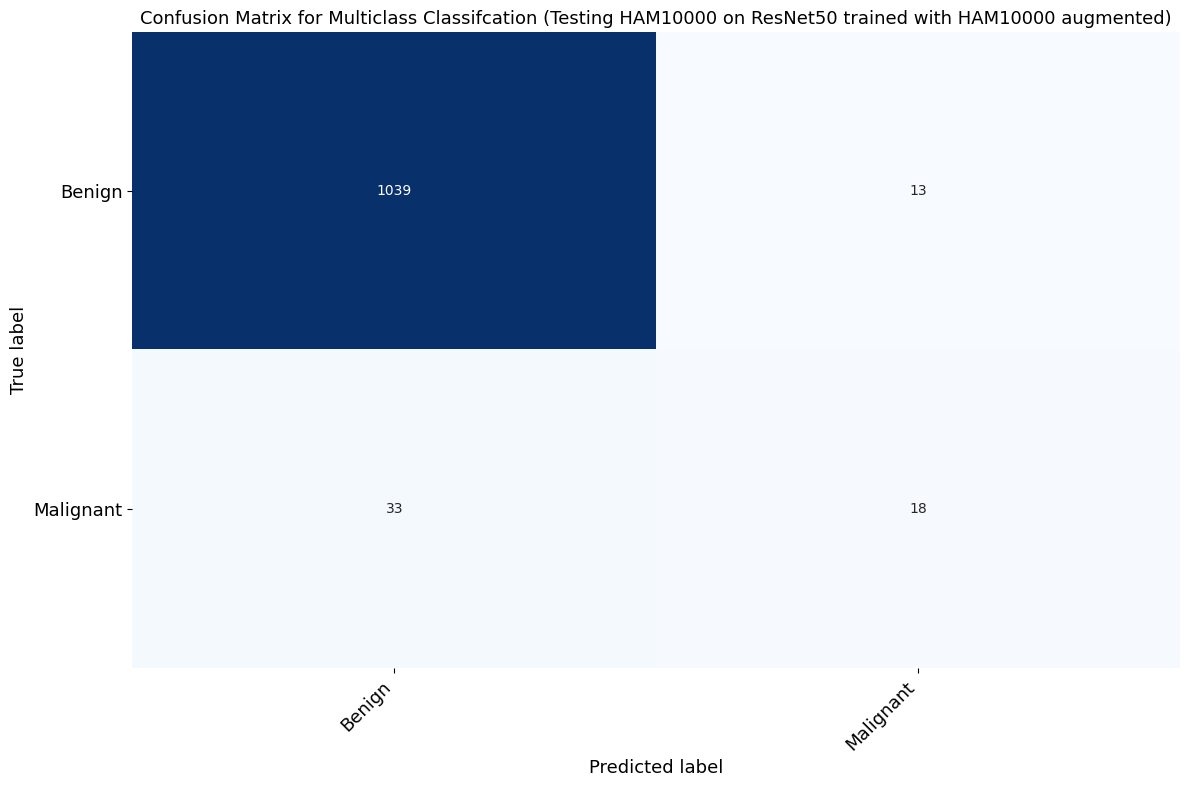

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with HAM10000 augmented model...



23/23 [==============================] - 1s 24ms/step - loss: 0.5469 - accuracy: 0.8111
Train loss = 0.546852171421051  ;  Train accuracy = 81.11%

6/6 [==============================] - 0s 21ms/step - loss: 0.4242 - accuracy: 0.8444
Validation loss = 0.4242181181907654  ;  Validation accuracy = 84.44%

12/12 [==============================] - 0s 22ms/step - loss: 0.5162 - accuracy: 0.8179
Test loss = 0.5162436366081238  ;  Test accuracy = 81.79%
Computing predictions for Testing ISIC2016 on ResNet50 trained with HAM10000 augmented...
Model report for Testing ISIC2016 on ResNet50 trained with HAM10000 augmented model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.97      0.89       583
   Malignant       0.51      0.13      0.21       137

    accuracy                           0.81       720
   macro avg       0.67      0.55      0.55       720
weighted avg       0.77      0.81      0.76       720

Test Report :
             

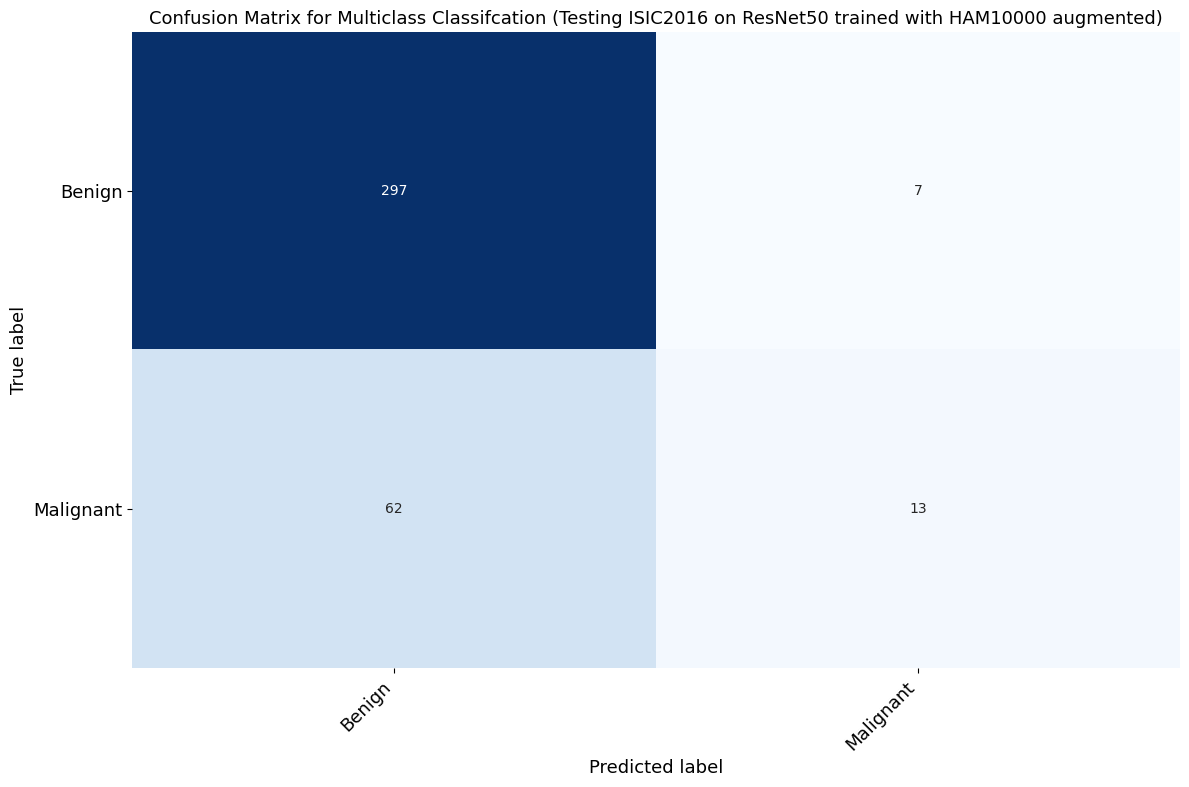

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with HAM10000 augmented model...



63/63 [==============================] - 2s 26ms/step - loss: 0.5551 - accuracy: 0.8210
Train loss = 0.5550833940505981  ;  Train accuracy = 82.10%

5/5 [==============================] - 0s 29ms/step - loss: 0.5938 - accuracy: 0.8200
Validation loss = 0.5937770009040833  ;  Validation accuracy = 82.00%

19/19 [==============================] - 1s 26ms/step - loss: 0.6184 - accuracy: 0.8100
Test loss = 0.6184486150741577  ;  Test accuracy = 81.00%
Computing predictions for Testing ISIC2017 on ResNet50 trained with HAM10000 augmented...
Model report for Testing ISIC2017 on ResNet50 trained with HAM10000 augmented model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.99      0.90      1626
   Malignant       0.62      0.11      0.18       374

    accuracy                           0.82      2000
   macro avg       0.73      0.55      0.54      2000
weighted avg       0.79      0.82      0.77      2000

Test Report :
            

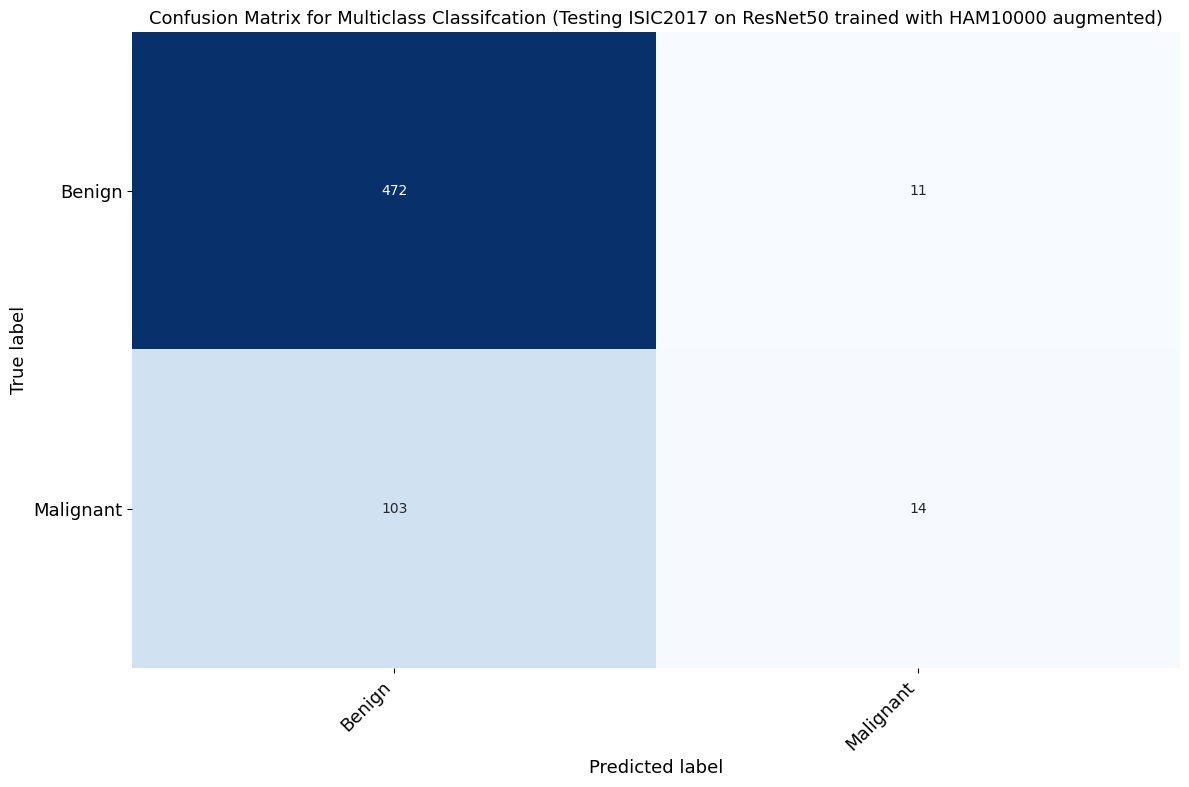

In [17]:
model_name = 'ResNet50 trained with HAM10000 augmented'
filename = 'ResNet50 on HAM10000 augmented.hdf5' # self augmented
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
185/185 [==============================] - 98s 528ms/step - loss: 0.5085 - accuracy: 0.7821 - val_loss: 0.1271 - val_accuracy: 0.9638
Epoch 3/30
185/185 [==============================] - 99s 531ms/step - loss: 0.4809 - accuracy: 0.7887 - val_loss: 0.1292 - val_accuracy: 0.9615
Epoch 4/30
185/185 [==============================] - 98s 529ms/step - loss: 0.4547 - accuracy: 0.8007 - val_loss: 0.1296 - val_accuracy: 0.9626
Epoch 5/30
185/185 [==============================] - 99s 530ms/step - loss: 0.4312 - accuracy: 0.8084 - val_loss: 0.1246 - val_accuracy: 0.9604
Epoch 6/30
185/185 [==============================] - 99s 530ms/step - loss: 0.4279 - accuracy: 0.8084 - val_loss: 0.1224 - val_accuracy: 0.9615
Epoch 7/30
185/185 [==============================] - 99s 531ms/step - loss: 0.4168 - accuracy: 0.8123 - val_loss: 0.1111 - val_accuracy: 0.9649
Epoch 8/30
185/185 [==============================] - 98s 529ms/step - loss: 0.4068 - accuracy: 0.8121 - val_loss: 0.1216 - val_ac

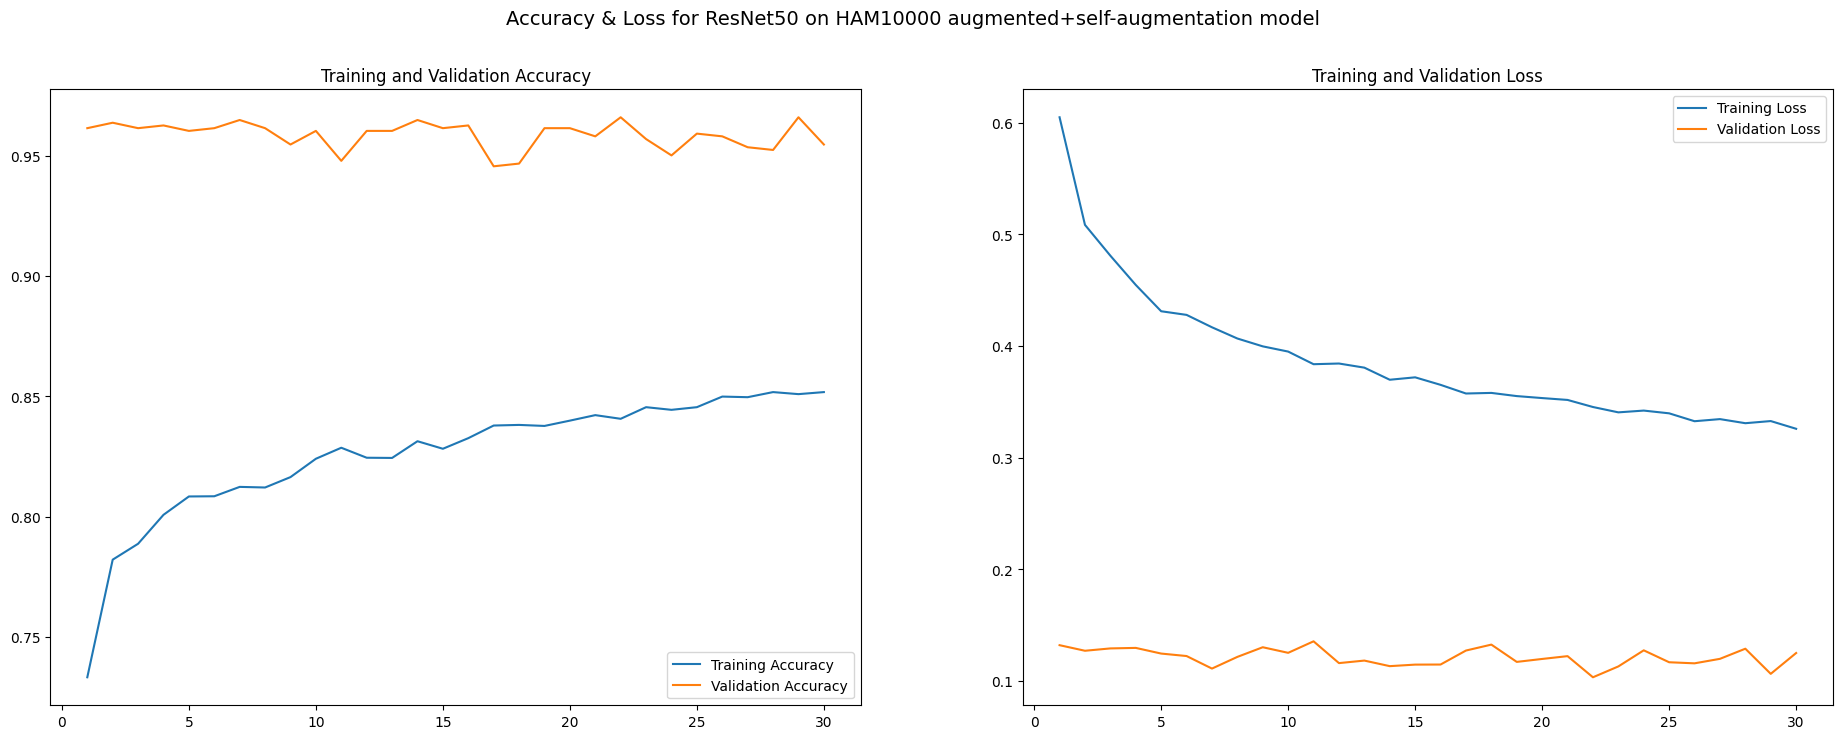

In [10]:
# Solely training HAM10000 augmented + self-augmentation
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages_HAM10000_augmented, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000_augmented, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_augmentedWith_2434Melanoma_1399Non-Melanoma_224h_224w_binary.pkl')


base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000 augmented+self-augmentation'
model = base_model.myresnet50()

# Train HAM10000 augmented + self-augmentation
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_HAM10000_augmented,
    trainlabels = trainlabels_binary_HAM10000_augmented,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with HAM10000 augmented+self-augmentation model...



52/52 [==============================] - 2s 24ms/step - loss: 0.9199 - accuracy: 0.6500
Train loss = 0.9198708534240723  ;  Train accuracy = 65.00%

32/32 [==============================] - 1s 23ms/step - loss: 0.8657 - accuracy: 0.6590
Validation loss = 0.865688681602478  ;  Validation accuracy = 65.90%

21/21 [==============================] - 0s 23ms/step - loss: 0.8994 - accuracy: 0.6409
Test loss = 0.8993833661079407  ;  Test accuracy = 64.09%
Computing predictions for Testing Kaggle DB on ResNet50 trained with HAM10000 augmented+self-augmentation...
Model report for Testing Kaggle DB on ResNet50 trained with HAM10000 augmented+self-augmentation model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.61      0.99      0.76       905
   Malignant       0.95      0.23      0.37       732

    accuracy                           0.65      1637
   macro avg       0.78      0.61      0.56      1637
weighted avg       0.76      0.65      0.5

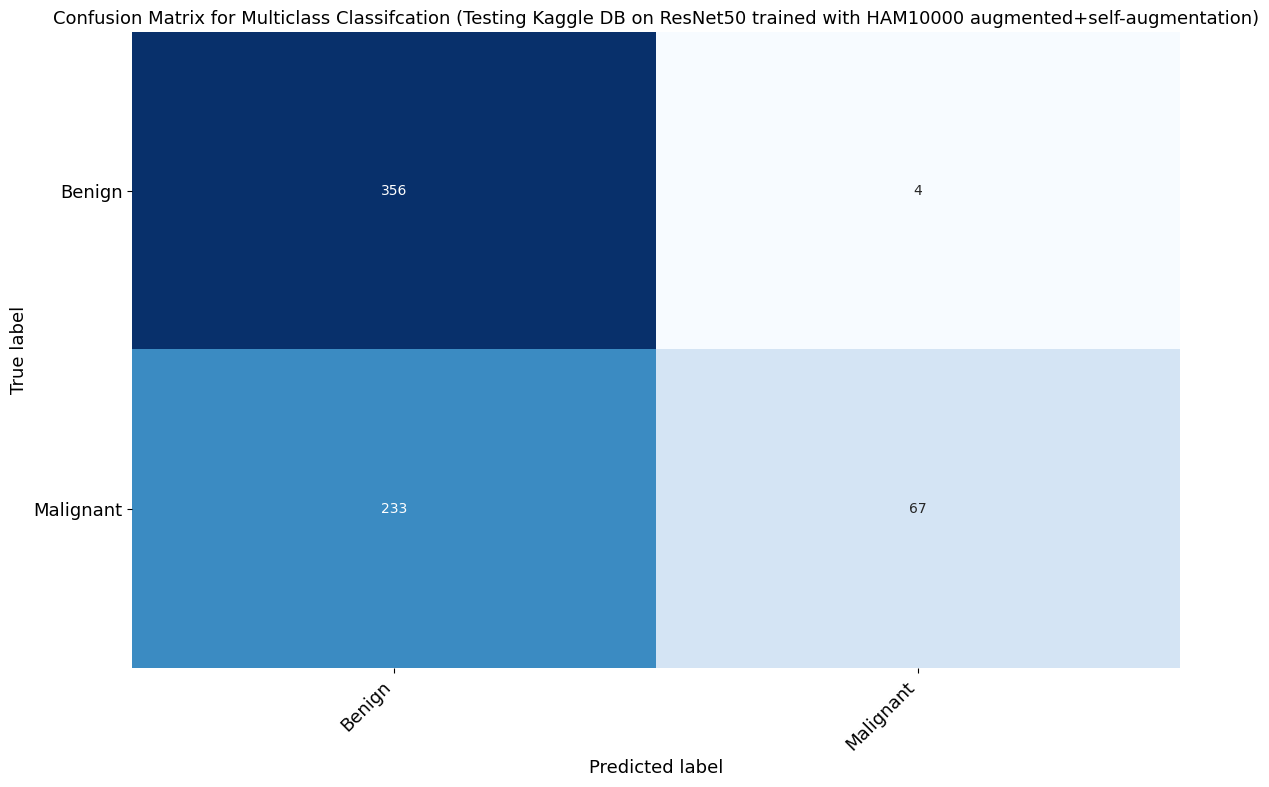

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with HAM10000 augmented+self-augmentation model...



251/251 [==============================] - 7s 23ms/step - loss: 0.2305 - accuracy: 0.9022
Train loss = 0.23047150671482086  ;  Train accuracy = 90.22%

28/28 [==============================] - 1s 25ms/step - loss: 0.1033 - accuracy: 0.9660
Validation loss = 0.10332439094781876  ;  Validation accuracy = 96.60%

35/35 [==============================] - 1s 27ms/step - loss: 0.1025 - accuracy: 0.9628
Test loss = 0.10252560675144196  ;  Test accuracy = 96.28%
Computing predictions for Testing HAM10000 on ResNet50 trained with HAM10000 augmented+self-augmentation...
Model report for Testing HAM10000 on ResNet50 trained with HAM10000 augmented+self-augmentation model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.92      0.98      0.95      6994
   Malignant       0.71      0.41      0.52      1035

    accuracy                           0.90      8029
   macro avg       0.81      0.69      0.73      8029
weighted avg       0.89      0.90     

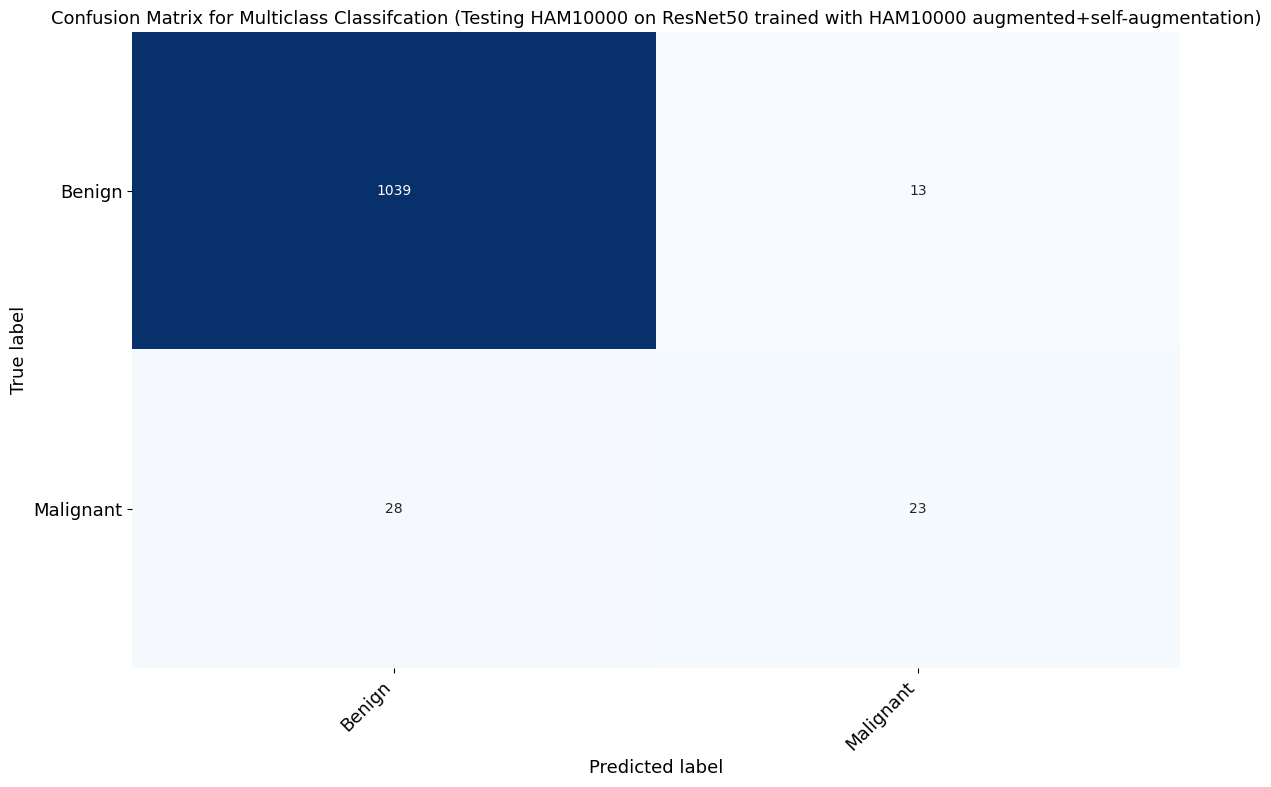

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with HAM10000 augmented+self-augmentation model...



23/23 [==============================] - 1s 28ms/step - loss: 0.5255 - accuracy: 0.8083
Train loss = 0.5254845023155212  ;  Train accuracy = 80.83%

6/6 [==============================] - 0s 22ms/step - loss: 0.4484 - accuracy: 0.8222
Validation loss = 0.4484195411205292  ;  Validation accuracy = 82.22%

12/12 [==============================] - 0s 22ms/step - loss: 0.5028 - accuracy: 0.8179
Test loss = 0.5028001070022583  ;  Test accuracy = 81.79%
Computing predictions for Testing ISIC2016 on ResNet50 trained with HAM10000 augmented+self-augmentation...
Model report for Testing ISIC2016 on ResNet50 trained with HAM10000 augmented+self-augmentation model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.82      0.97      0.89       583
   Malignant       0.49      0.12      0.20       137

    accuracy                           0.81       720
   macro avg       0.66      0.55      0.54       720
weighted avg       0.76      0.81      0.76  

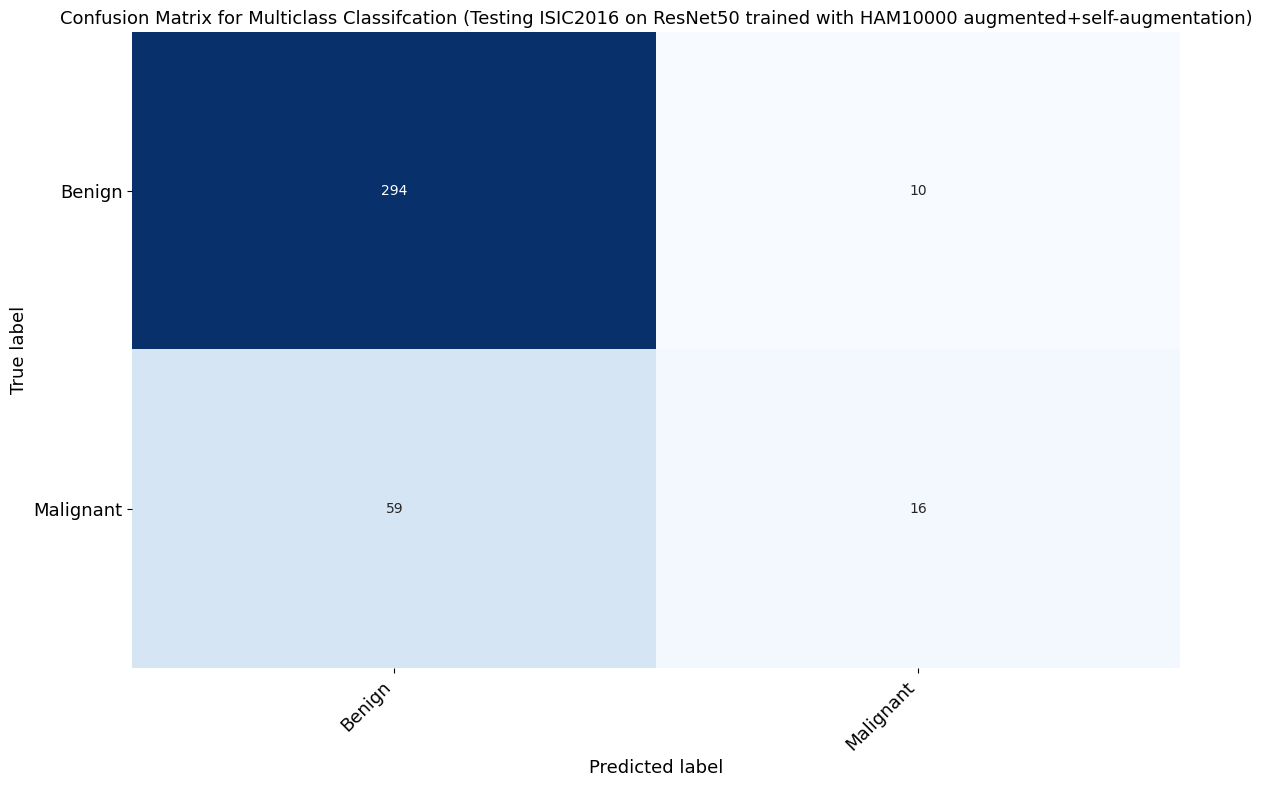

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with HAM10000 augmented+self-augmentation model...



63/63 [==============================] - 2s 24ms/step - loss: 0.5497 - accuracy: 0.8170
Train loss = 0.5496793389320374  ;  Train accuracy = 81.70%

5/5 [==============================] - 0s 21ms/step - loss: 0.6498 - accuracy: 0.8200
Validation loss = 0.6498098373413086  ;  Validation accuracy = 82.00%

19/19 [==============================] - 1s 27ms/step - loss: 0.6238 - accuracy: 0.8117
Test loss = 0.6238123774528503  ;  Test accuracy = 81.17%
Computing predictions for Testing ISIC2017 on ResNet50 trained with HAM10000 augmented+self-augmentation...
Model report for Testing ISIC2017 on ResNet50 trained with HAM10000 augmented+self-augmentation model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.98      0.90      1626
   Malignant       0.55      0.11      0.18       374

    accuracy                           0.82      2000
   macro avg       0.69      0.54      0.54      2000
weighted avg       0.78      0.82      0.76  

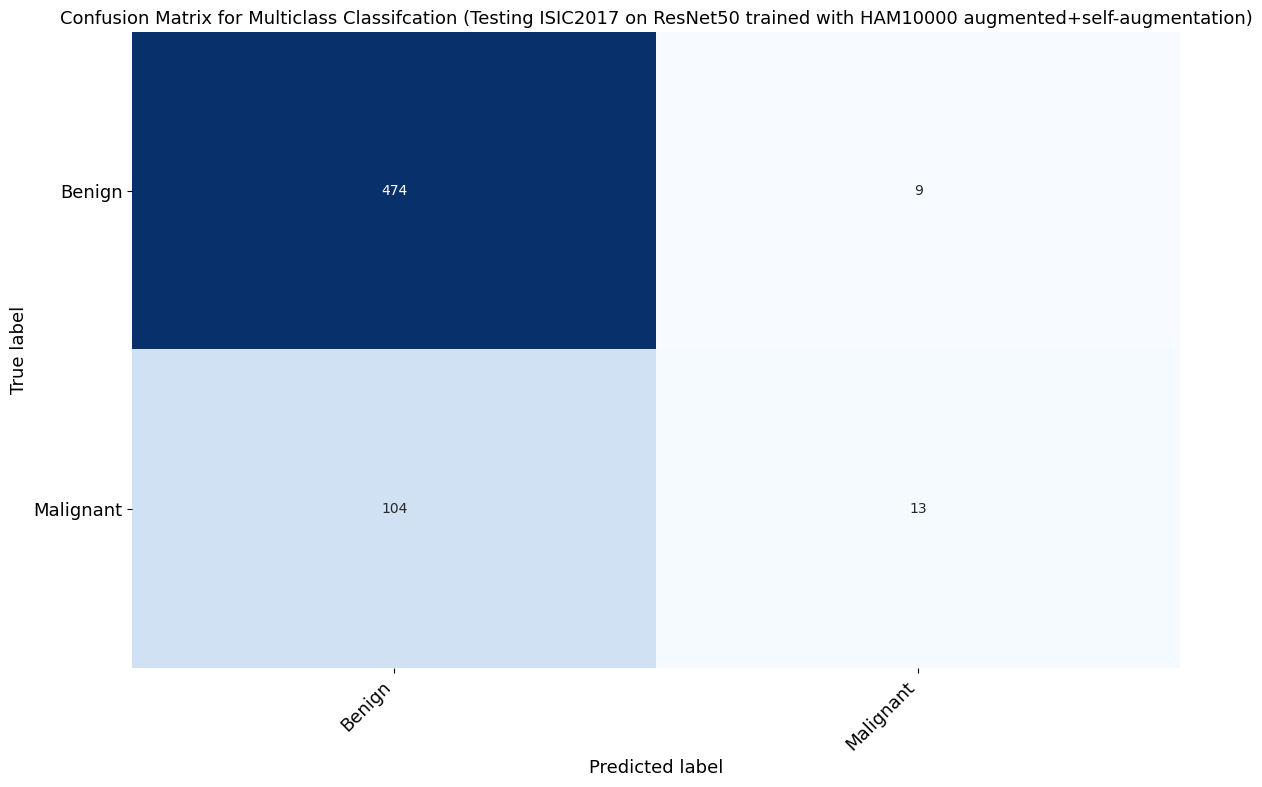

In [18]:
model_name = 'ResNet50 trained with HAM10000 augmented+self-augmentation'
filename = 'ResNet50 on HAM10000 augmented+self-augmentation.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
11/11 [==============================] - 6s 538ms/step - loss: 0.8891 - accuracy: 0.5869 - val_loss: 0.8970 - val_accuracy: 0.4944
Epoch 3/30
11/11 [==============================] - 6s 498ms/step - loss: 0.8103 - accuracy: 0.6204 - val_loss: 0.8099 - val_accuracy: 0.5611
Epoch 4/30
11/11 [==============================] - 6s 502ms/step - loss: 0.7836 - accuracy: 0.6509 - val_loss: 0.6976 - val_accuracy: 0.6111
Epoch 5/30
11/11 [==============================] - 6s 567ms/step - loss: 0.6918 - accuracy: 0.6616 - val_loss: 0.5175 - val_accuracy: 0.7222
Epoch 6/30
11/11 [==============================] - 6s 500ms/step - loss: 0.6657 - accuracy: 0.6768 - val_loss: 0.4484 - val_accuracy: 0.8000
Epoch 7/30
11/11 [==============================] - 6s 499ms/step - loss: 0.6348 - accuracy: 0.6860 - val_loss: 0.4475 - val_accuracy: 0.8000
Epoch 8/30
11/11 [==============================] - 6s 503ms/step - loss: 0.6193 - accuracy: 0.7088 - val_loss: 0.4506 - val_accuracy: 0.7722
Epoch 

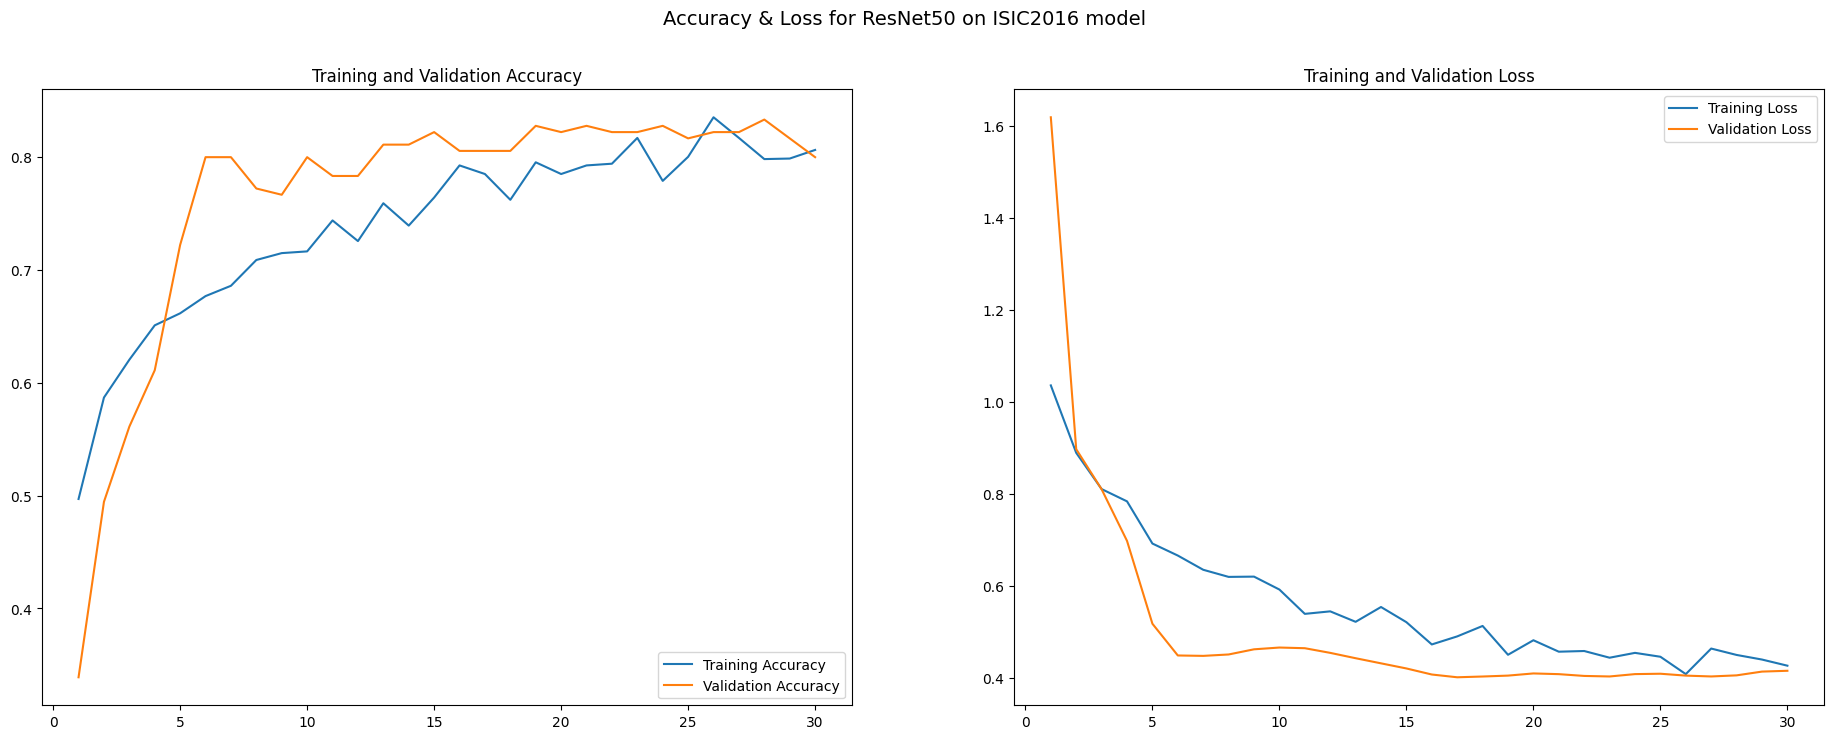

In [12]:
# Solely training ISIC2016
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')


base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016'
model = base_model.myresnet50()

# Train ISIC2016
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2016 model...



52/52 [==============================] - 2s 23ms/step - loss: 0.6730 - accuracy: 0.6677
Train loss = 0.6730430722236633  ;  Train accuracy = 66.77%

32/32 [==============================] - 1s 22ms/step - loss: 0.6529 - accuracy: 0.6710
Validation loss = 0.6528594493865967  ;  Validation accuracy = 67.10%

21/21 [==============================] - 0s 22ms/step - loss: 0.6738 - accuracy: 0.6758
Test loss = 0.6738080382347107  ;  Test accuracy = 67.58%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2016...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2016 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.63      0.98      0.77       905
   Malignant       0.92      0.28      0.43       732

    accuracy                           0.67      1637
   macro avg       0.77      0.63      0.60      1637
weighted avg       0.76      0.67      0.62      1637

Test Report :
               precision    

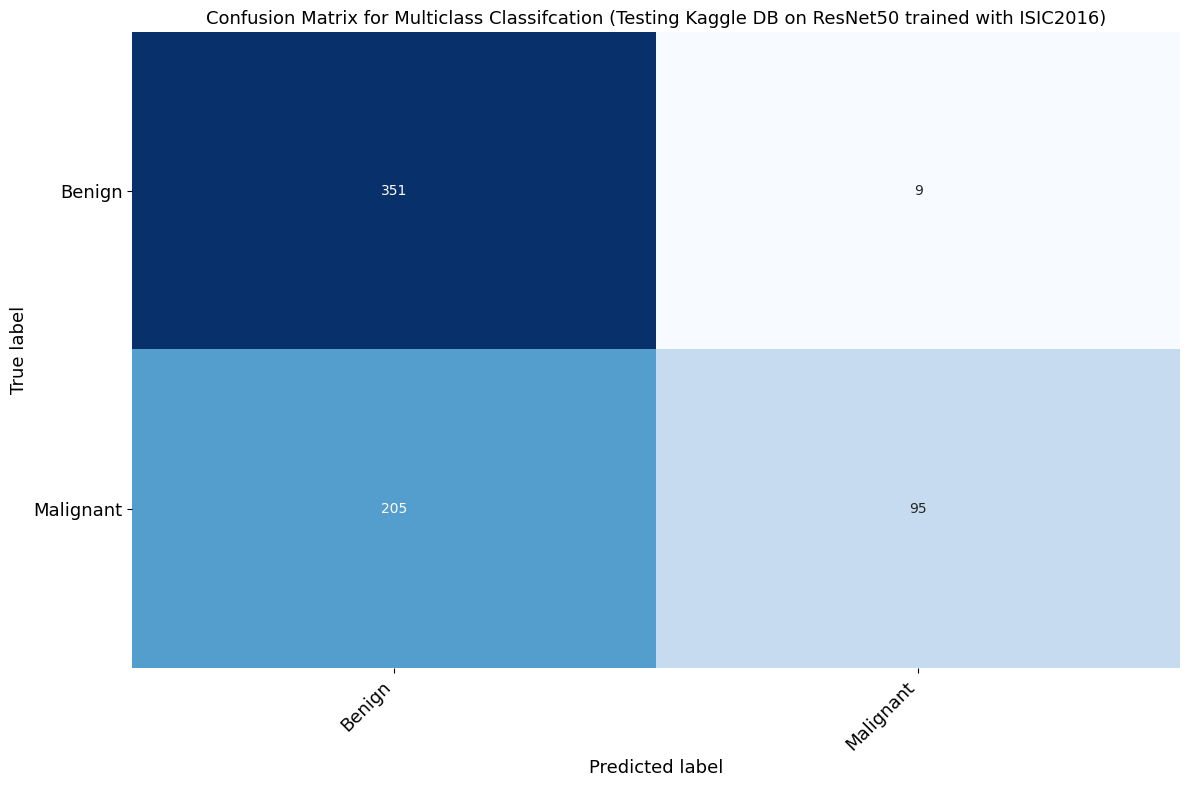

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2016 model...



251/251 [==============================] - 7s 25ms/step - loss: 0.3843 - accuracy: 0.8423
Train loss = 0.3843301236629486  ;  Train accuracy = 84.23%

28/28 [==============================] - 1s 22ms/step - loss: 0.2449 - accuracy: 0.9287
Validation loss = 0.2448960244655609  ;  Validation accuracy = 92.87%

35/35 [==============================] - 1s 23ms/step - loss: 0.2510 - accuracy: 0.9284
Test loss = 0.25103843212127686  ;  Test accuracy = 92.84%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2016...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2016 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.90      0.92      0.91      6994
   Malignant       0.37      0.32      0.35      1035

    accuracy                           0.84      8029
   macro avg       0.64      0.62      0.63      8029
weighted avg       0.83      0.84      0.84      8029

Test Report :
               precision   

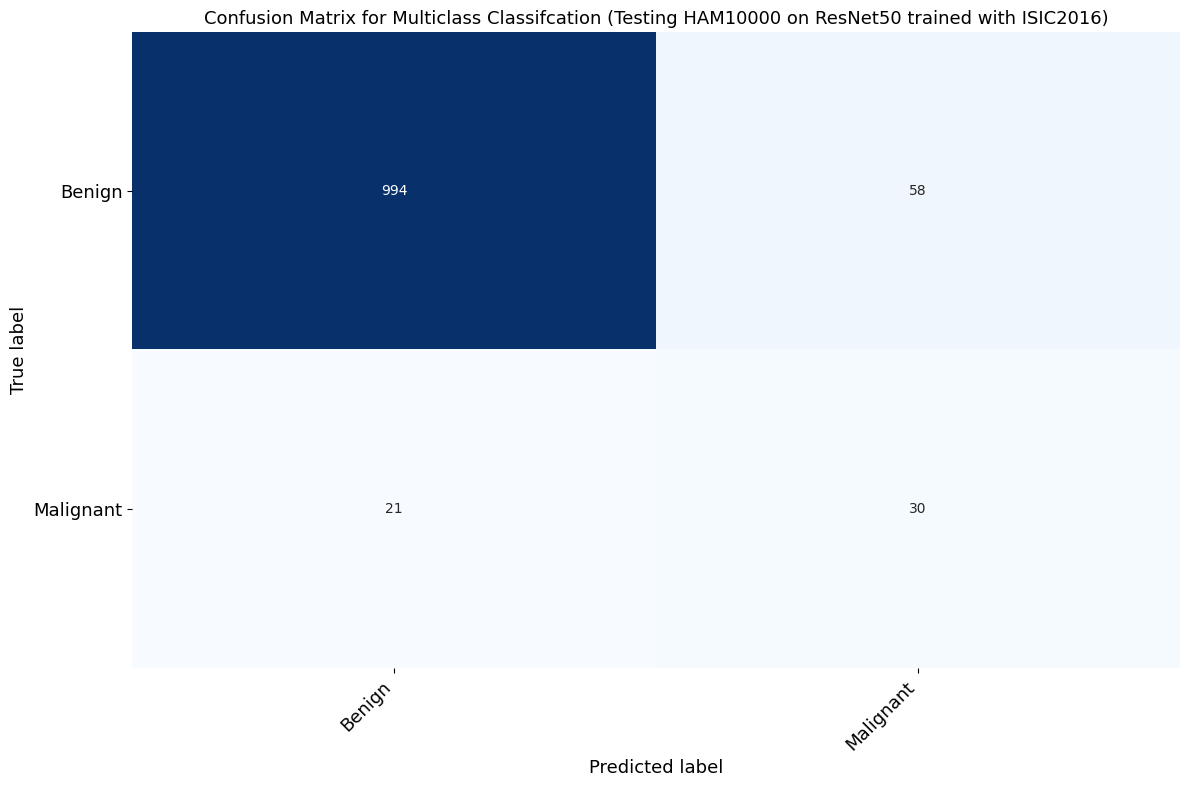

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2016 model...



23/23 [==============================] - 1s 23ms/step - loss: 0.3124 - accuracy: 0.8694
Train loss = 0.3123973309993744  ;  Train accuracy = 86.94%

6/6 [==============================] - 0s 21ms/step - loss: 0.4010 - accuracy: 0.8056
Validation loss = 0.40101683139801025  ;  Validation accuracy = 80.56%

12/12 [==============================] - 0s 22ms/step - loss: 0.3902 - accuracy: 0.8417
Test loss = 0.3901533782482147  ;  Test accuracy = 84.17%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2016...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2016 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.87      0.98      0.92       583
   Malignant       0.82      0.40      0.54       137

    accuracy                           0.87       720
   macro avg       0.85      0.69      0.73       720
weighted avg       0.86      0.87      0.85       720

Test Report :
               precision    rec

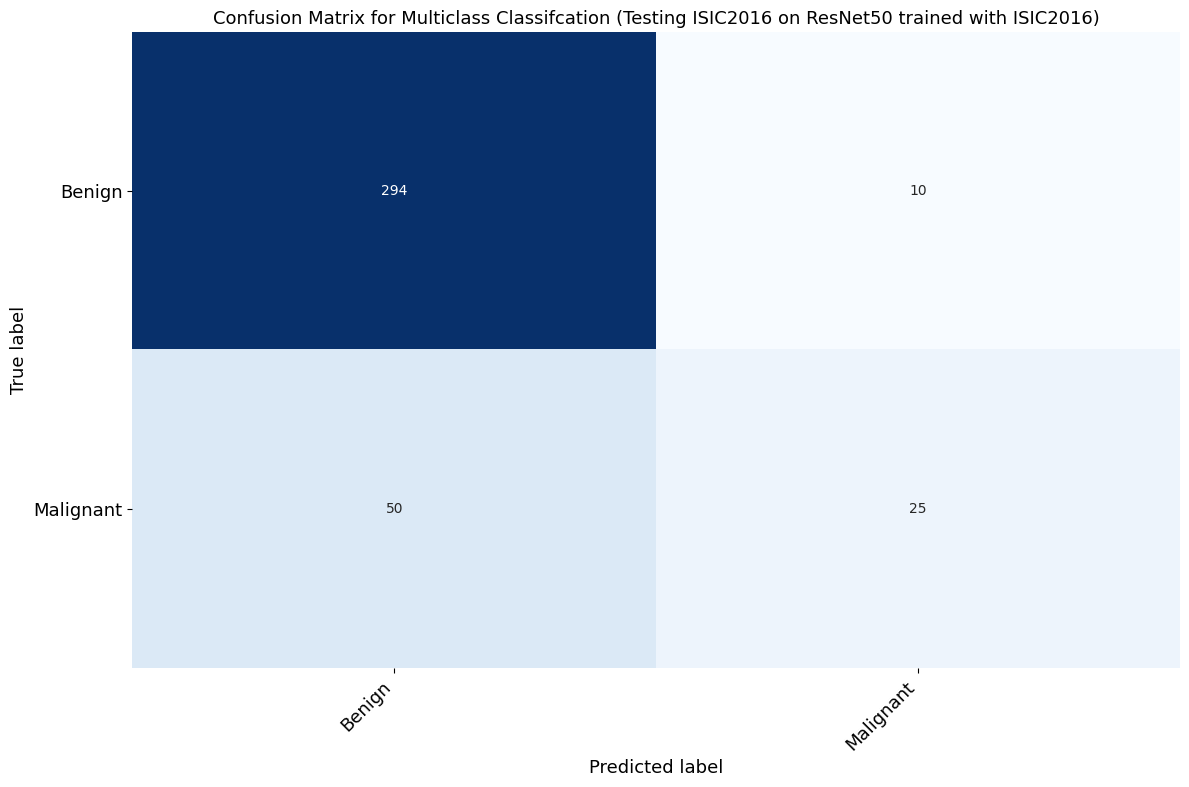

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2016 model...



63/63 [==============================] - 2s 24ms/step - loss: 0.4069 - accuracy: 0.8315
Train loss = 0.40693196654319763  ;  Train accuracy = 83.15%

5/5 [==============================] - 0s 21ms/step - loss: 0.4462 - accuracy: 0.7933
Validation loss = 0.4462476968765259  ;  Validation accuracy = 79.33%

19/19 [==============================] - 0s 23ms/step - loss: 0.4995 - accuracy: 0.7967
Test loss = 0.4994876980781555  ;  Test accuracy = 79.67%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2016...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2016 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.85      0.97      0.90      1626
   Malignant       0.63      0.24      0.34       374

    accuracy                           0.83      2000
   macro avg       0.74      0.60      0.62      2000
weighted avg       0.81      0.83      0.80      2000

Test Report :
               precision    rec

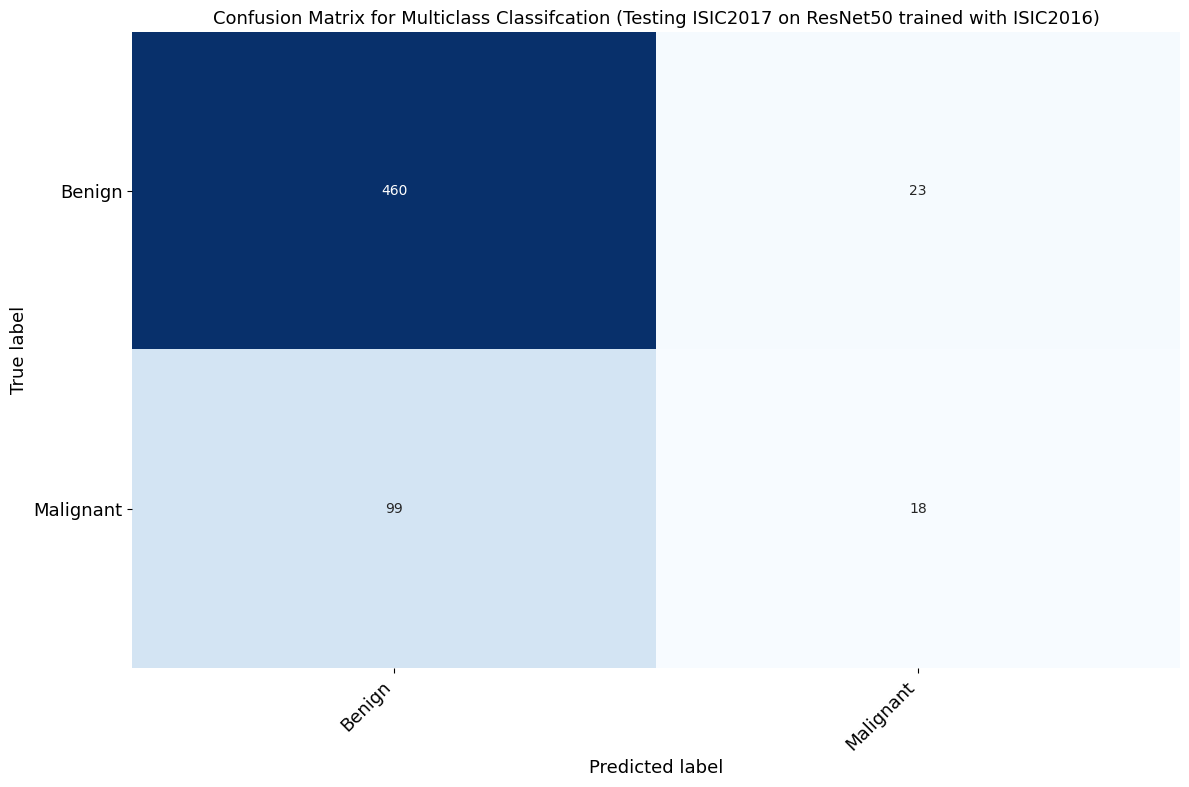

In [19]:
model_name = 'ResNet50 trained with ISIC2016'
filename = 'ResNet50 on ISIC2016.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
17/17 [==============================] - 2s 83ms/step - loss: 0.7046 - accuracy: 0.6767 - val_loss: 0.5633 - val_accuracy: 0.8167
Epoch 3/30
17/17 [==============================] - 1s 77ms/step - loss: 0.6270 - accuracy: 0.7196 - val_loss: 0.5024 - val_accuracy: 0.8333
Epoch 4/30
17/17 [==============================] - 1s 76ms/step - loss: 0.5700 - accuracy: 0.7468 - val_loss: 0.4648 - val_accuracy: 0.8333
Epoch 5/30
17/17 [==============================] - 1s 81ms/step - loss: 0.5324 - accuracy: 0.7566 - val_loss: 0.4532 - val_accuracy: 0.8222
Epoch 6/30
17/17 [==============================] - 1s 77ms/step - loss: 0.4801 - accuracy: 0.7683 - val_loss: 0.4436 - val_accuracy: 0.8333
Epoch 7/30
17/17 [==============================] - 1s 76ms/step - loss: 0.4949 - accuracy: 0.7722 - val_loss: 0.4468 - val_accuracy: 0.8222
Epoch 8/30
17/17 [==============================] - 1s 76ms/step - loss: 0.4631 - accuracy: 0.8033 - val_loss: 0.4146 - val_accuracy: 0.8222
Epoch 9/30
17

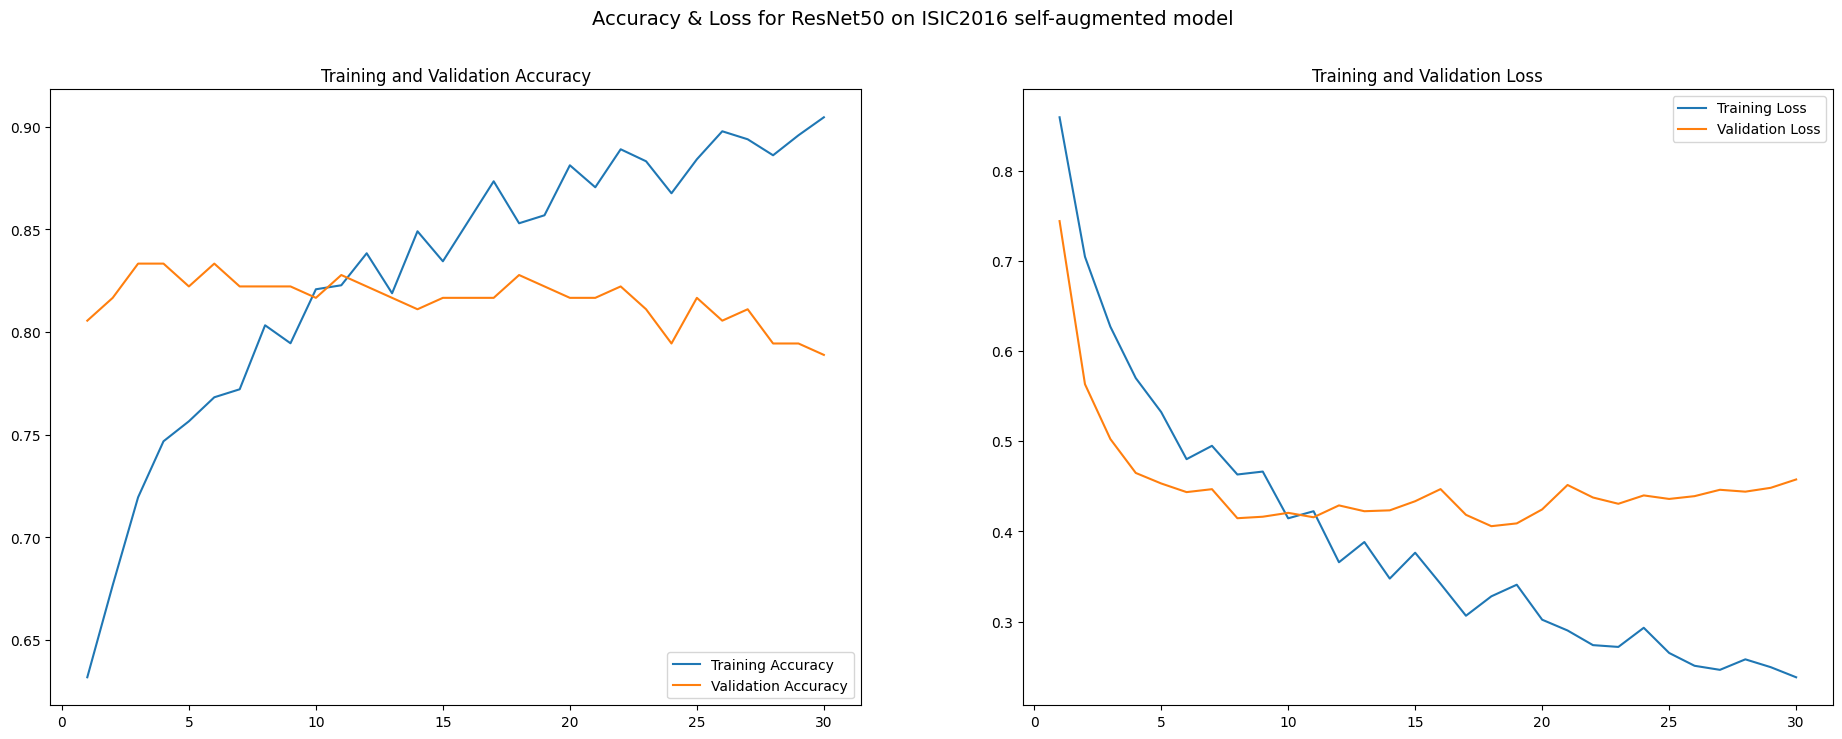

In [15]:
# training ISIC2016 self-augmented
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

trainimages_ISIC2016_augmented, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016_augmented, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2016_augmentedWith_254Melanoma_117Non-Melanoma_224h_224w_binary.pkl')
# ISIC2016_augmentedWith_254Melanoma_117Non-Melanoma_224h_224w_binary.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016 self-augmented'
model = base_model.myresnet50()

# Train ISIC2016 self-augmented
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_ISIC2016_augmented,
    trainlabels = trainlabels_binary_ISIC2016_augmented,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2016 self-augmented model...



52/52 [==============================] - 2s 26ms/step - loss: 0.8204 - accuracy: 0.6170
Train loss = 0.8204420804977417  ;  Train accuracy = 61.70%

32/32 [==============================] - 1s 22ms/step - loss: 0.7523 - accuracy: 0.6540
Validation loss = 0.7522706389427185  ;  Validation accuracy = 65.40%

21/21 [==============================] - 0s 23ms/step - loss: 0.7839 - accuracy: 0.6364
Test loss = 0.7838557362556458  ;  Test accuracy = 63.64%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2016 self-augmented...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2016 self-augmented model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.60      0.89      0.72       905
   Malignant       0.67      0.28      0.40       732

    accuracy                           0.62      1637
   macro avg       0.64      0.59      0.56      1637
weighted avg       0.63      0.62      0.58      1637

Test Report 

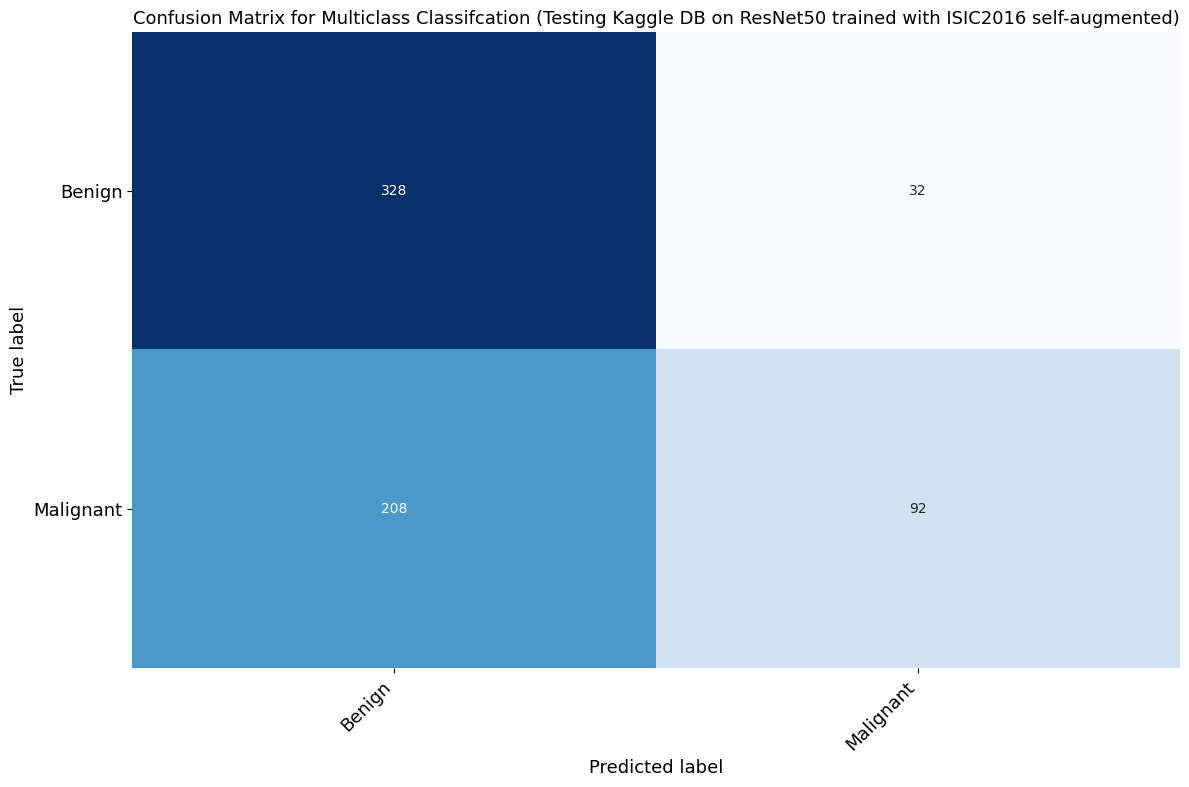

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2016 self-augmented model...



251/251 [==============================] - 6s 23ms/step - loss: 0.4680 - accuracy: 0.7960
Train loss = 0.46799570322036743  ;  Train accuracy = 79.60%

28/28 [==============================] - 1s 23ms/step - loss: 0.3587 - accuracy: 0.8460
Validation loss = 0.35868850350379944  ;  Validation accuracy = 84.60%

35/35 [==============================] - 1s 22ms/step - loss: 0.3628 - accuracy: 0.8477
Test loss = 0.3627789616584778  ;  Test accuracy = 84.77%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2016 self-augmented...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2016 self-augmented model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.88      0.89      0.88      6994
   Malignant       0.20      0.19      0.19      1035

    accuracy                           0.80      8029
   macro avg       0.54      0.54      0.54      8029
weighted avg       0.79      0.80      0.79      8029

Test Repor

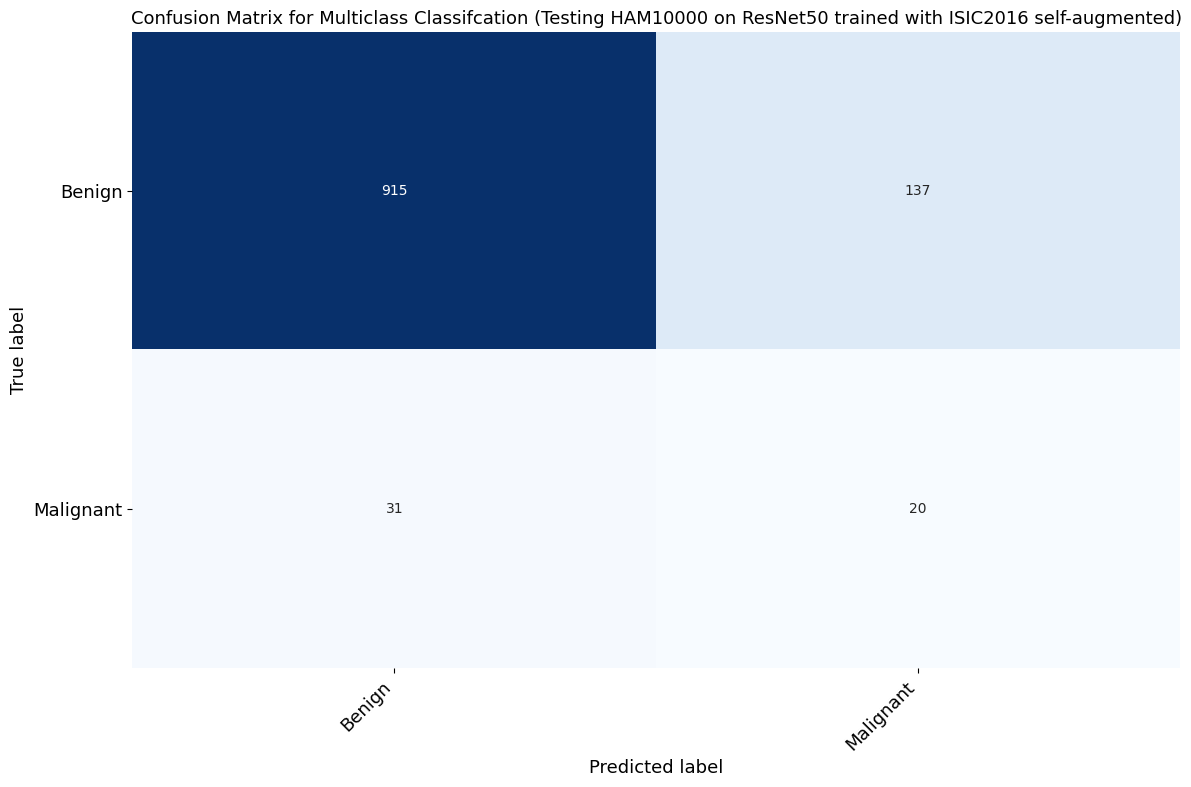

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2016 self-augmented model...



23/23 [==============================] - 1s 27ms/step - loss: 0.2036 - accuracy: 0.9111
Train loss = 0.20360594987869263  ;  Train accuracy = 91.11%

6/6 [==============================] - 0s 24ms/step - loss: 0.4059 - accuracy: 0.8278
Validation loss = 0.40587061643600464  ;  Validation accuracy = 82.78%

12/12 [==============================] - 0s 26ms/step - loss: 0.4028 - accuracy: 0.8285
Test loss = 0.40279167890548706  ;  Test accuracy = 82.85%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2016 self-augmented...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2016 self-augmented model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.90      1.00      0.95       583
   Malignant       0.97      0.55      0.70       137

    accuracy                           0.91       720
   macro avg       0.94      0.77      0.82       720
weighted avg       0.92      0.91      0.90       720

Test Report :

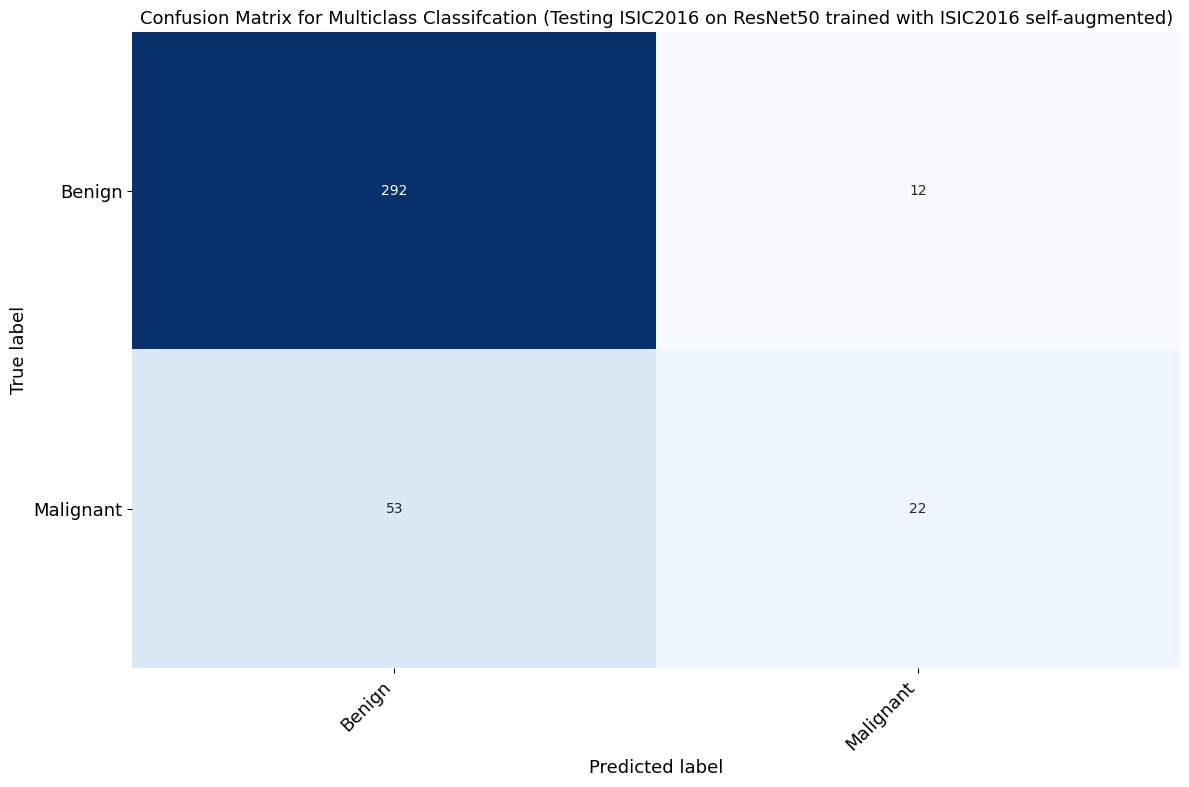

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2016 self-augmented model...



63/63 [==============================] - 2s 23ms/step - loss: 0.3922 - accuracy: 0.8325
Train loss = 0.39219292998313904  ;  Train accuracy = 83.25%

5/5 [==============================] - 0s 22ms/step - loss: 0.4634 - accuracy: 0.8333
Validation loss = 0.463355153799057  ;  Validation accuracy = 83.33%

19/19 [==============================] - 0s 22ms/step - loss: 0.5324 - accuracy: 0.7817
Test loss = 0.5324428081512451  ;  Test accuracy = 78.17%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2016 self-augmented...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2016 self-augmented model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.85      0.97      0.90      1626
   Malignant       0.63      0.25      0.35       374

    accuracy                           0.83      2000
   macro avg       0.74      0.61      0.63      2000
weighted avg       0.81      0.83      0.80      2000

Test Report :
  

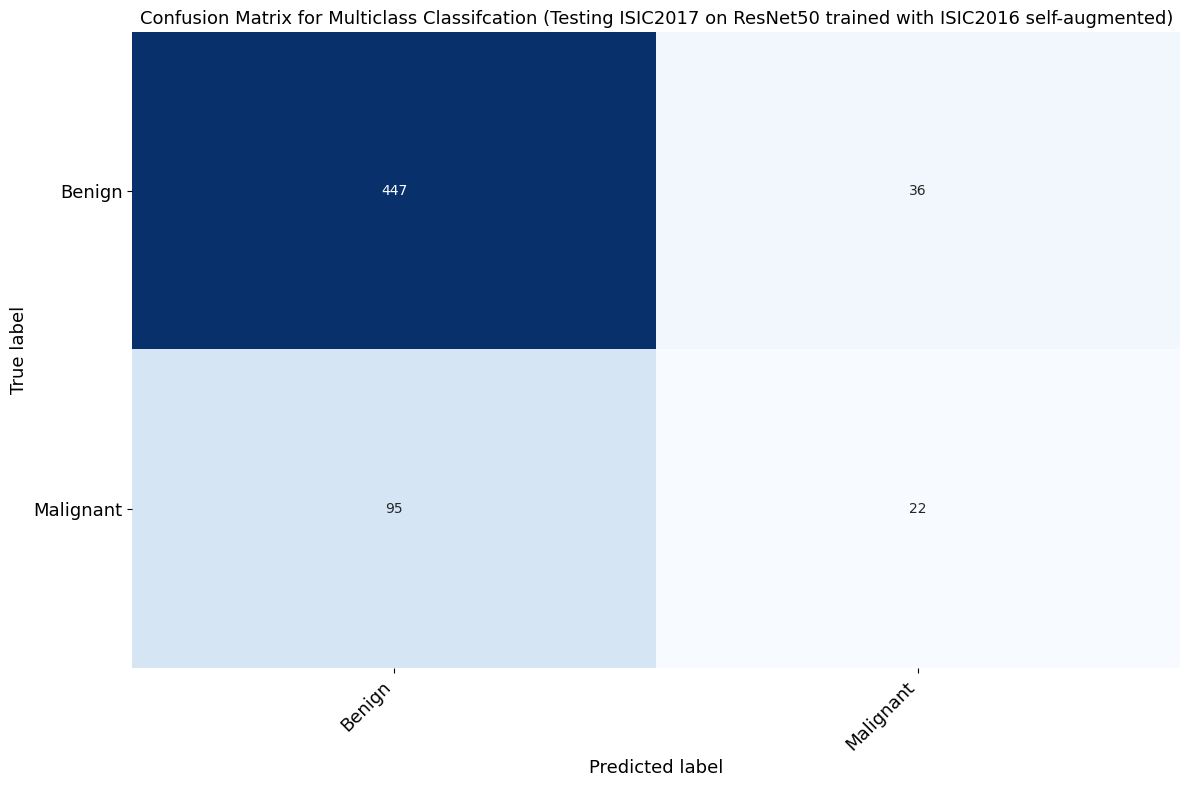

In [20]:
model_name = 'ResNet50 trained with ISIC2016 self-augmented'
filename = 'ResNet50 on ISIC2016 self-augmented.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
31/31 [==============================] - 16s 516ms/step - loss: 0.7204 - accuracy: 0.6482 - val_loss: 0.5890 - val_accuracy: 0.6733
Epoch 3/30
31/31 [==============================] - 17s 518ms/step - loss: 0.6631 - accuracy: 0.6705 - val_loss: 0.4772 - val_accuracy: 0.7733
Epoch 4/30
31/31 [==============================] - 17s 518ms/step - loss: 0.6130 - accuracy: 0.6946 - val_loss: 0.4617 - val_accuracy: 0.7867
Epoch 5/30
31/31 [==============================] - 17s 522ms/step - loss: 0.5717 - accuracy: 0.7288 - val_loss: 0.4552 - val_accuracy: 0.7867
Epoch 6/30
31/31 [==============================] - 17s 517ms/step - loss: 0.5515 - accuracy: 0.7428 - val_loss: 0.4386 - val_accuracy: 0.7933
Epoch 7/30
31/31 [==============================] - 16s 515ms/step - loss: 0.5563 - accuracy: 0.7428 - val_loss: 0.4513 - val_accuracy: 0.8133
Epoch 8/30
31/31 [==============================] - 16s 528ms/step - loss: 0.5229 - accuracy: 0.7536 - val_loss: 0.4454 - val_accuracy: 0.8133

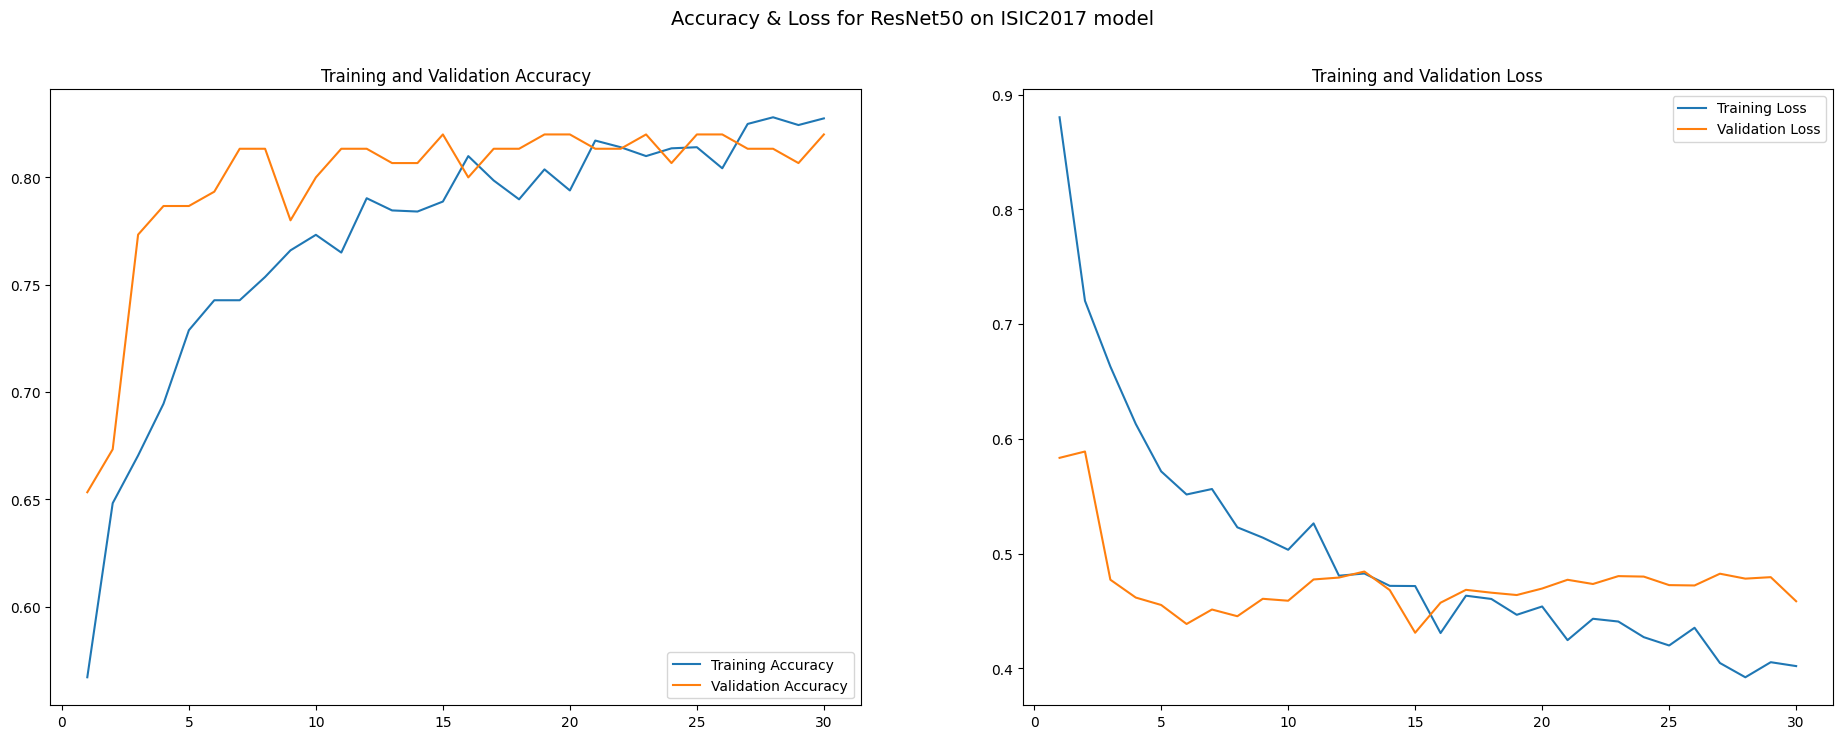

In [17]:
# Solely training ISIC2017
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')


base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2017'
model = base_model.myresnet50()

# Train ISIC2017
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2017 model...

52/52 [==============================] - 2s 23ms/step - loss: 0.6535 - accuracy: 0.6683
Train loss = 0.6535210609436035  ;  Train accuracy = 66.83%

32/32 [==============================] - 1s 23ms/step - loss: 0.6320 - accuracy: 0.6770
Validation loss = 0.6319543123245239  ;  Validation accuracy = 67.70%

21/21 [==============================] - 1s 28ms/step - loss: 0.6392 - accuracy: 0.6682
Test loss = 0.6391757726669312  ;  Test accuracy = 66.82%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2017...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.64      0.94      0.76       905
   Malignant       0.82      0.33      0.47       732

    accuracy                           0.67      1637
   macro avg       0.73      0.64      0.62      1637
wei

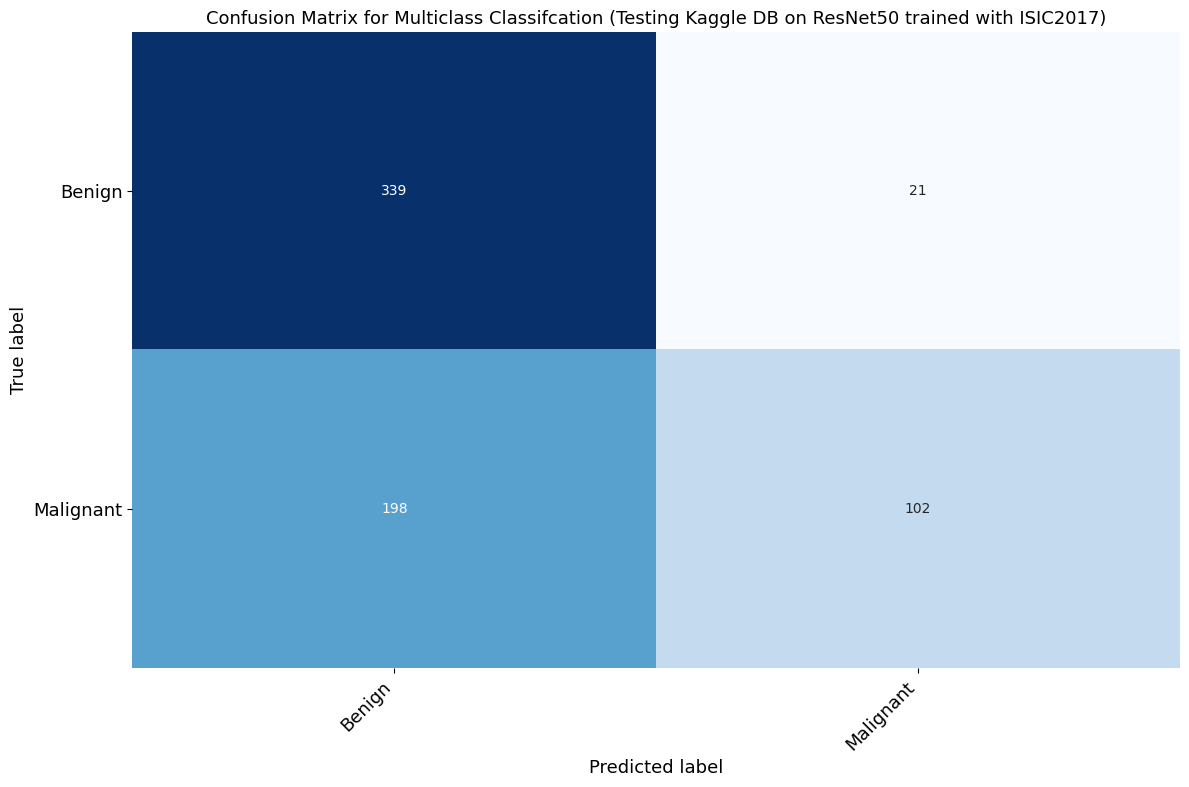

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2017 model...

251/251 [==============================] - 7s 25ms/step - loss: 0.4113 - accuracy: 0.8215
Train loss = 0.4113178253173828  ;  Train accuracy = 82.15%

28/28 [==============================] - 1s 23ms/step - loss: 0.3094 - accuracy: 0.8856
Validation loss = 0.3093685805797577  ;  Validation accuracy = 88.56%

35/35 [==============================] - 1s 22ms/step - loss: 0.2983 - accuracy: 0.9003
Test loss = 0.29830220341682434  ;  Test accuracy = 90.03%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2017...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.90      0.89      0.90      6994
   Malignant       0.32      0.35      0.33      1035

    accuracy                           0.82      8029
   macro avg       0.61      0.62      0.62      8029
weig

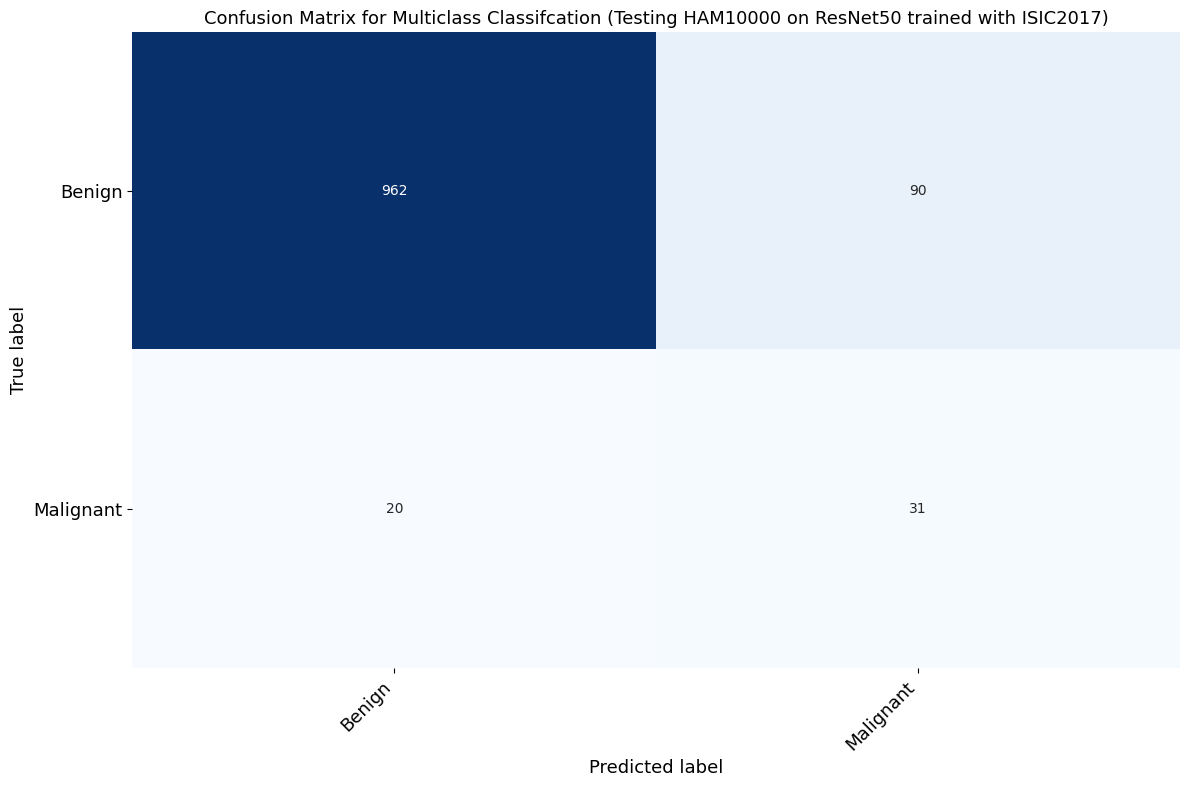

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2017 model...

23/23 [==============================] - 1s 23ms/step - loss: 0.3636 - accuracy: 0.8333
Train loss = 0.36356425285339355  ;  Train accuracy = 83.33%

6/6 [==============================] - 0s 21ms/step - loss: 0.3660 - accuracy: 0.8278
Validation loss = 0.36602112650871277  ;  Validation accuracy = 82.78%

12/12 [==============================] - 0s 22ms/step - loss: 0.3515 - accuracy: 0.8470
Test loss = 0.3514694571495056  ;  Test accuracy = 84.70%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2017...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.87      0.93      0.90       583
   Malignant       0.59      0.40      0.48       137

    accuracy                           0.83       720
   macro avg       0.73      0.67      0.69       720
weighte

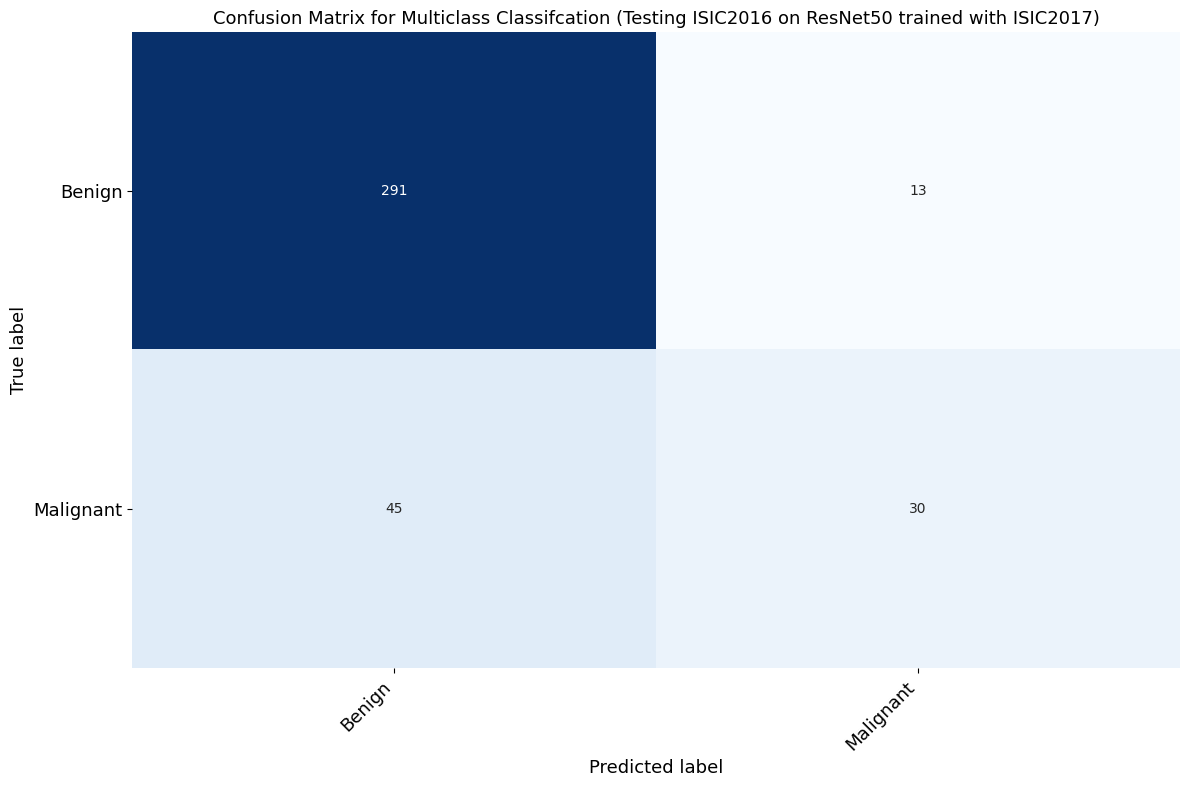

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2017 model...

63/63 [==============================] - 2s 23ms/step - loss: 0.3561 - accuracy: 0.8485
Train loss = 0.3560885190963745  ;  Train accuracy = 84.85%

5/5 [==============================] - 0s 21ms/step - loss: 0.4327 - accuracy: 0.8133
Validation loss = 0.43267881870269775  ;  Validation accuracy = 81.33%

19/19 [==============================] - 0s 23ms/step - loss: 0.4370 - accuracy: 0.8017
Test loss = 0.4369643032550812  ;  Test accuracy = 80.17%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2017...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.86      0.96      0.91      1626
   Malignant       0.69      0.34      0.46       374

    accuracy                           0.85      2000
   macro avg       0.78      0.65      0.69      2000
weighted

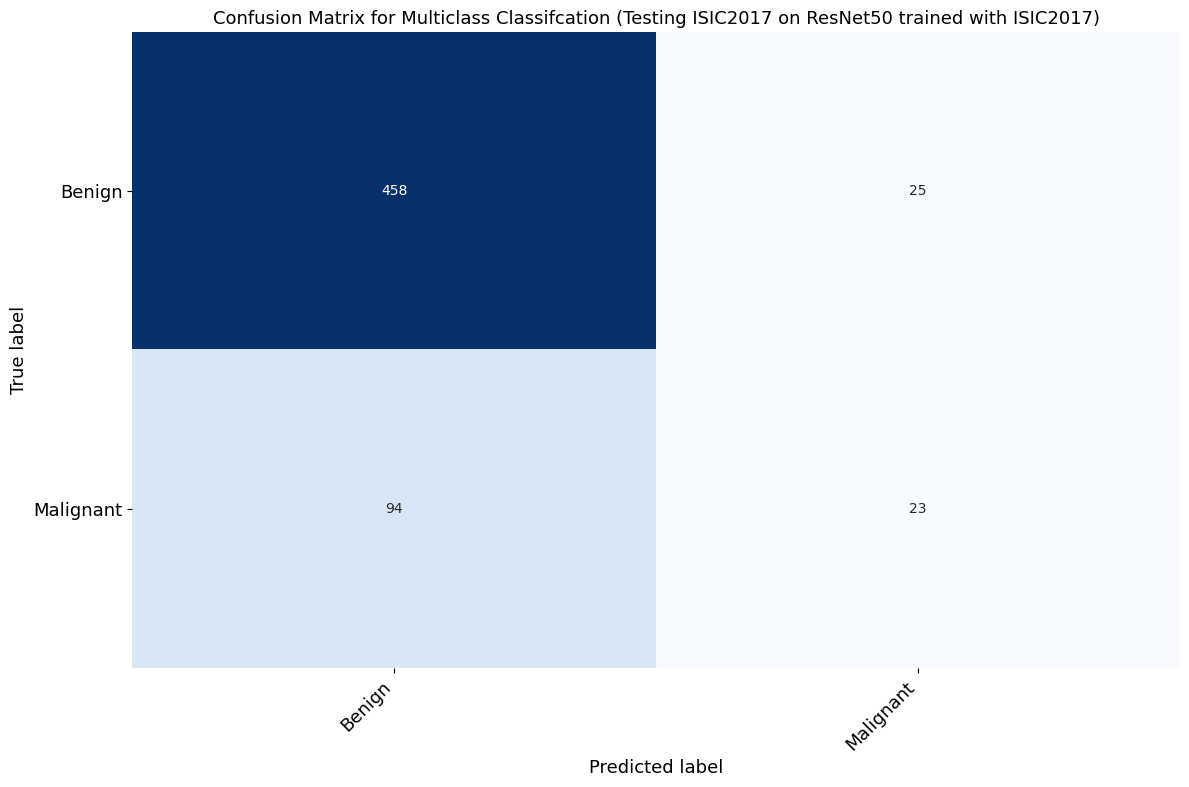

In [21]:
model_name = 'ResNet50 trained with ISIC2017'
filename = 'ResNet50 on ISIC2017.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Reloading 'melanoma.util'.
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_19 (Dropout)       

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
136/136 [==============================] - 72s 530ms/step - loss: 0.4821 - accuracy: 0.7755 - val_loss: 0.1940 - val_accuracy: 0.9445
Epoch 3/30
136/136 [==============================] - 73s 533ms/step - loss: 0.4297 - accuracy: 0.8162 - val_loss: 0.1767 - val_accuracy: 0.9445
Epoch 4/30
136/136 [==============================] - 73s 533ms/step - loss: 0.3946 - accuracy: 0.8353 - val_loss: 0.1723 - val_accuracy: 0.9436
Epoch 5/30
136/136 [==============================] - 73s 531ms/step - loss: 0.3855 - accuracy: 0.8388 - val_loss: 0.1699 - val_accuracy: 0.9445
Epoch 6/30
136/136 [==============================] - 73s 530ms/step - loss: 0.3606 - accuracy: 0.8493 - val_loss: 0.1643 - val_accuracy: 0.9426
Epoch 7/30
136/136 [==============================] - 73s 532ms/step - loss: 0.3453 - accuracy: 0.8572 - val_loss: 0.1595 - val_accuracy: 0.9464
Epoch 8/30
136/136 [==============================] - 73s 531ms/step - loss: 0.3464 - accuracy: 0.8625 - val_loss: 0.1609 - val_ac

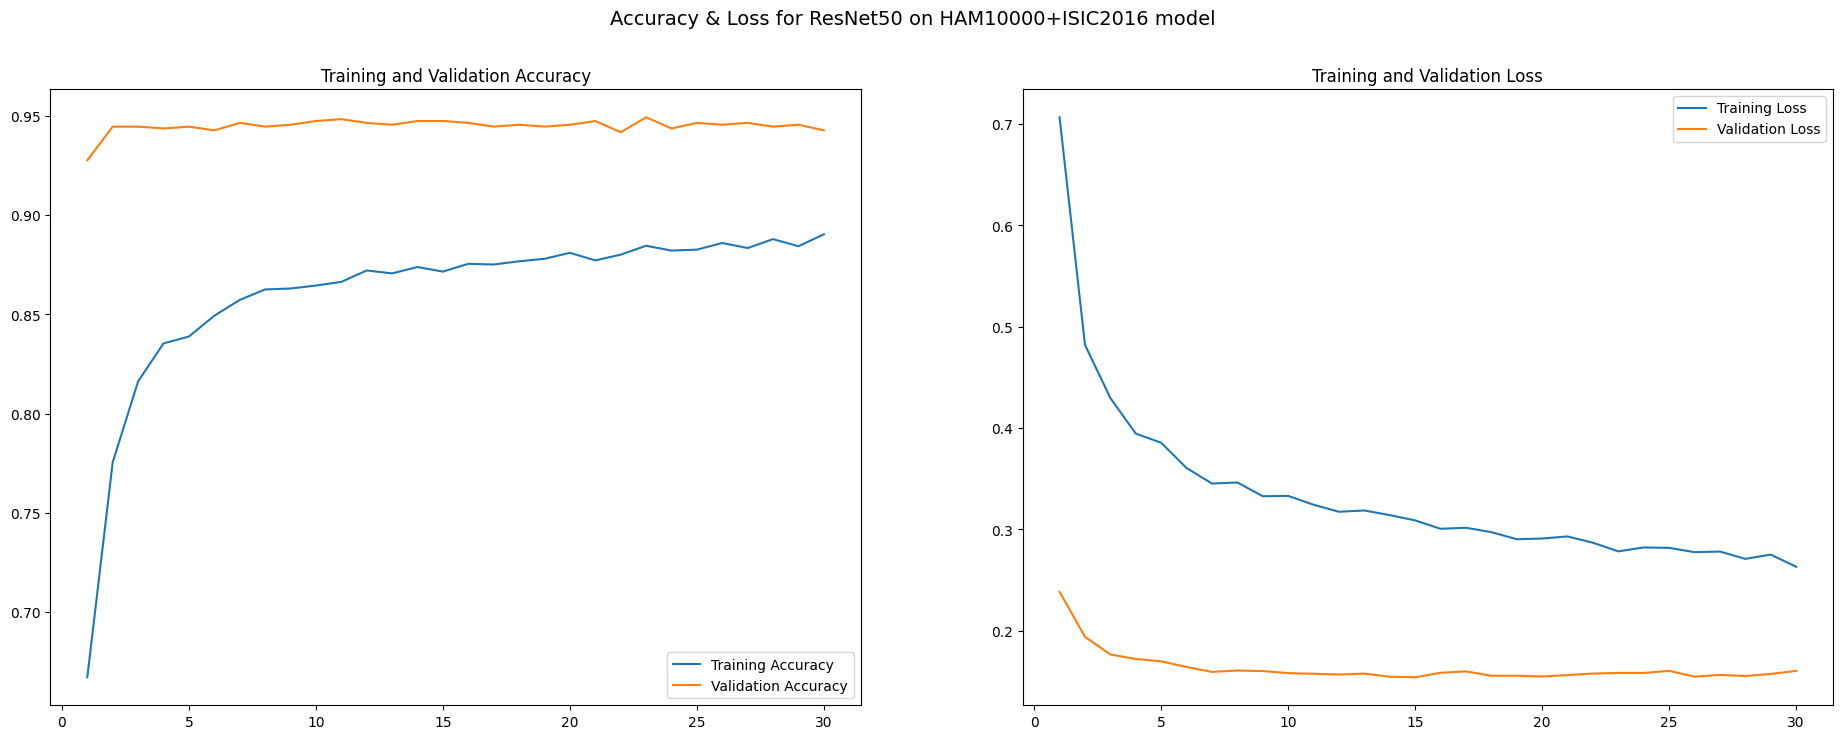

In [19]:
# training HAM10000 + ISIC2016
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_ISIC2016_224h_224w.pkl')
# HAM10000_ISIC2016_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000+ISIC2016'
model = base_model.myresnet50()

# Train HAM10000 + ISIC2016
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with HAM10000+ISIC2016 model...



52/52 [==============================] - 2s 23ms/step - loss: 0.9123 - accuracy: 0.6243
Train loss = 0.9122896790504456  ;  Train accuracy = 62.43%

32/32 [==============================] - 1s 28ms/step - loss: 0.9235 - accuracy: 0.6180
Validation loss = 0.9234501719474792  ;  Validation accuracy = 61.80%

21/21 [==============================] - 1s 26ms/step - loss: 0.9185 - accuracy: 0.6242
Test loss = 0.9184977412223816  ;  Test accuracy = 62.42%
Computing predictions for Testing Kaggle DB on ResNet50 trained with HAM10000+ISIC2016...
Model report for Testing Kaggle DB on ResNet50 trained with HAM10000+ISIC2016 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.60      1.00      0.75       905
   Malignant       0.97      0.17      0.28       732

    accuracy                           0.62      1637
   macro avg       0.78      0.58      0.51      1637
weighted avg       0.76      0.62      0.54      1637

Test Report :
          

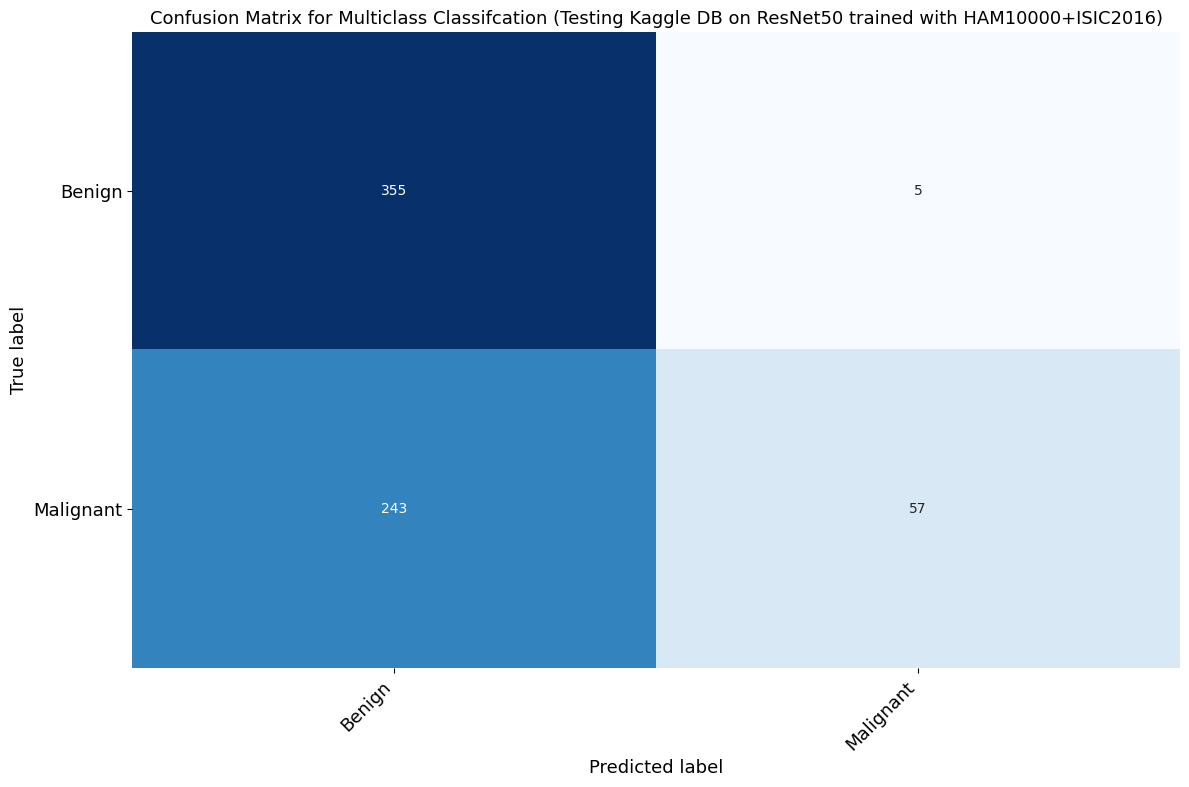

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with HAM10000+ISIC2016 model...



251/251 [==============================] - 7s 25ms/step - loss: 0.2470 - accuracy: 0.8958
Train loss = 0.24702265858650208  ;  Train accuracy = 89.58%

28/28 [==============================] - 1s 23ms/step - loss: 0.1049 - accuracy: 0.9672
Validation loss = 0.10491738468408585  ;  Validation accuracy = 96.72%

35/35 [==============================] - 1s 22ms/step - loss: 0.0961 - accuracy: 0.9655
Test loss = 0.09607723355293274  ;  Test accuracy = 96.55%
Computing predictions for Testing HAM10000 on ResNet50 trained with HAM10000+ISIC2016...
Model report for Testing HAM10000 on ResNet50 trained with HAM10000+ISIC2016 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.90      0.98      0.94      6994
   Malignant       0.74      0.29      0.42      1035

    accuracy                           0.90      8029
   macro avg       0.82      0.64      0.68      8029
weighted avg       0.88      0.90      0.88      8029

Test Report :
       

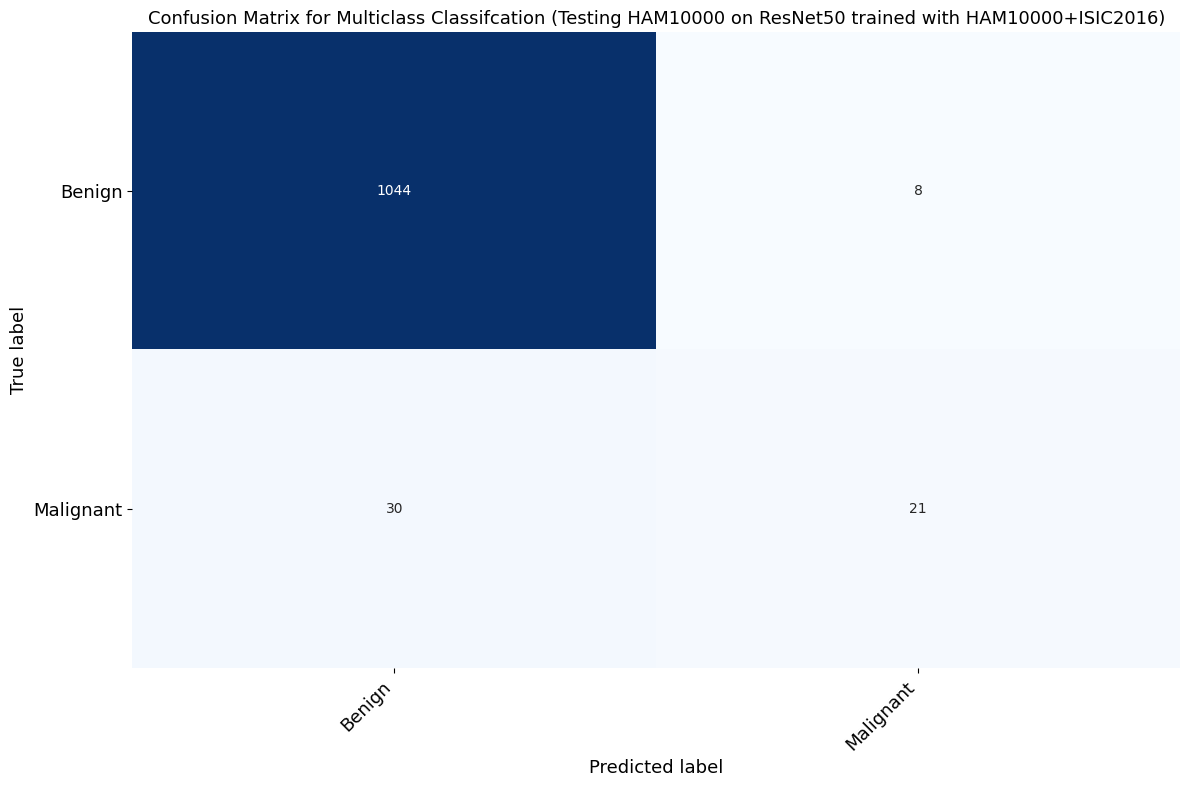

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with HAM10000+ISIC2016 model...



23/23 [==============================] - 1s 23ms/step - loss: 0.3808 - accuracy: 0.8292
Train loss = 0.38084790110588074  ;  Train accuracy = 82.92%

6/6 [==============================] - 0s 22ms/step - loss: 0.3959 - accuracy: 0.8500
Validation loss = 0.39586320519447327  ;  Validation accuracy = 85.00%

12/12 [==============================] - 0s 23ms/step - loss: 0.4141 - accuracy: 0.8259
Test loss = 0.414061576128006  ;  Test accuracy = 82.59%
Computing predictions for Testing ISIC2016 on ResNet50 trained with HAM10000+ISIC2016...
Model report for Testing ISIC2016 on ResNet50 trained with HAM10000+ISIC2016 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.99      0.90       583
   Malignant       0.75      0.15      0.25       137

    accuracy                           0.83       720
   macro avg       0.79      0.57      0.58       720
weighted avg       0.82      0.83      0.78       720

Test Report :
             

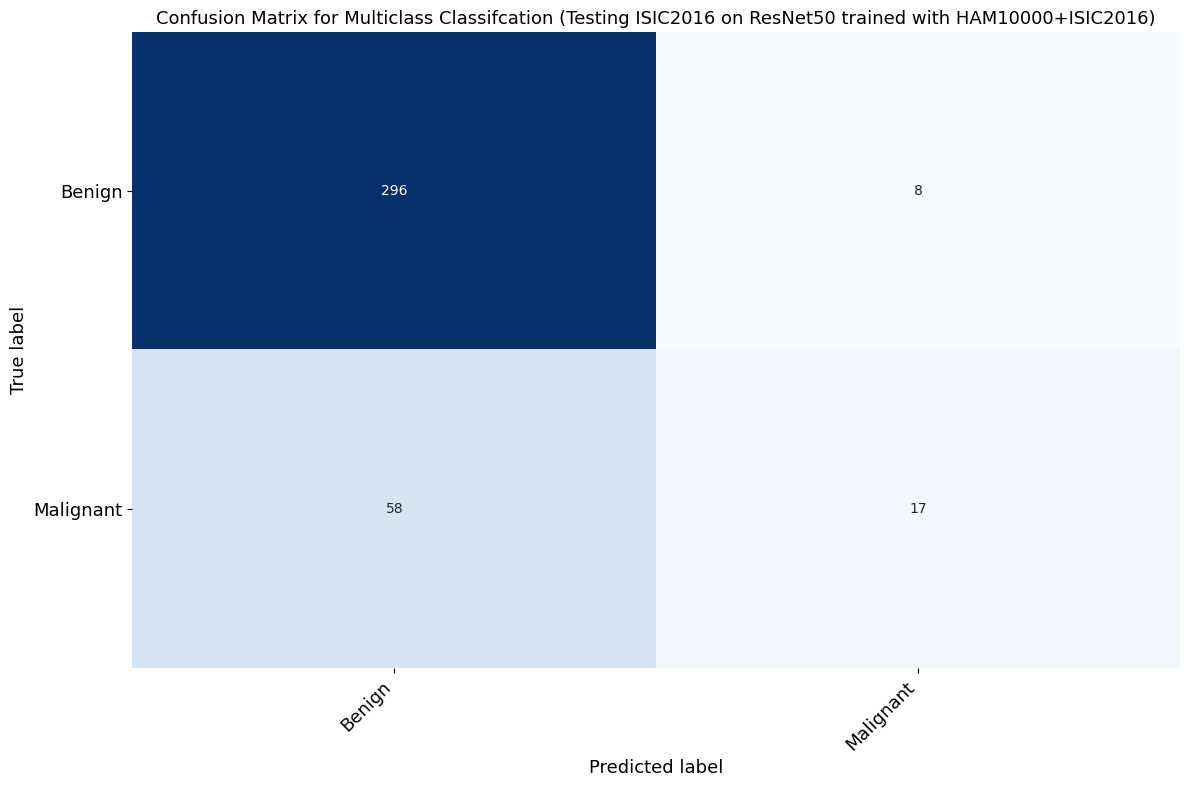

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with HAM10000+ISIC2016 model...



63/63 [==============================] - 2s 23ms/step - loss: 0.4689 - accuracy: 0.8270
Train loss = 0.46887820959091187  ;  Train accuracy = 82.70%

5/5 [==============================] - 0s 21ms/step - loss: 0.5510 - accuracy: 0.7867
Validation loss = 0.5510446429252625  ;  Validation accuracy = 78.67%

19/19 [==============================] - 0s 22ms/step - loss: 0.5849 - accuracy: 0.8167
Test loss = 0.5848765969276428  ;  Test accuracy = 81.67%
Computing predictions for Testing ISIC2017 on ResNet50 trained with HAM10000+ISIC2016...
Model report for Testing ISIC2017 on ResNet50 trained with HAM10000+ISIC2016 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.99      0.90      1626
   Malignant       0.71      0.13      0.21       374

    accuracy                           0.83      2000
   macro avg       0.77      0.56      0.56      2000
weighted avg       0.81      0.83      0.77      2000

Test Report :
             

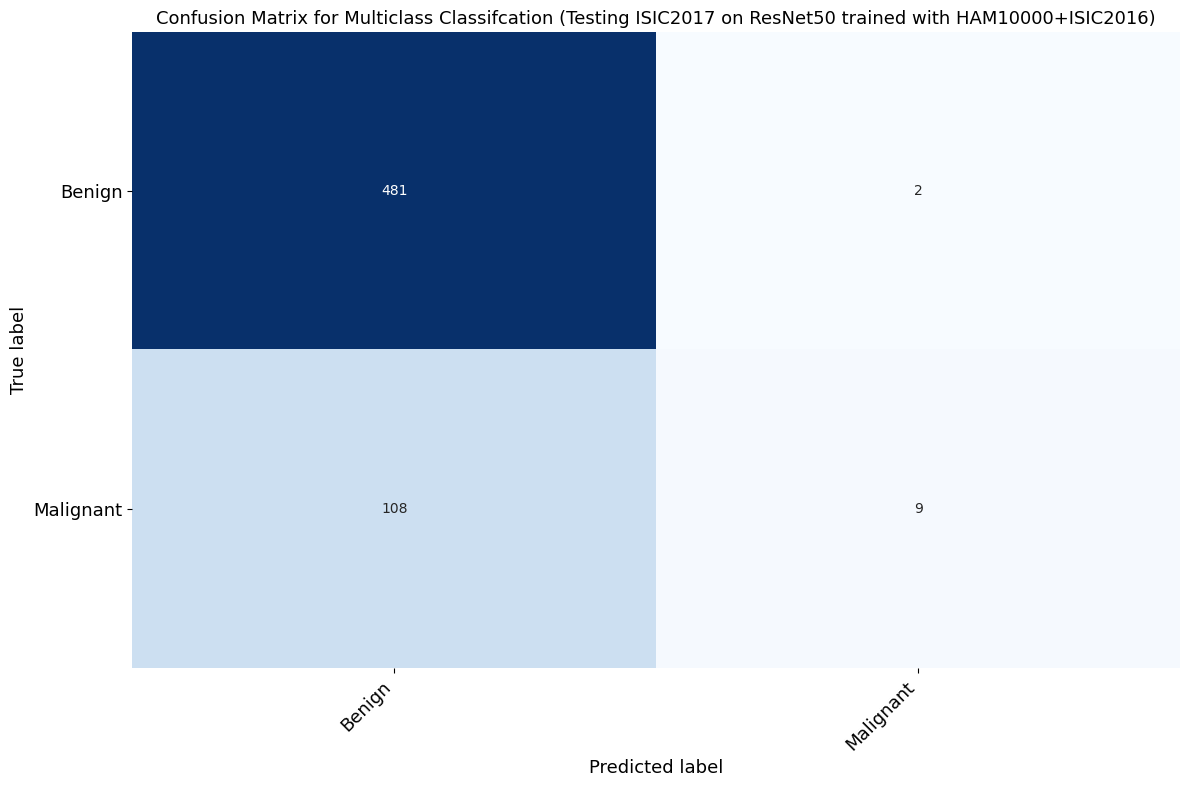

In [22]:
model_name = 'ResNet50 trained with HAM10000+ISIC2016'
filename = 'ResNet50 on HAM10000+ISIC2016.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


In [3]:
# training HAM10000 + ISIC2016 + ISIC2017
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_ISIC2016_ISIC2017_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000+ISIC2016+ISIC2017'
model = base_model.myresnet50()

# Train HAM10000 + ISIC2016 +ISIC2017
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

2023-12-31 18:07:58.762737: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-12-31 18:07:58.935694: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-12-31 18:07:58.935737: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-12-31 18:07:58.940127: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-31 18:07:58.940168: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-12-31 18:07:58.941380: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

2023-12-31 18:08:01.674288: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-12-31 18:08:01.692771: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/30


2023-12-31 18:08:04.755436: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-12-31 18:08:05.390333: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-12-31 18:08:06.076889: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-12-31 18:08:06.076916: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-12-31 18:08:06.076976: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-31 18:08:06.121067: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-31 18:08:06.853507: I tensorflow/stream_exec

  1/167 [..............................] - ETA: 16:22 - loss: 1.0053 - accuracy: 0.5000

2023-12-31 18:08:07.616418: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


167/167 [==============================] - 96s 545ms/step - loss: 0.8718 - accuracy: 0.5653 - val_loss: 0.4796 - val_accuracy: 0.7774


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
167/167 [==============================] - 89s 527ms/step - loss: 0.7012 - accuracy: 0.6445 - val_loss: 0.3726 - val_accuracy: 0.8739
Epoch 3/30
167/167 [==============================] - 89s 529ms/step - loss: 0.5901 - accuracy: 0.7079 - val_loss: 0.3246 - val_accuracy: 0.8978
Epoch 4/30
167/167 [==============================] - 89s 529ms/step - loss: 0.5254 - accuracy: 0.7493 - val_loss: 0.2692 - val_accuracy: 0.9093
Epoch 5/30
167/167 [==============================] - 89s 528ms/step - loss: 0.4840 - accuracy: 0.7788 - val_loss: 0.2369 - val_accuracy: 0.9176
Epoch 6/30
167/167 [==============================] - 89s 530ms/step - loss: 0.4402 - accuracy: 0.8055 - val_loss: 0.2263 - val_accuracy: 0.9225
Epoch 7/30
167/167 [==============================] - 89s 527ms/step - loss: 0.4200 - accuracy: 0.8153 - val_loss: 0.2292 - val_accuracy: 0.9225
Epoch 8/30
167/167 [==============================] - 89s 527ms/step - loss: 0.4039 - accuracy: 0.8292 - val_loss: 0.2179 - val_ac

NameError: name 'visualizer' is not defined

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model...

52/52 [==============================] - 2s 27ms/step - loss: 0.6887 - accuracy: 0.6726
Train loss = 0.6887197494506836  ;  Train accuracy = 67.26%

32/32 [==============================] - 1s 25ms/step - loss: 0.6961 - accuracy: 0.6630
Validation loss = 0.696125328540802  ;  Validation accuracy = 66.30%

21/21 [==============================] - 0s 23ms/step - loss: 0.7109 - accuracy: 0.6833
Test loss = 0.7109421491622925  ;  Test accuracy = 68.33%
Computing predictions for Testing Kaggle DB on ResNet50 trained with HAM10000+ISIC2016+ISIC2017...
Model report for Testing Kaggle DB on ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.63      0.99      0.77       905
   Malignant       0.95      0.28      0.43       732

    accuracy                           0.67      1637
   m

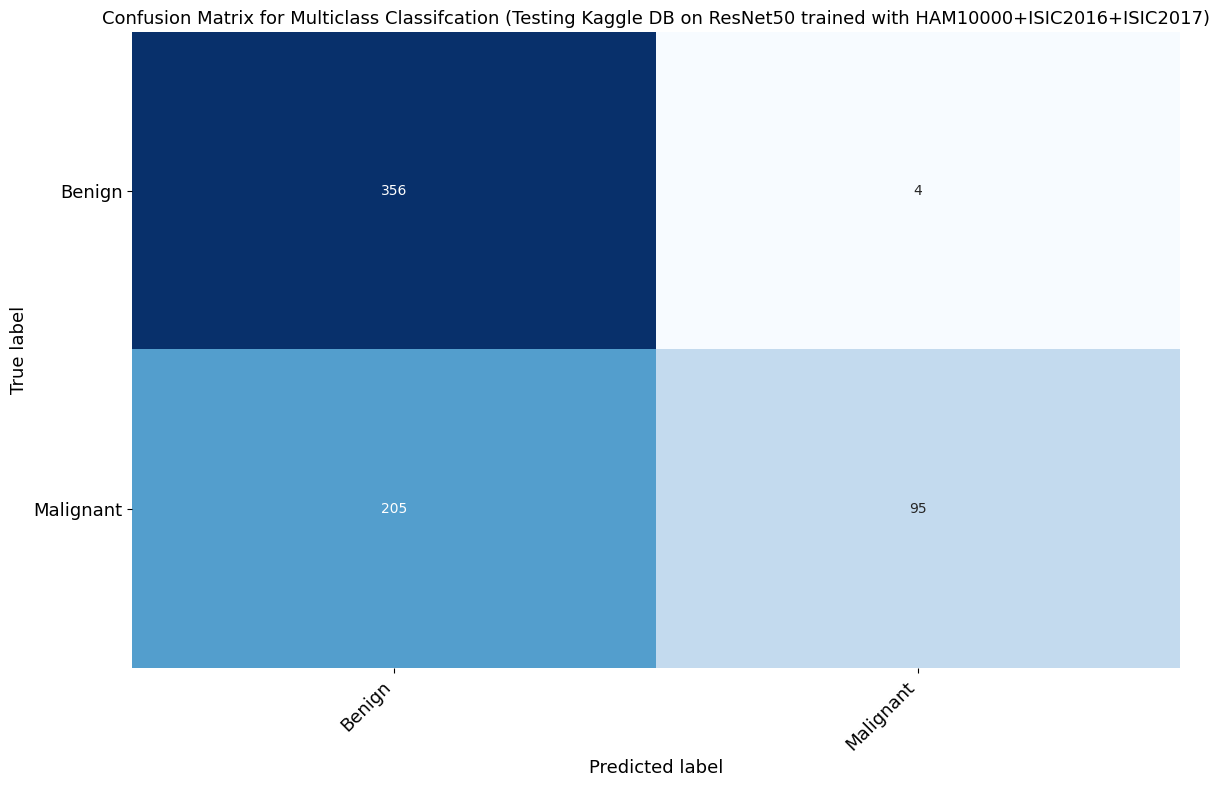

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model...

251/251 [==============================] - 7s 24ms/step - loss: 0.2350 - accuracy: 0.9005
Train loss = 0.23495809733867645  ;  Train accuracy = 90.05%

28/28 [==============================] - 1s 22ms/step - loss: 0.1083 - accuracy: 0.9615
Validation loss = 0.10830364376306534  ;  Validation accuracy = 96.15%

35/35 [==============================] - 1s 22ms/step - loss: 0.0965 - accuracy: 0.9646
Test loss = 0.09647033363580704  ;  Test accuracy = 96.46%
Computing predictions for Testing HAM10000 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017...
Model report for Testing HAM10000 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.92      0.97      0.94      6994
   Malignant       0.69      0.41      0.52      1035

    accuracy                           0.90      8029
  

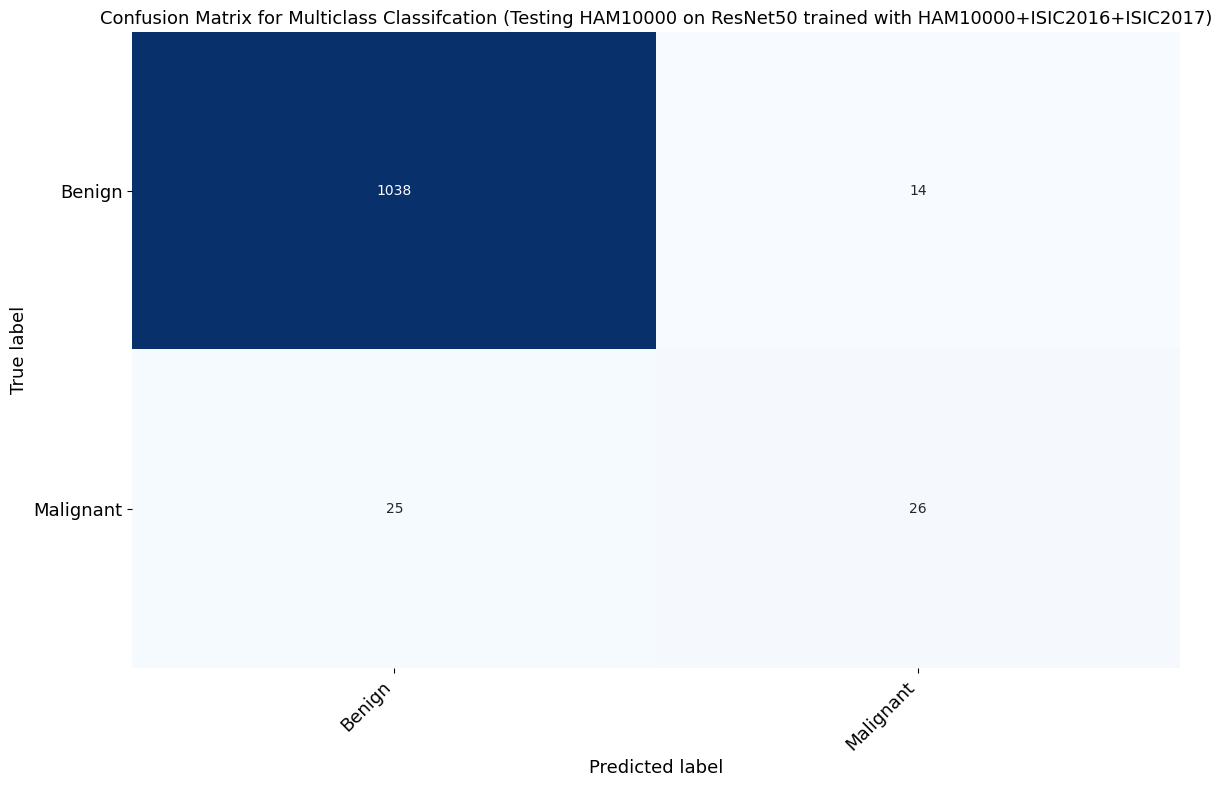

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model...

23/23 [==============================] - 1s 26ms/step - loss: 0.3202 - accuracy: 0.8514
Train loss = 0.32021093368530273  ;  Train accuracy = 85.14%

6/6 [==============================] - 0s 25ms/step - loss: 0.3468 - accuracy: 0.8556
Validation loss = 0.34680822491645813  ;  Validation accuracy = 85.56%

12/12 [==============================] - 0s 28ms/step - loss: 0.3375 - accuracy: 0.8549
Test loss = 0.3374946713447571  ;  Test accuracy = 85.49%
Computing predictions for Testing ISIC2016 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017...
Model report for Testing ISIC2016 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.86      0.98      0.91       583
   Malignant       0.79      0.30      0.43       137

    accuracy                           0.85       720
   macr

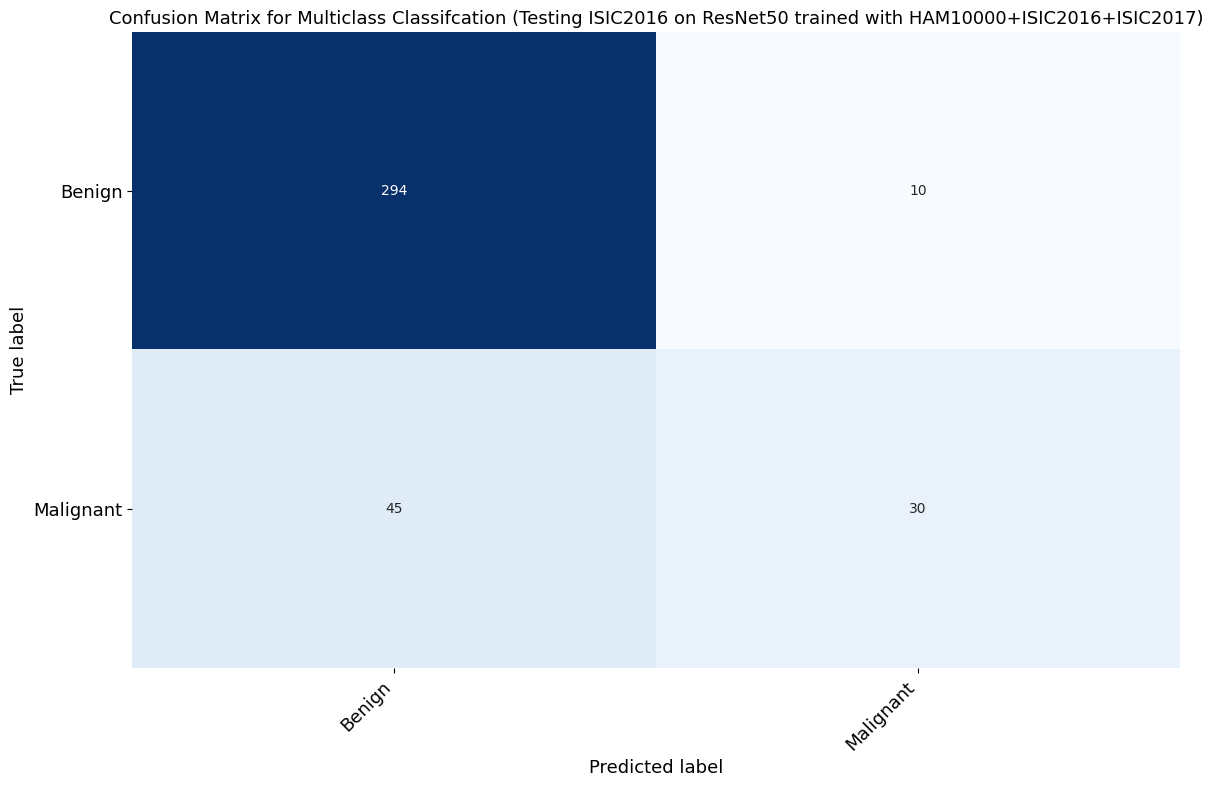

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model...

63/63 [==============================] - 2s 23ms/step - loss: 0.3451 - accuracy: 0.8500
Train loss = 0.34514424204826355  ;  Train accuracy = 85.00%

5/5 [==============================] - 0s 21ms/step - loss: 0.4362 - accuracy: 0.8200
Validation loss = 0.4362252354621887  ;  Validation accuracy = 82.00%

19/19 [==============================] - 0s 23ms/step - loss: 0.4398 - accuracy: 0.8300
Test loss = 0.4397520422935486  ;  Test accuracy = 83.00%
Computing predictions for Testing ISIC2017 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017...
Model report for Testing ISIC2017 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.86      0.98      0.91      1626
   Malignant       0.76      0.29      0.42       374

    accuracy                           0.85      2000
   macro

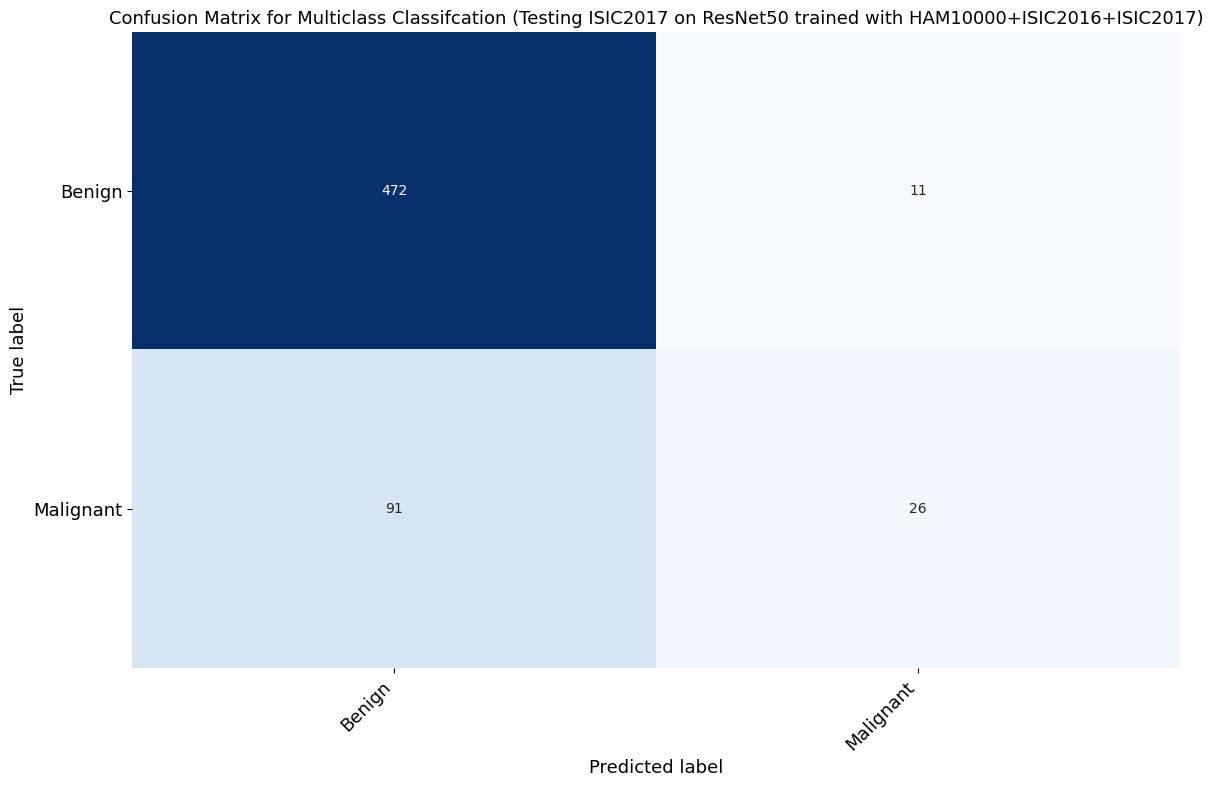

In [23]:
model_name = 'ResNet50 trained with HAM10000+ISIC2016+ISIC2017'
filename = 'ResNet50 on HAM10000+ISIC2016+ISIC2017.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

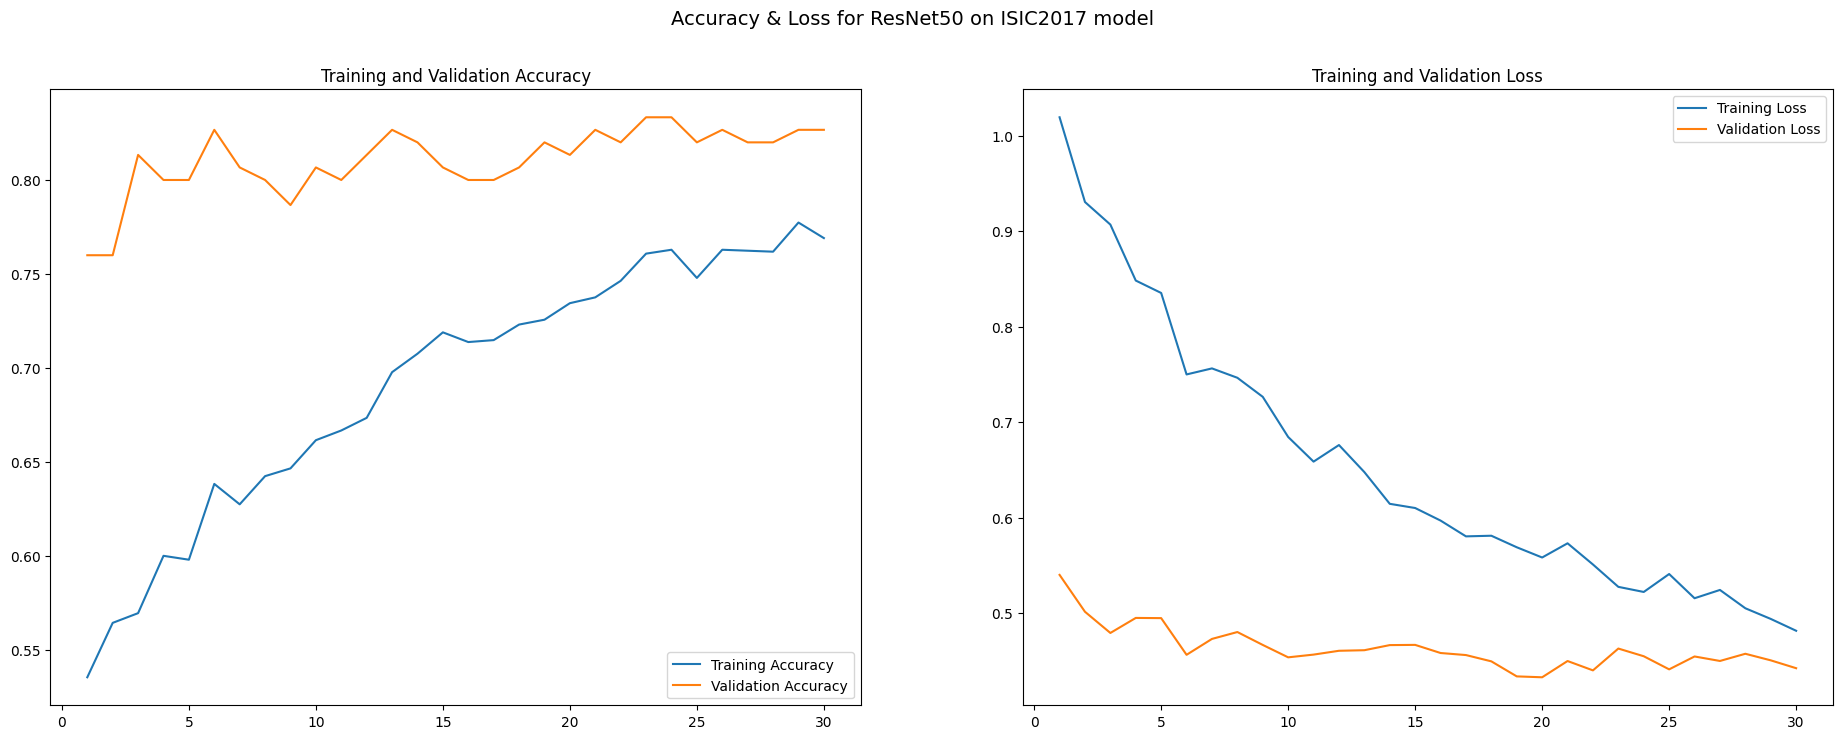

In [8]:
# training ISIC2017
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2017_224h_224w_binary.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2017'
model = base_model.myresnet50()

# Train ISIC2017
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2017 model...

52/52 [==============================] - 2s 23ms/step - loss: 0.6535 - accuracy: 0.6683
Train loss = 0.6535210609436035  ;  Train accuracy = 66.83%

32/32 [==============================] - 1s 22ms/step - loss: 0.6320 - accuracy: 0.6770
Validation loss = 0.6319543123245239  ;  Validation accuracy = 67.70%

21/21 [==============================] - 0s 22ms/step - loss: 0.6392 - accuracy: 0.6682
Test loss = 0.6391757726669312  ;  Test accuracy = 66.82%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2017...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.64      0.94      0.76       905
   Malignant       0.82      0.33      0.47       732

    accuracy                           0.67      1637
   macro avg       0.73      0.64      0.62      1637
wei

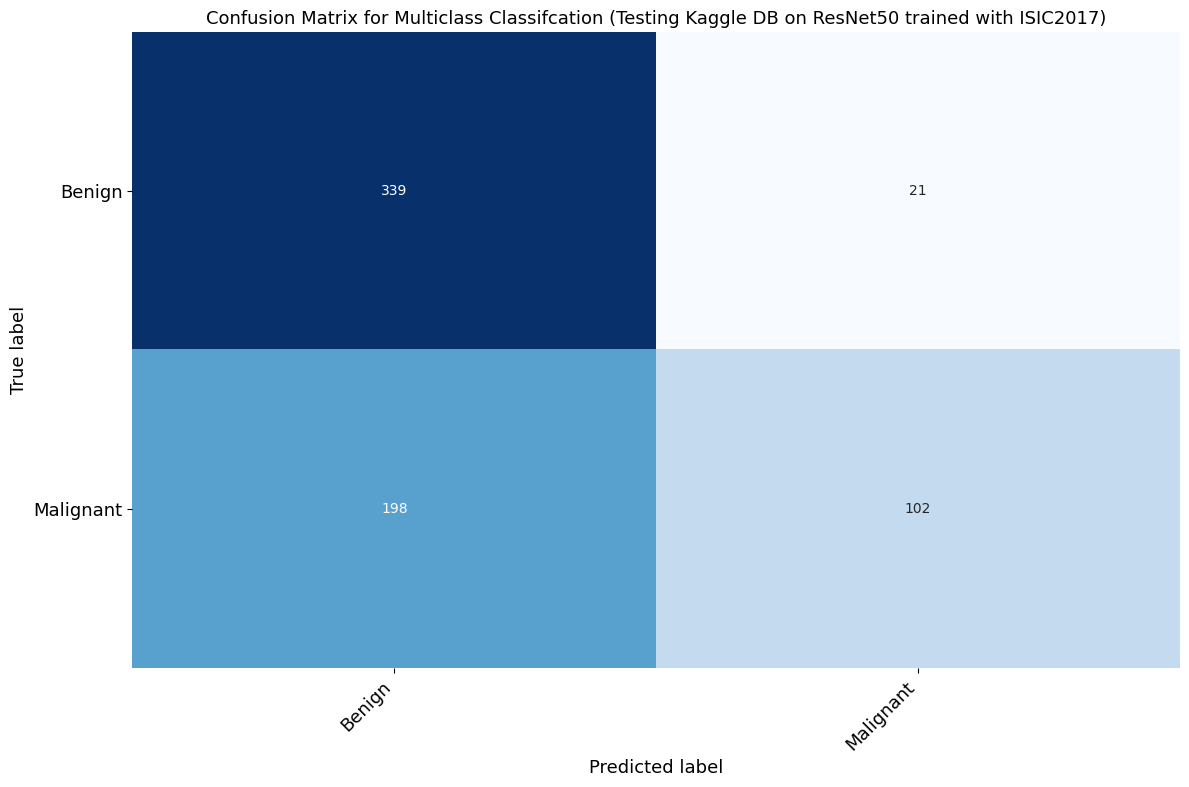

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2017 model...

251/251 [==============================] - 6s 23ms/step - loss: 0.4113 - accuracy: 0.8215
Train loss = 0.4113178253173828  ;  Train accuracy = 82.15%

28/28 [==============================] - 1s 23ms/step - loss: 0.3094 - accuracy: 0.8856
Validation loss = 0.3093685805797577  ;  Validation accuracy = 88.56%

35/35 [==============================] - 1s 27ms/step - loss: 0.2983 - accuracy: 0.9003
Test loss = 0.29830220341682434  ;  Test accuracy = 90.03%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2017...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.90      0.89      0.90      6994
   Malignant       0.32      0.35      0.33      1035

    accuracy                           0.82      8029
   macro avg       0.61      0.62      0.62      8029
weig

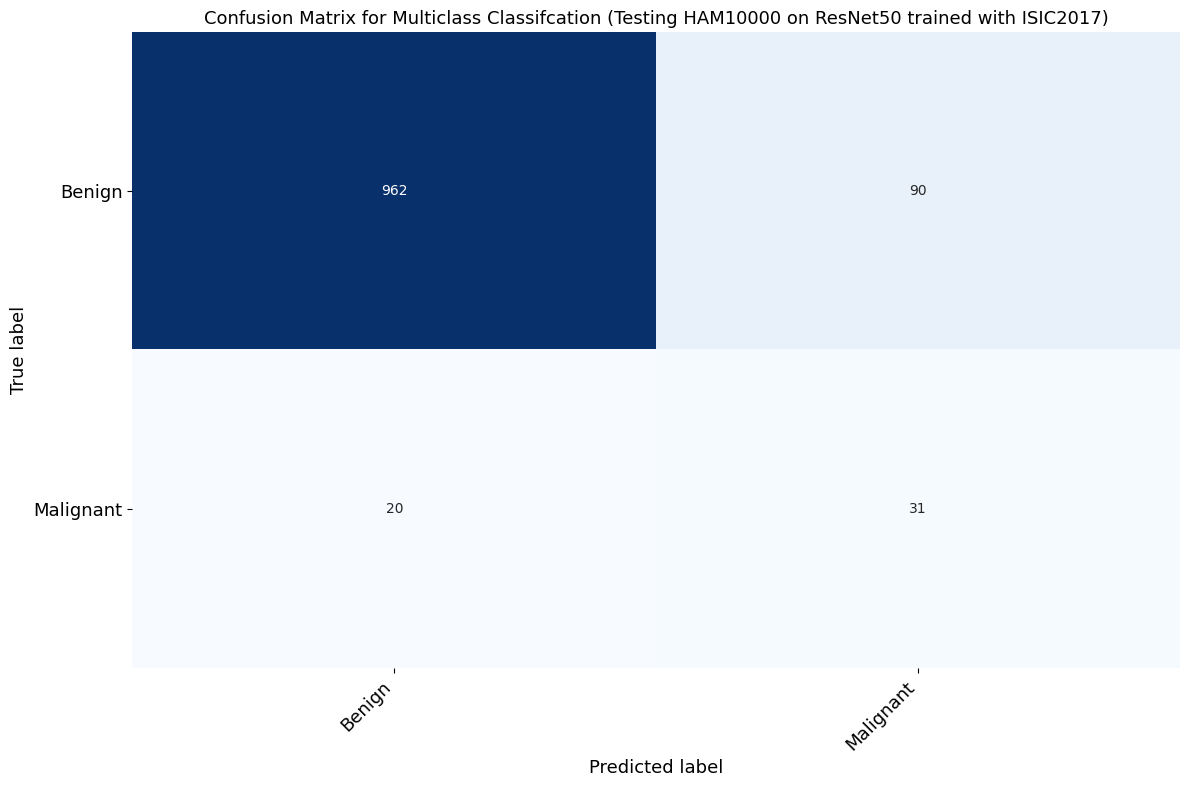

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2017 model...

23/23 [==============================] - 2s 27ms/step - loss: 0.3636 - accuracy: 0.8333
Train loss = 0.36356425285339355  ;  Train accuracy = 83.33%

6/6 [==============================] - 0s 21ms/step - loss: 0.3660 - accuracy: 0.8278
Validation loss = 0.36602112650871277  ;  Validation accuracy = 82.78%

12/12 [==============================] - 0s 22ms/step - loss: 0.3515 - accuracy: 0.8470
Test loss = 0.3514694571495056  ;  Test accuracy = 84.70%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2017...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.87      0.93      0.90       583
   Malignant       0.59      0.40      0.48       137

    accuracy                           0.83       720
   macro avg       0.73      0.67      0.69       720
weighte

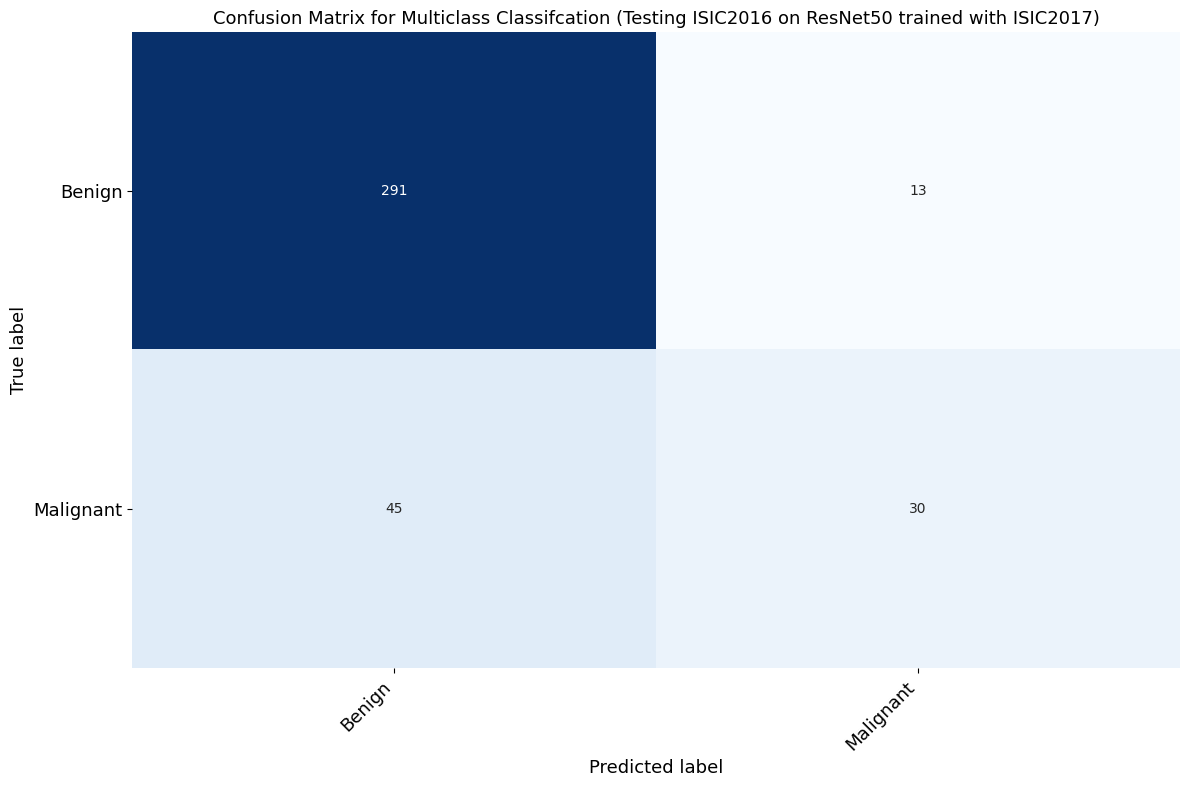

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2017 model...

63/63 [==============================] - 2s 23ms/step - loss: 0.3561 - accuracy: 0.8485
Train loss = 0.3560885190963745  ;  Train accuracy = 84.85%

5/5 [==============================] - 0s 21ms/step - loss: 0.4327 - accuracy: 0.8133
Validation loss = 0.43267881870269775  ;  Validation accuracy = 81.33%

19/19 [==============================] - 0s 25ms/step - loss: 0.4370 - accuracy: 0.8017
Test loss = 0.4369643032550812  ;  Test accuracy = 80.17%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2017...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.86      0.96      0.91      1626
   Malignant       0.69      0.34      0.46       374

    accuracy                           0.85      2000
   macro avg       0.78      0.65      0.69      2000
weighted

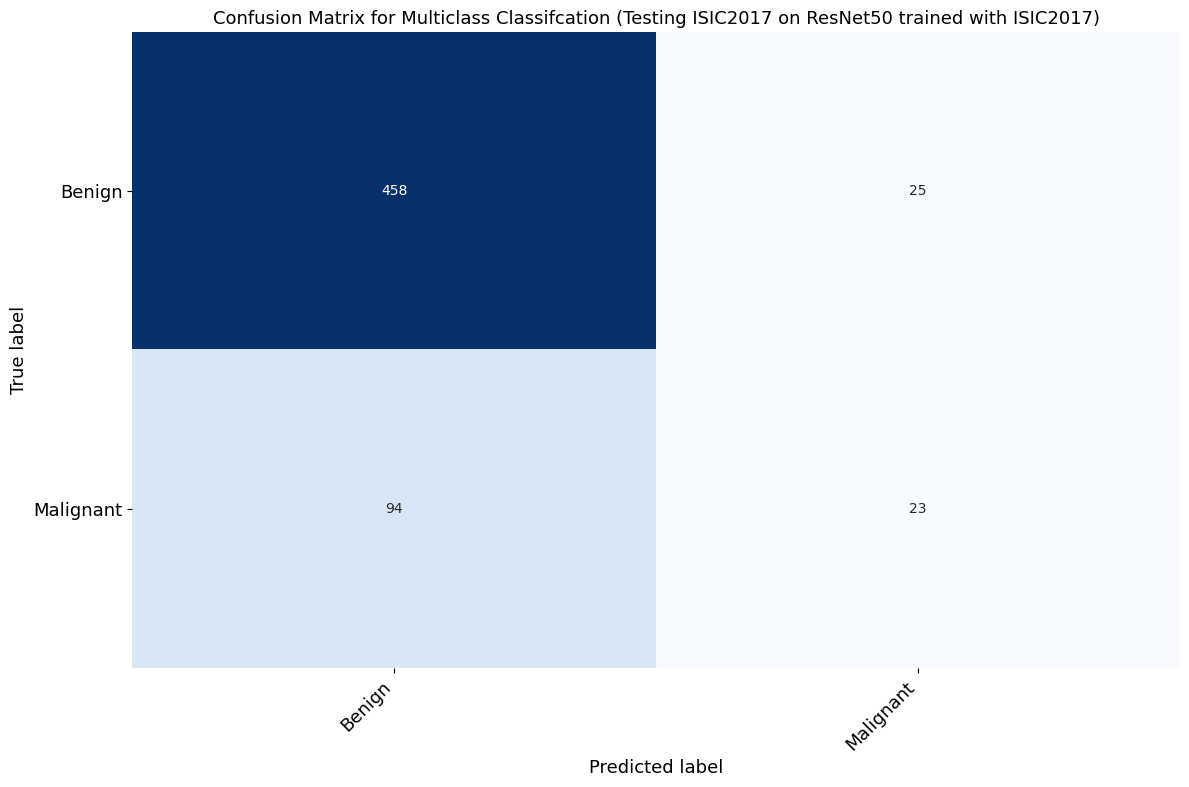

In [24]:
model_name = 'ResNet50 trained with ISIC2017'
filename = 'ResNet50 on ISIC2017.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

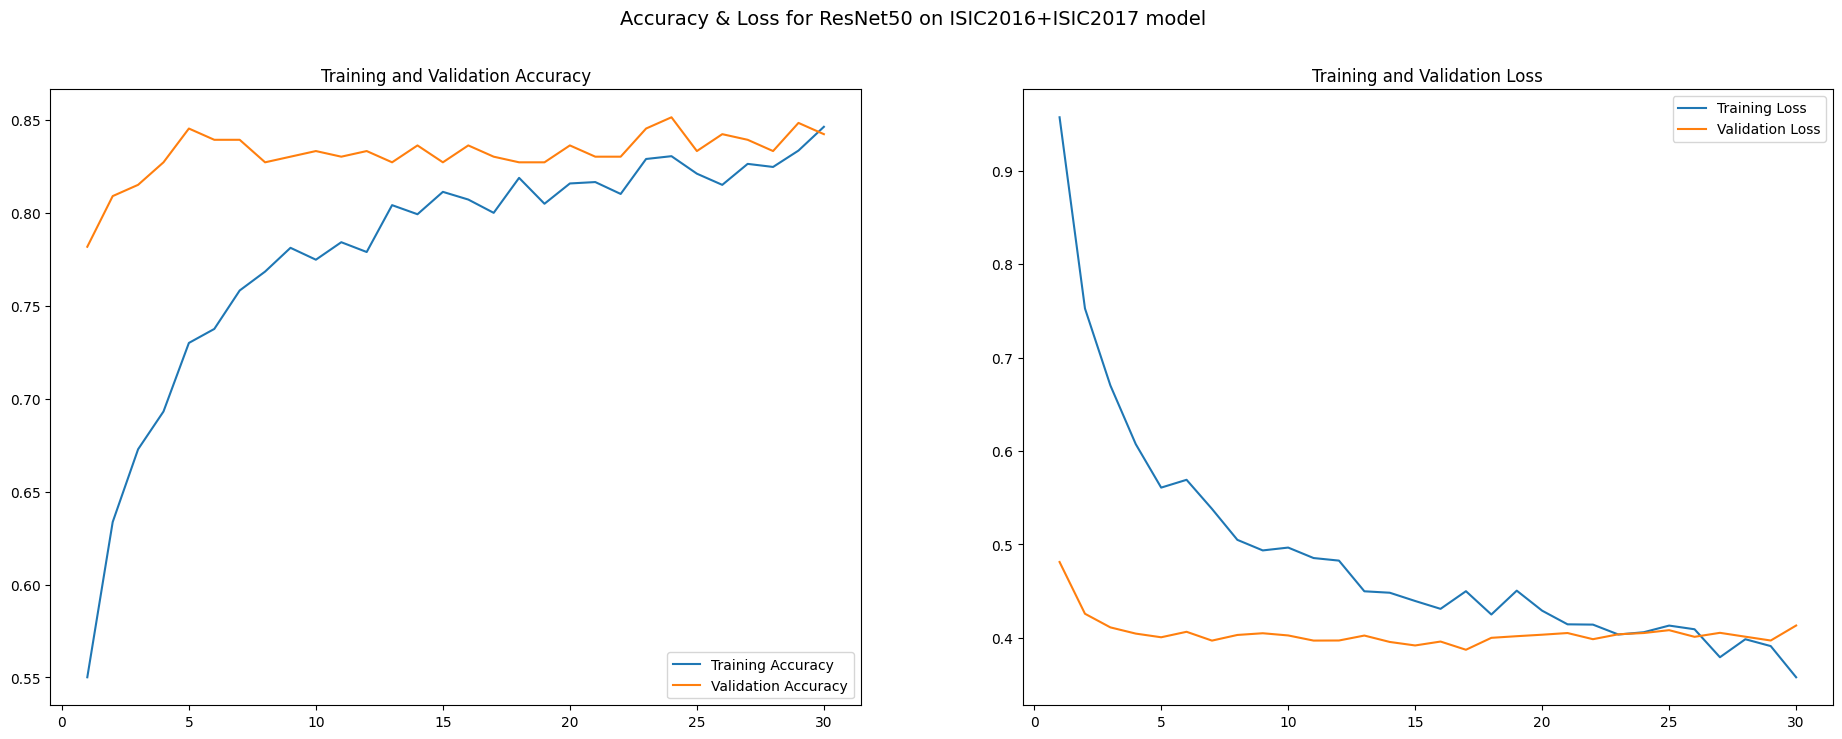

In [11]:
# training ISIC2016+ISIC2017
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2016_ISIC2017_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016+ISIC2017'
model = base_model.myresnet50()

# Train ISIC2016+ISIC2017
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer = mel.Visualizer()

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2016+ISIC2017 model...



52/52 [==============================] - 2s 23ms/step - loss: 0.7152 - accuracy: 0.6677
Train loss = 0.7151930332183838  ;  Train accuracy = 66.77%

32/32 [==============================] - 1s 22ms/step - loss: 0.7130 - accuracy: 0.6670
Validation loss = 0.7130009531974792  ;  Validation accuracy = 66.70%

21/21 [==============================] - 1s 25ms/step - loss: 0.7296 - accuracy: 0.6606
Test loss = 0.7295960187911987  ;  Test accuracy = 66.06%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2016+ISIC2017...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2016+ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.63      0.98      0.77       905
   Malignant       0.92      0.28      0.43       732

    accuracy                           0.67      1637
   macro avg       0.77      0.63      0.60      1637
weighted avg       0.76      0.67      0.62      1637

Test Report :
          

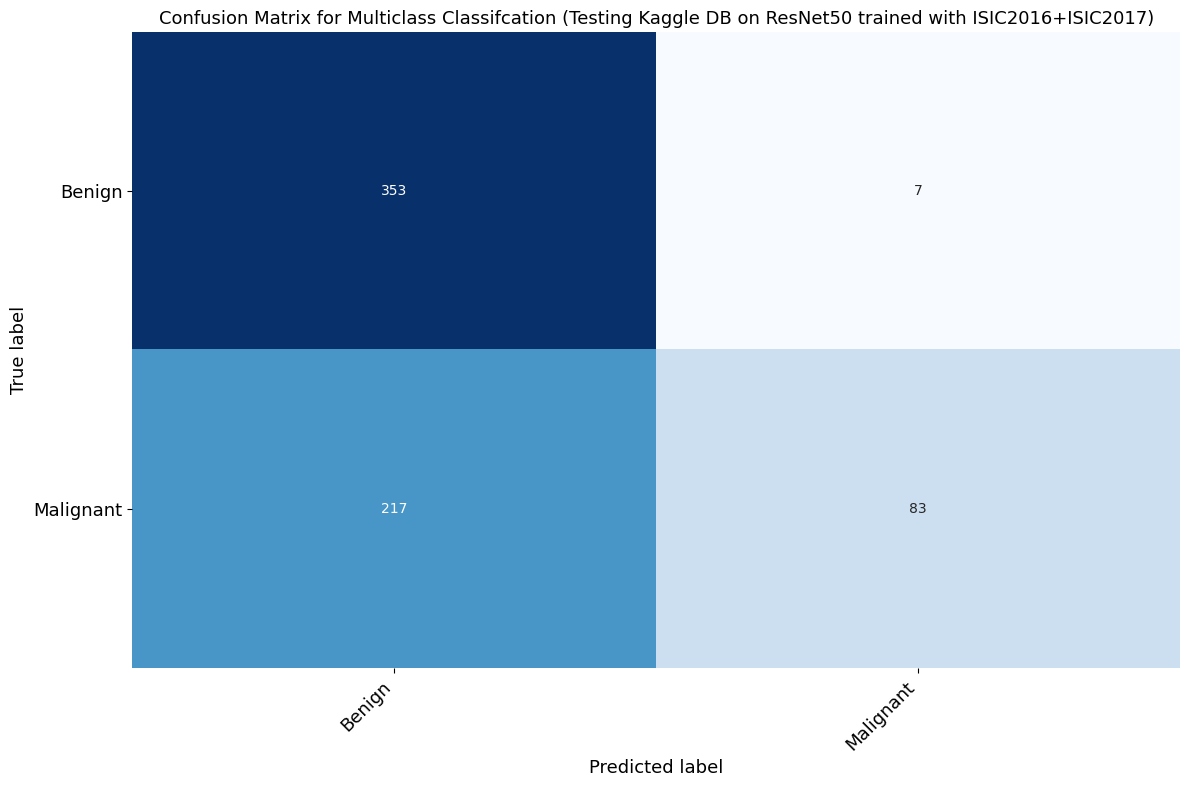

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2016+ISIC2017 model...



251/251 [==============================] - 7s 23ms/step - loss: 0.3856 - accuracy: 0.8458
Train loss = 0.3855600655078888  ;  Train accuracy = 84.58%

28/28 [==============================] - 1s 26ms/step - loss: 0.2559 - accuracy: 0.9264
Validation loss = 0.25593116879463196  ;  Validation accuracy = 92.64%

35/35 [==============================] - 1s 27ms/step - loss: 0.2557 - accuracy: 0.9166
Test loss = 0.2556696832180023  ;  Test accuracy = 91.66%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2016+ISIC2017...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2016+ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.90      0.93      0.91      6994
   Malignant       0.37      0.28      0.32      1035

    accuracy                           0.85      8029
   macro avg       0.63      0.60      0.62      8029
weighted avg       0.83      0.85      0.84      8029

Test Report :
         

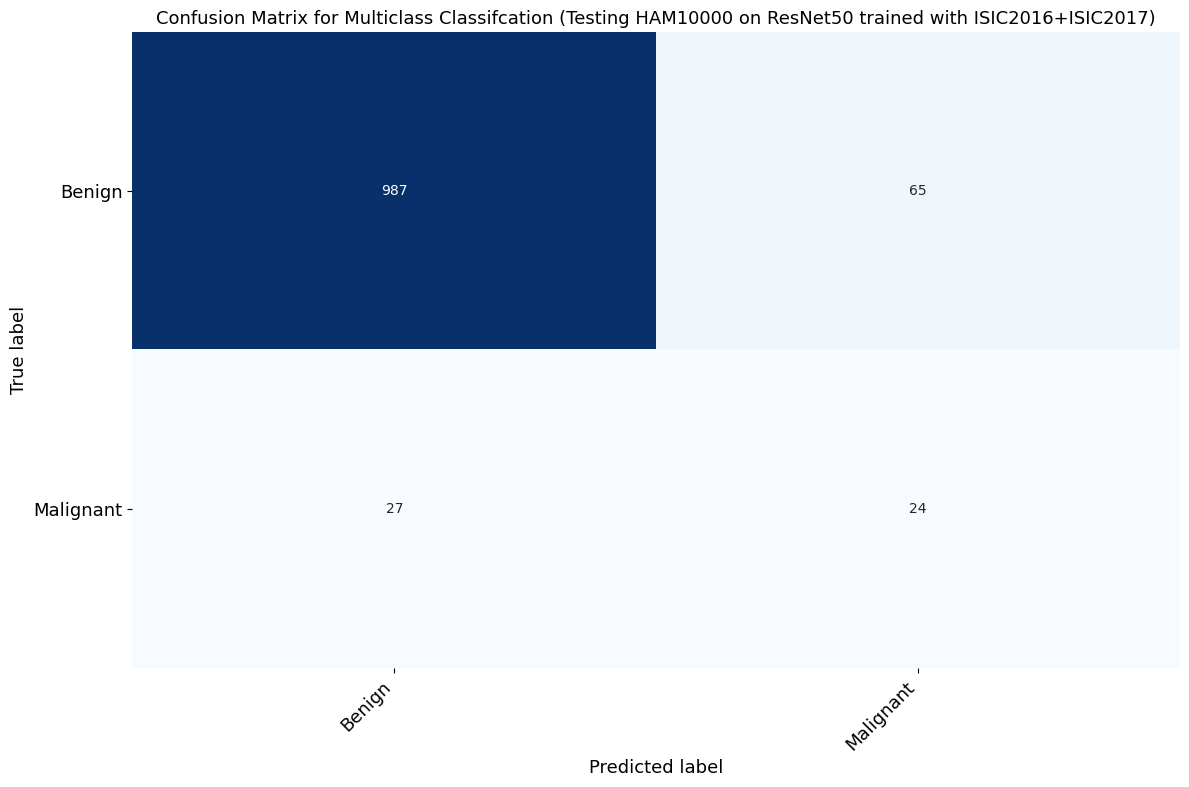

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2016+ISIC2017 model...



23/23 [==============================] - 1s 23ms/step - loss: 0.2953 - accuracy: 0.8694
Train loss = 0.2953076958656311  ;  Train accuracy = 86.94%

6/6 [==============================] - 0s 21ms/step - loss: 0.3348 - accuracy: 0.8444
Validation loss = 0.3347824513912201  ;  Validation accuracy = 84.44%

12/12 [==============================] - 0s 22ms/step - loss: 0.3278 - accuracy: 0.8760
Test loss = 0.32775744795799255  ;  Test accuracy = 87.60%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2016+ISIC2017...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2016+ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.88      0.97      0.92       583
   Malignant       0.79      0.43      0.56       137

    accuracy                           0.87       720
   macro avg       0.83      0.70      0.74       720
weighted avg       0.86      0.87      0.85       720

Test Report :
             

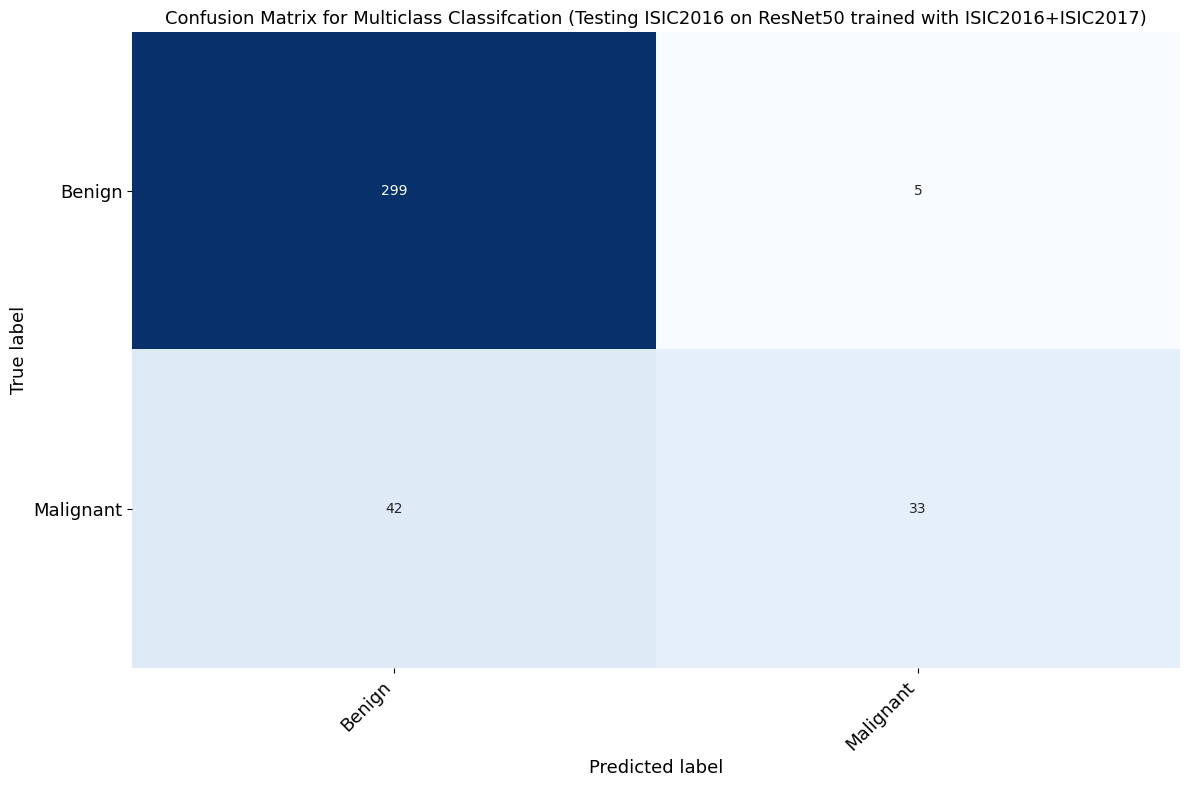

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2016+ISIC2017 model...



63/63 [==============================] - 3s 26ms/step - loss: 0.3392 - accuracy: 0.8560
Train loss = 0.3391518294811249  ;  Train accuracy = 85.60%

5/5 [==============================] - 0s 31ms/step - loss: 0.4501 - accuracy: 0.8133
Validation loss = 0.45007771253585815  ;  Validation accuracy = 81.33%

19/19 [==============================] - 1s 27ms/step - loss: 0.4440 - accuracy: 0.8067
Test loss = 0.4439970850944519  ;  Test accuracy = 80.67%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2016+ISIC2017...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2016+ISIC2017 model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.86      0.98      0.92      1626
   Malignant       0.78      0.32      0.45       374

    accuracy                           0.86      2000
   macro avg       0.82      0.65      0.68      2000
weighted avg       0.85      0.86      0.83      2000

Test Report :
             

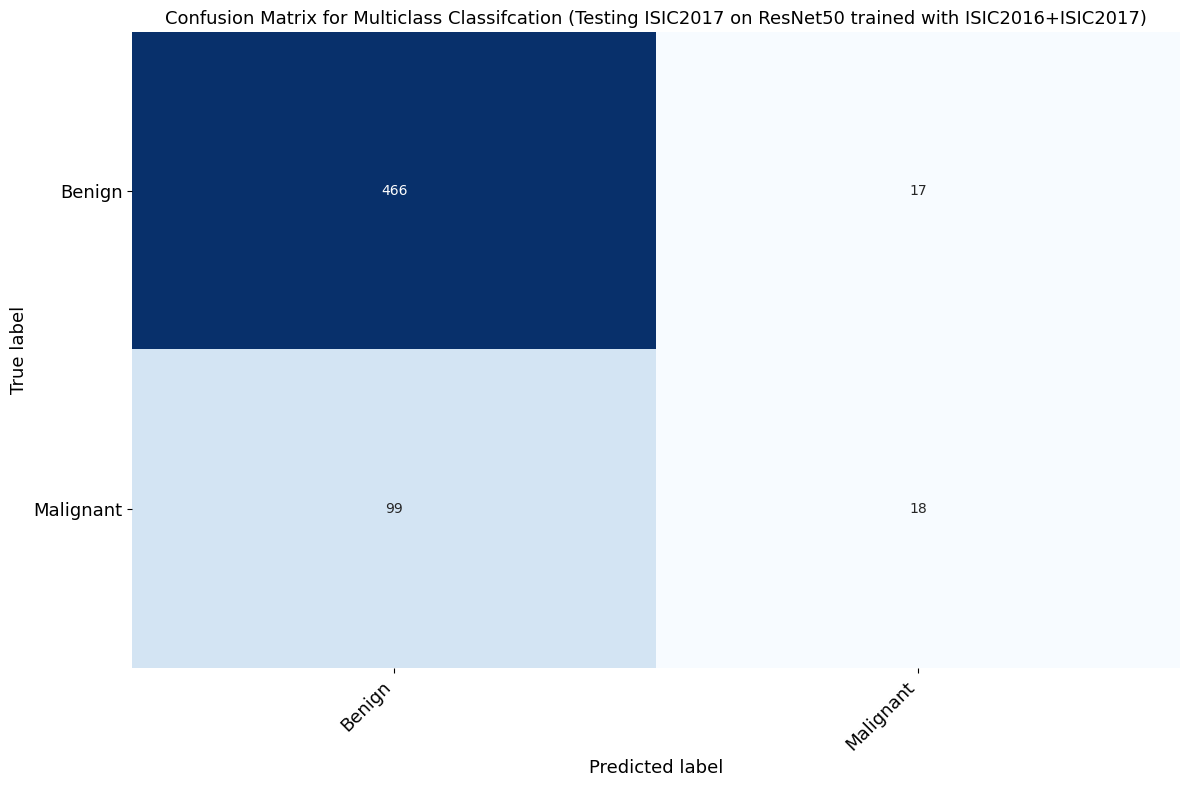

In [25]:
model_name = 'ResNet50 trained with ISIC2016+ISIC2017'
filename = 'ResNet50 on ISIC2016+ISIC2017.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
193/193 [==============================] - 104s 535ms/step - loss: 0.5011 - accuracy: 0.7677 - val_loss: 0.3977 - val_accuracy: 0.8016
Epoch 3/30
193/193 [==============================] - 103s 532ms/step - loss: 0.4599 - accuracy: 0.7913 - val_loss: 0.3751 - val_accuracy: 0.8134
Epoch 4/30
193/193 [==============================] - 104s 535ms/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.3762 - val_accuracy: 0.8161
Epoch 5/30
193/193 [==============================] - 103s 533ms/step - loss: 0.4194 - accuracy: 0.8120 - val_loss: 0.3569 - val_accuracy: 0.8211
Epoch 6/30
193/193 [==============================] - 104s 535ms/step - loss: 0.4079 - accuracy: 0.8206 - val_loss: 0.3440 - val_accuracy: 0.8278
Epoch 7/30
193/193 [==============================] - 104s 535ms/step - loss: 0.3938 - accuracy: 0.8252 - val_loss: 0.3339 - val_accuracy: 0.8360
Epoch 8/30
193/193 [==============================] - 104s 538ms/step - loss: 0.3833 - accuracy: 0.8256 - val_loss: 0.3466 -

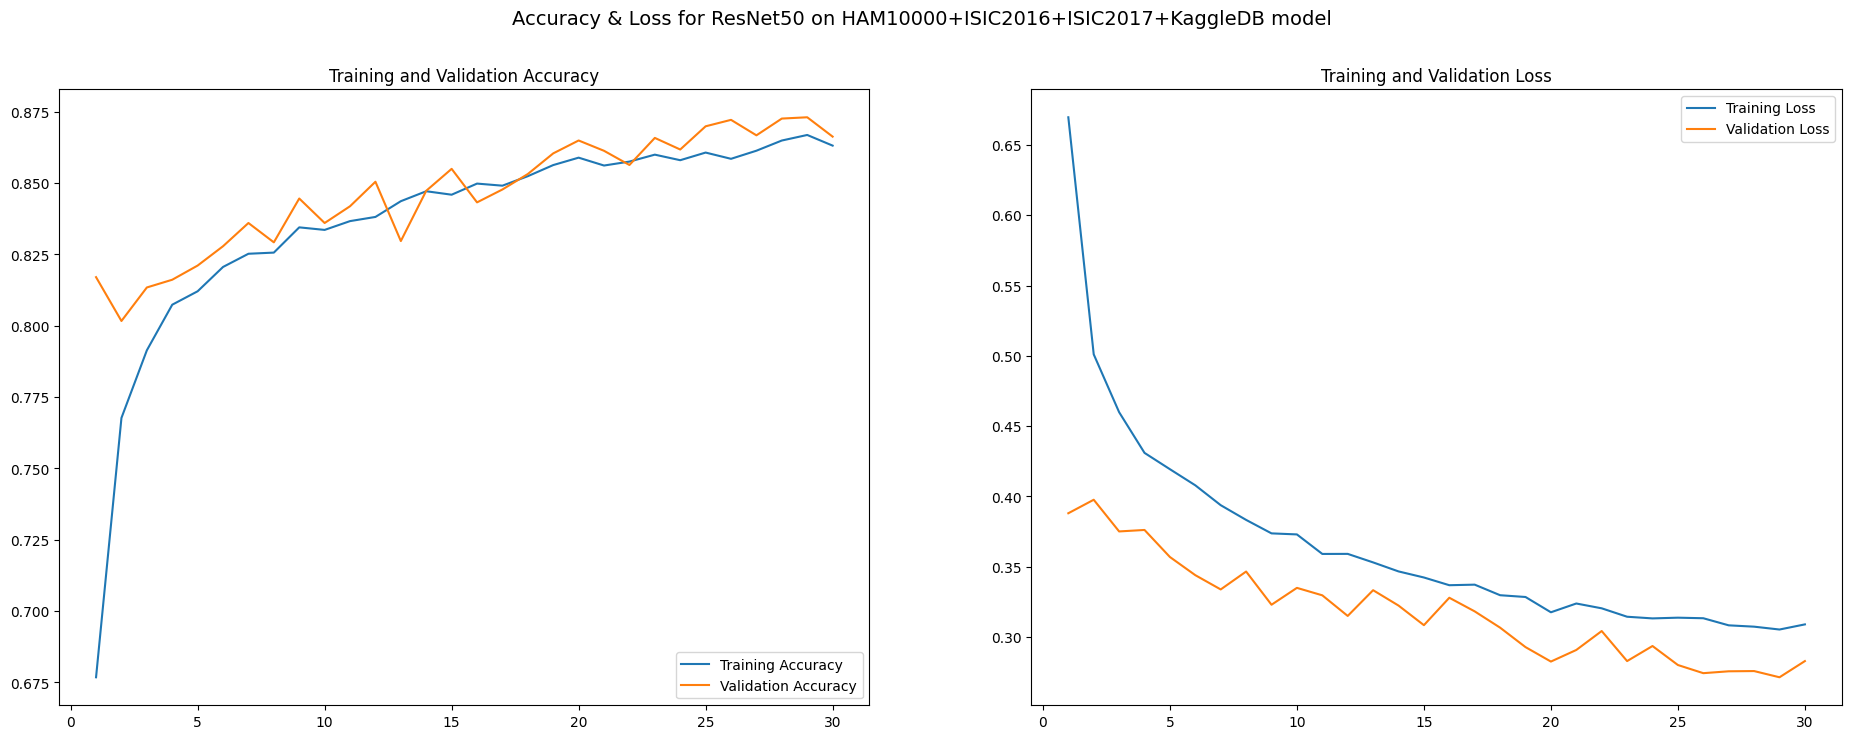

In [24]:
# training HAM10000 + ISIC2016 + ISIC2017 + KaggleDB
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'HAM10000_ISIC2016_ISIC2017_KaggleDB_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on HAM10000+ISIC2016+ISIC2017+KaggleDB'
model = base_model.myresnet50()

# Train HAM10000 + ISIC2016 +ISIC2017 + KaggleDB
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



52/52 [==============================] - 2s 23ms/step - loss: 0.3183 - accuracy: 0.8326
Train loss = 0.31833937764167786  ;  Train accuracy = 83.26%

32/32 [==============================] - 1s 22ms/step - loss: 0.3666 - accuracy: 0.8110
Validation loss = 0.36658382415771484  ;  Validation accuracy = 81.10%

21/21 [==============================] - 0s 22ms/step - loss: 0.3939 - accuracy: 0.8030
Test loss = 0.39385196566581726  ;  Test accuracy = 80.30%
Computing predictions for Testing Kaggle DB on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB...
Model report for Testing Kaggle DB on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.78      0.98      0.87       905
   Malignant       0.96      0.65      0.78       732

    accuracy                           0.83      1637
   macro avg       0.87      0.82      0.82      1637
weighted avg       0.86      0.83      0

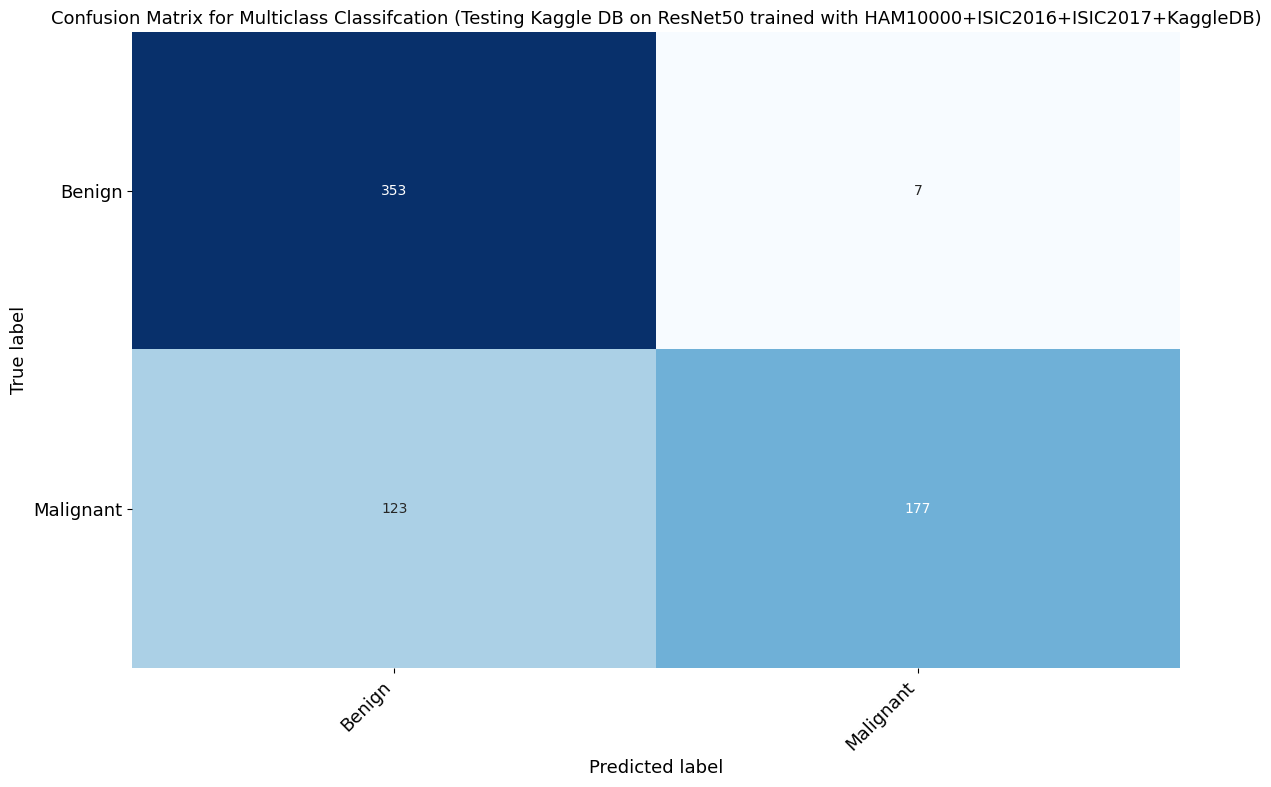

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



251/251 [==============================] - 7s 24ms/step - loss: 0.2386 - accuracy: 0.8985
Train loss = 0.23864266276359558  ;  Train accuracy = 89.85%

28/28 [==============================] - 1s 23ms/step - loss: 0.1252 - accuracy: 0.9558
Validation loss = 0.12519237399101257  ;  Validation accuracy = 95.58%

35/35 [==============================] - 1s 22ms/step - loss: 0.1154 - accuracy: 0.9601
Test loss = 0.1154148057103157  ;  Test accuracy = 96.01%
Computing predictions for Testing HAM10000 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB...
Model report for Testing HAM10000 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.93      0.96      0.94      6994
   Malignant       0.64      0.48      0.55      1035

    accuracy                           0.90      8029
   macro avg       0.78      0.72      0.75      8029
weighted avg       0.89      0.90      0.

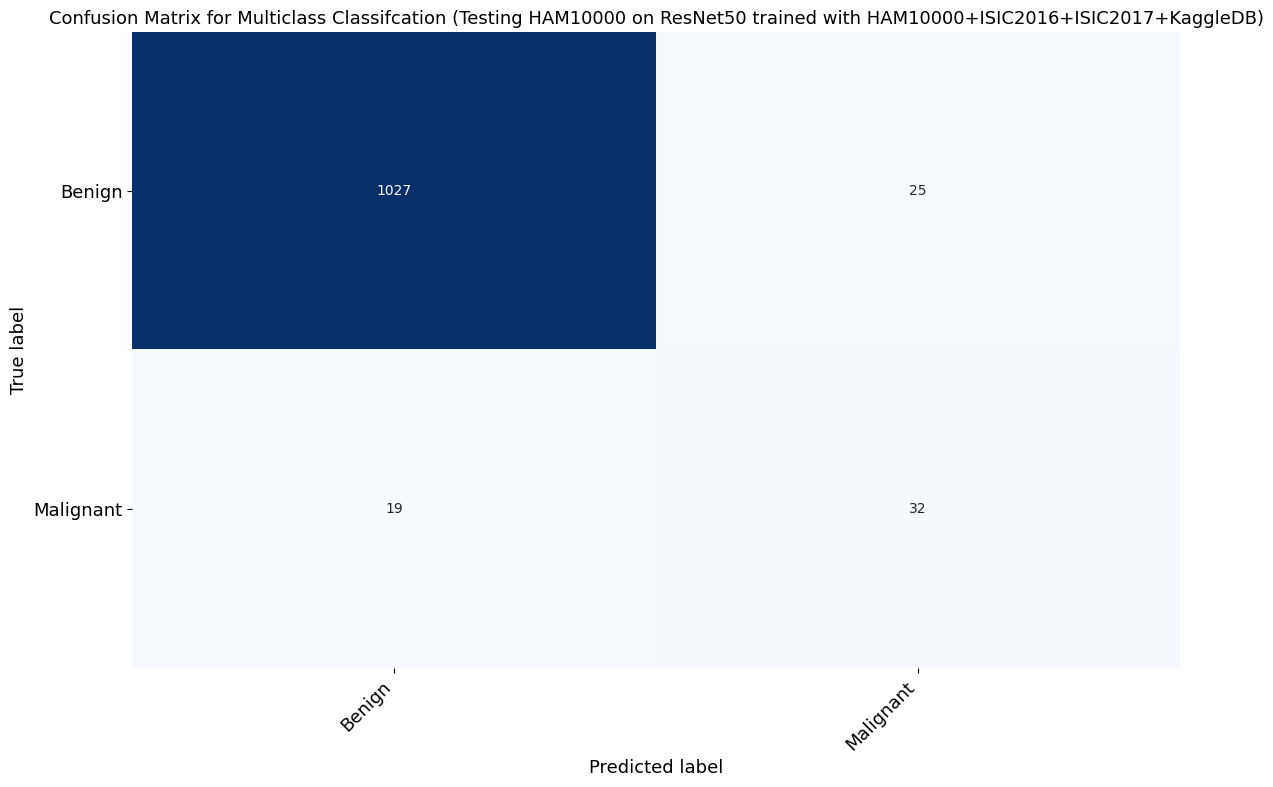

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



23/23 [==============================] - 1s 24ms/step - loss: 0.3054 - accuracy: 0.8625
Train loss = 0.3054461181163788  ;  Train accuracy = 86.25%

6/6 [==============================] - 0s 21ms/step - loss: 0.3305 - accuracy: 0.8722
Validation loss = 0.330492228269577  ;  Validation accuracy = 87.22%

12/12 [==============================] - 0s 22ms/step - loss: 0.3358 - accuracy: 0.8628
Test loss = 0.335827499628067  ;  Test accuracy = 86.28%
Computing predictions for Testing ISIC2016 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB...
Model report for Testing ISIC2016 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.88      0.96      0.92       583
   Malignant       0.73      0.44      0.55       137

    accuracy                           0.86       720
   macro avg       0.81      0.70      0.73       720
weighted avg       0.85      0.86      0.85      

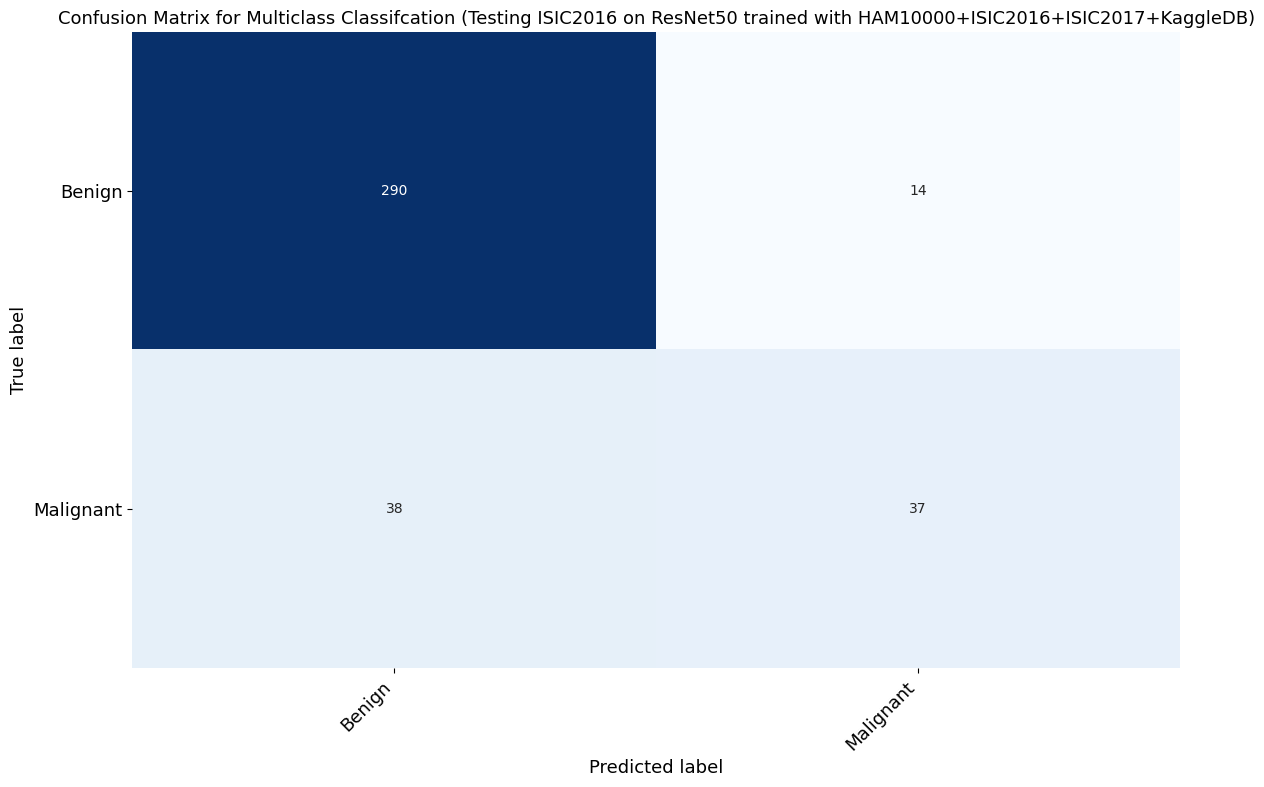

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model...



63/63 [==============================] - 2s 25ms/step - loss: 0.3404 - accuracy: 0.8515
Train loss = 0.3404148519039154  ;  Train accuracy = 85.15%

5/5 [==============================] - 0s 21ms/step - loss: 0.4251 - accuracy: 0.8000
Validation loss = 0.42511099576950073  ;  Validation accuracy = 80.00%

19/19 [==============================] - 0s 22ms/step - loss: 0.5179 - accuracy: 0.7783
Test loss = 0.5178558230400085  ;  Test accuracy = 77.83%
Computing predictions for Testing ISIC2017 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB...
Model report for Testing ISIC2017 on ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.88      0.94      0.91      1626
   Malignant       0.65      0.45      0.53       374

    accuracy                           0.85      2000
   macro avg       0.77      0.70      0.72      2000
weighted avg       0.84      0.85      0.84   

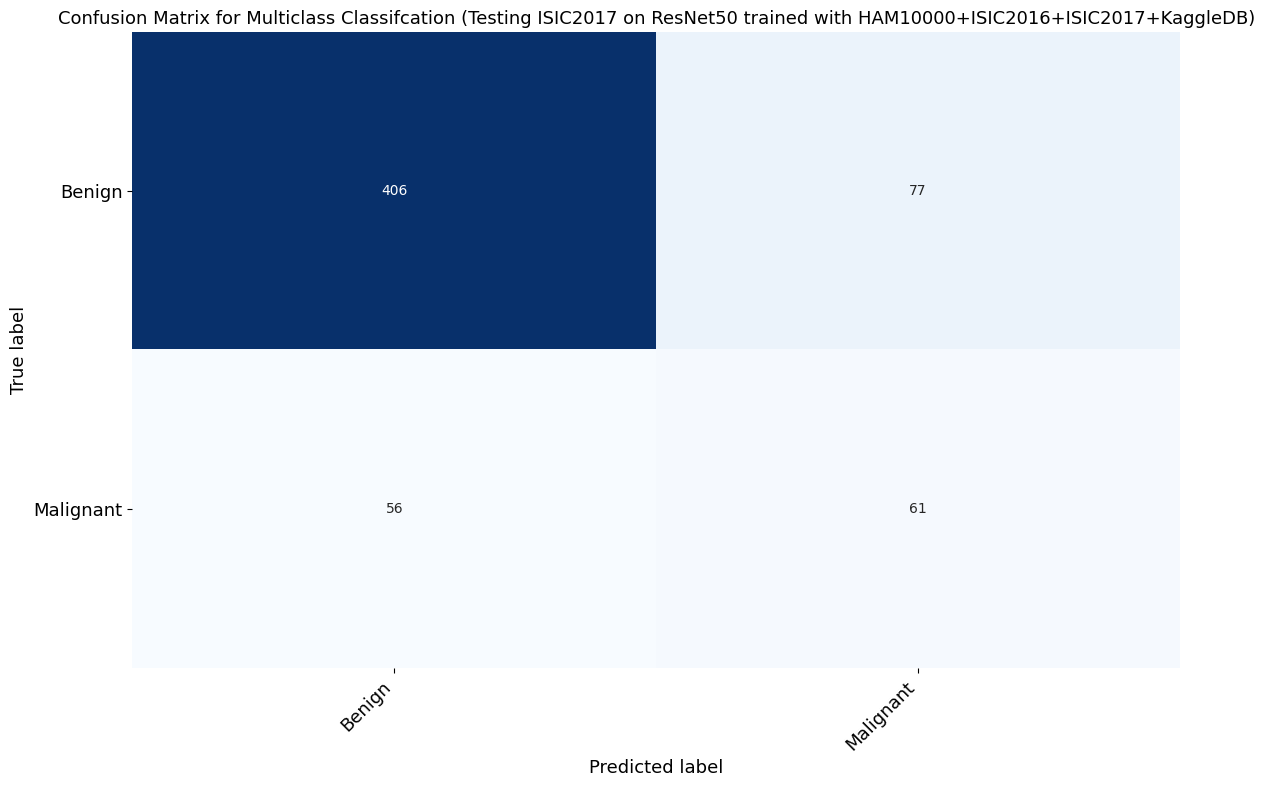

In [26]:
model_name = 'ResNet50 trained with HAM10000+ISIC2016+ISIC2017+KaggleDB'
filename = 'ResNet50 on HAM10000+ISIC2016+ISIC2017+KaggleDB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)              

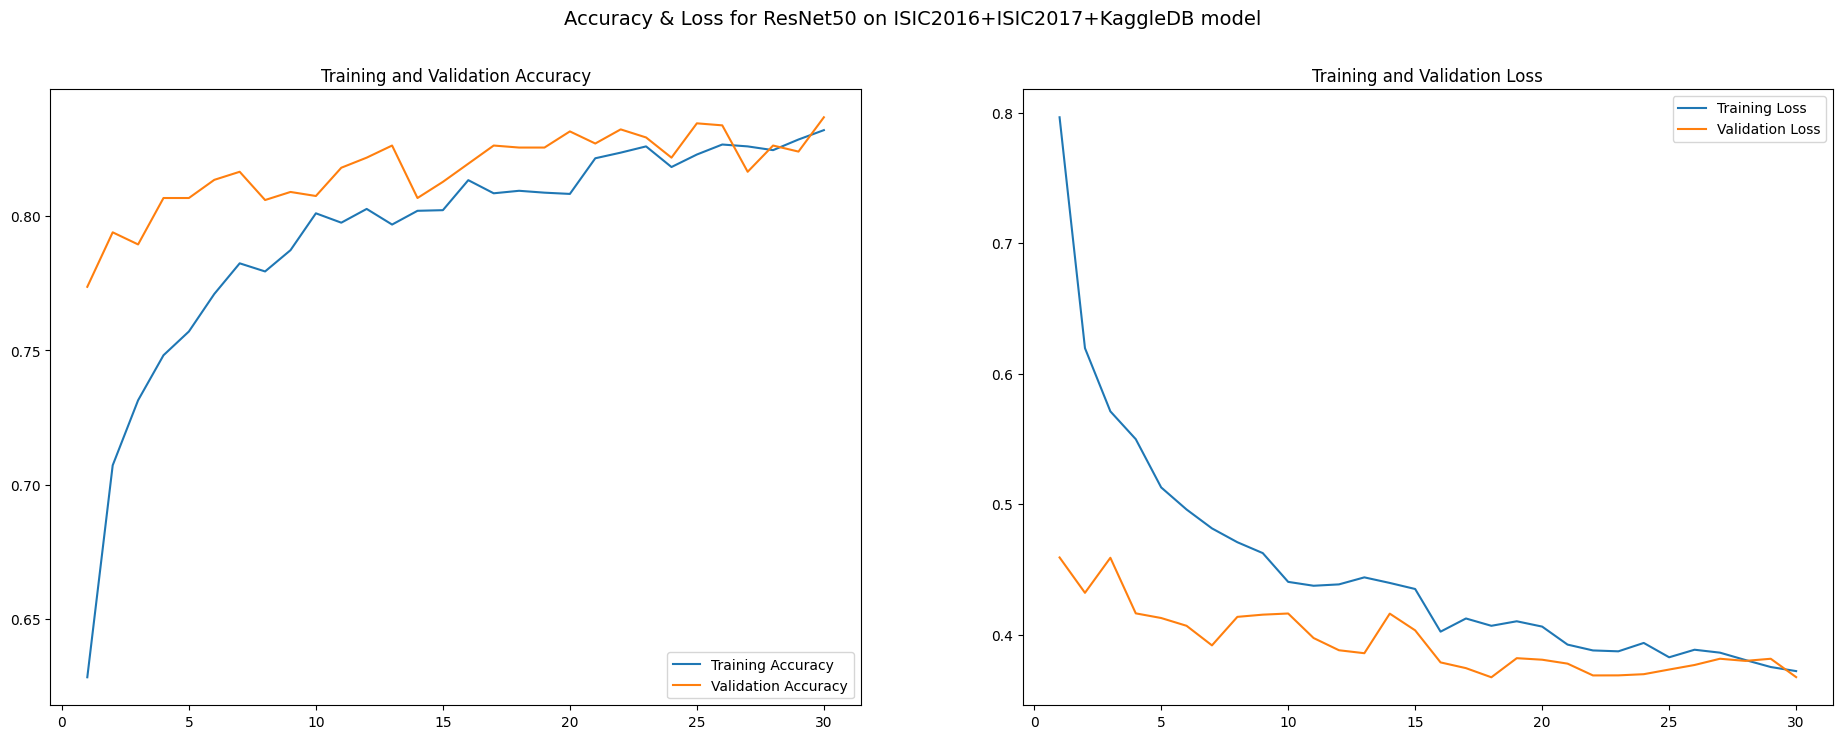

In [26]:
# training ISIC2016 + ISIC2017 + KaggleDB
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2016_ISIC2017_KaggleDB_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016+ISIC2017+KaggleDB'
model = base_model.myresnet50()

# Train ISIC2016 +ISIC2017 + KaggleDB
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB model...



52/52 [==============================] - 3s 29ms/step - loss: 0.3132 - accuracy: 0.8467
Train loss = 0.3132331669330597  ;  Train accuracy = 84.67%

32/32 [==============================] - 1s 26ms/step - loss: 0.3517 - accuracy: 0.8310
Validation loss = 0.3516538441181183  ;  Validation accuracy = 83.10%

21/21 [==============================] - 1s 26ms/step - loss: 0.3915 - accuracy: 0.8061
Test loss = 0.3915494978427887  ;  Test accuracy = 80.61%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.83      0.91      0.87       905
   Malignant       0.88      0.76      0.82       732

    accuracy                           0.85      1637
   macro avg       0.85      0.84      0.84      1637
weighted avg       0.85      0.85      0.85      1637

Test R

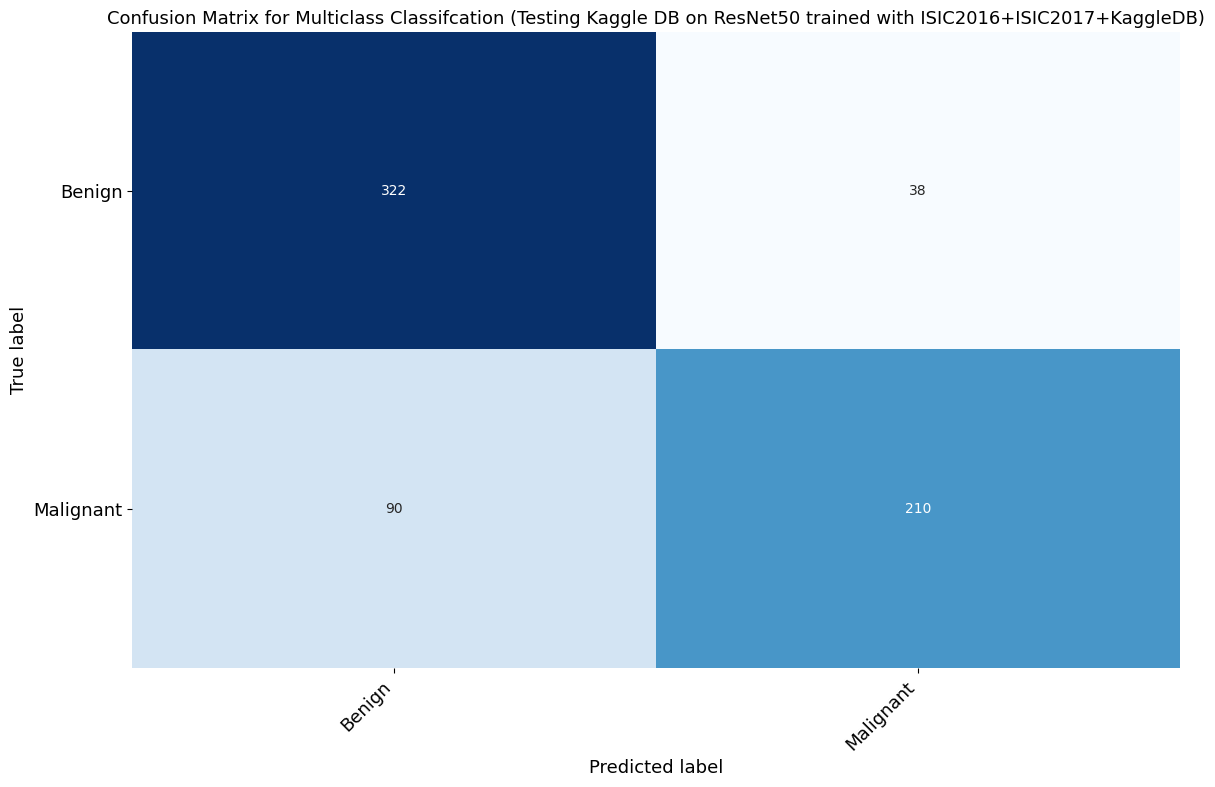

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB model...



251/251 [==============================] - 7s 24ms/step - loss: 0.5177 - accuracy: 0.7408
Train loss = 0.5177480578422546  ;  Train accuracy = 74.08%

28/28 [==============================] - 1s 22ms/step - loss: 0.3113 - accuracy: 0.8584
Validation loss = 0.3113429844379425  ;  Validation accuracy = 85.84%

35/35 [==============================] - 1s 23ms/step - loss: 0.3128 - accuracy: 0.8758
Test loss = 0.31277576088905334  ;  Test accuracy = 87.58%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      0.74      0.83      6994
   Malignant       0.30      0.74      0.42      1035

    accuracy                           0.74      8029
   macro avg       0.62      0.74      0.63      8029
weighted avg       0.87      0.74      0.78      8029

Test 

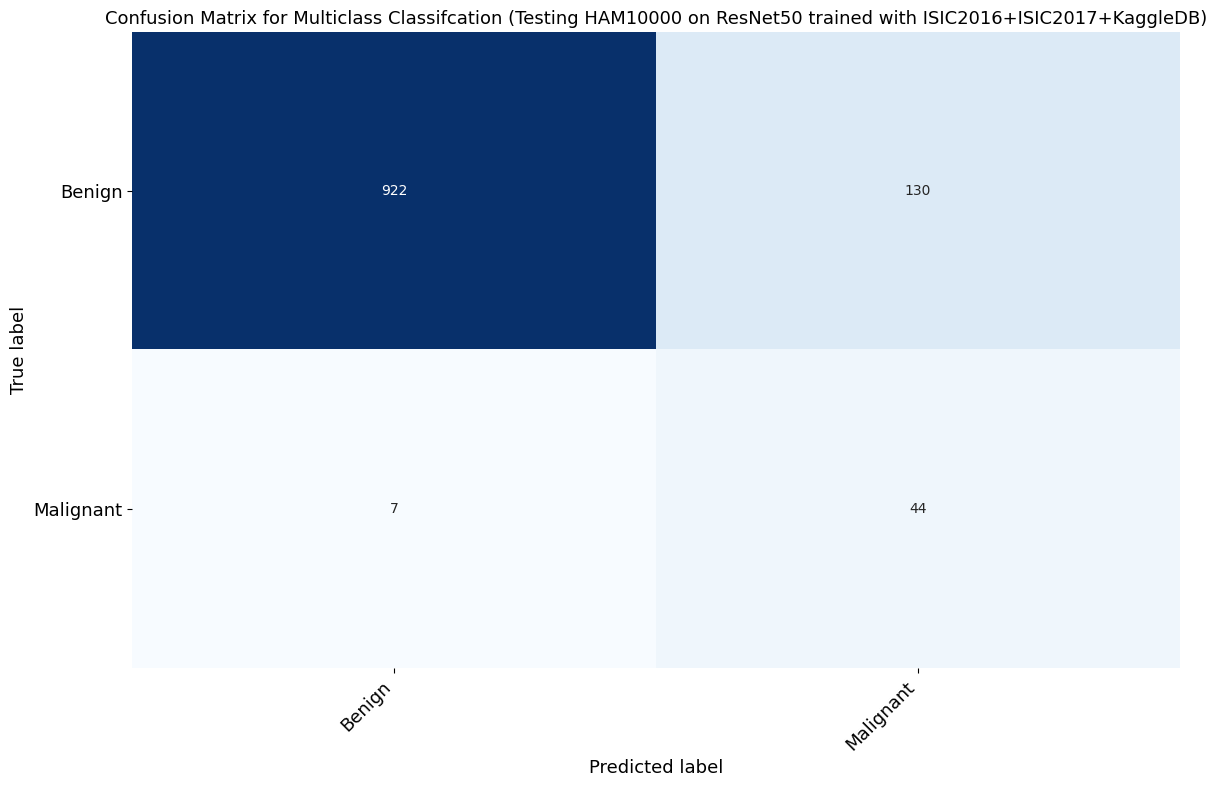

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB model...



23/23 [==============================] - 1s 24ms/step - loss: 0.3339 - accuracy: 0.8583
Train loss = 0.33392569422721863  ;  Train accuracy = 85.83%

6/6 [==============================] - 0s 21ms/step - loss: 0.3629 - accuracy: 0.8333
Validation loss = 0.36287450790405273  ;  Validation accuracy = 83.33%

12/12 [==============================] - 0s 27ms/step - loss: 0.3678 - accuracy: 0.8470
Test loss = 0.3678377866744995  ;  Test accuracy = 84.70%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.91      0.91      0.91       583
   Malignant       0.63      0.64      0.63       137

    accuracy                           0.86       720
   macro avg       0.77      0.77      0.77       720
weighted avg       0.86      0.86      0.86       720

Test Rep

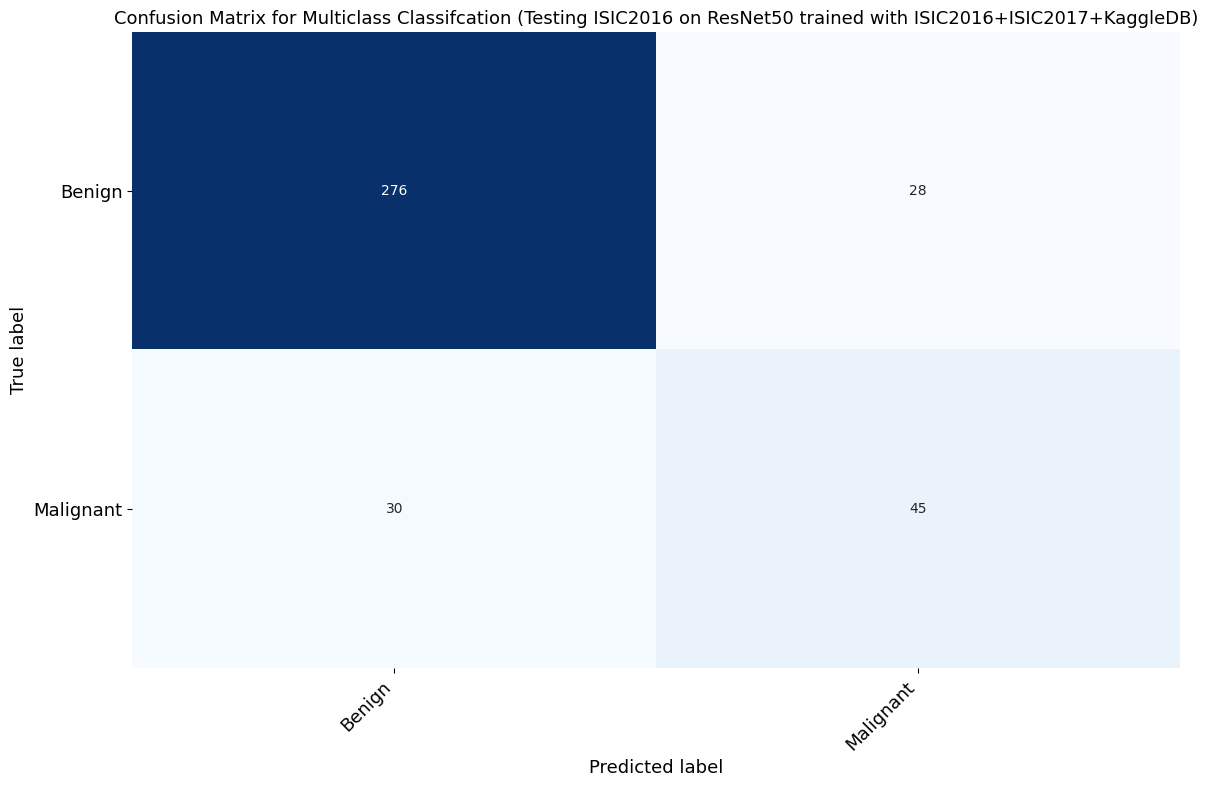

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB model...



63/63 [==============================] - 2s 23ms/step - loss: 0.3639 - accuracy: 0.8470
Train loss = 0.3639407753944397  ;  Train accuracy = 84.70%

5/5 [==============================] - 0s 21ms/step - loss: 0.4756 - accuracy: 0.7800
Validation loss = 0.4756240248680115  ;  Validation accuracy = 78.00%

19/19 [==============================] - 0s 23ms/step - loss: 0.5203 - accuracy: 0.7500
Test loss = 0.5203163027763367  ;  Test accuracy = 75.00%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2016+ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.90      0.92      0.91      1626
   Malignant       0.60      0.53      0.57       374

    accuracy                           0.85      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Test Repor

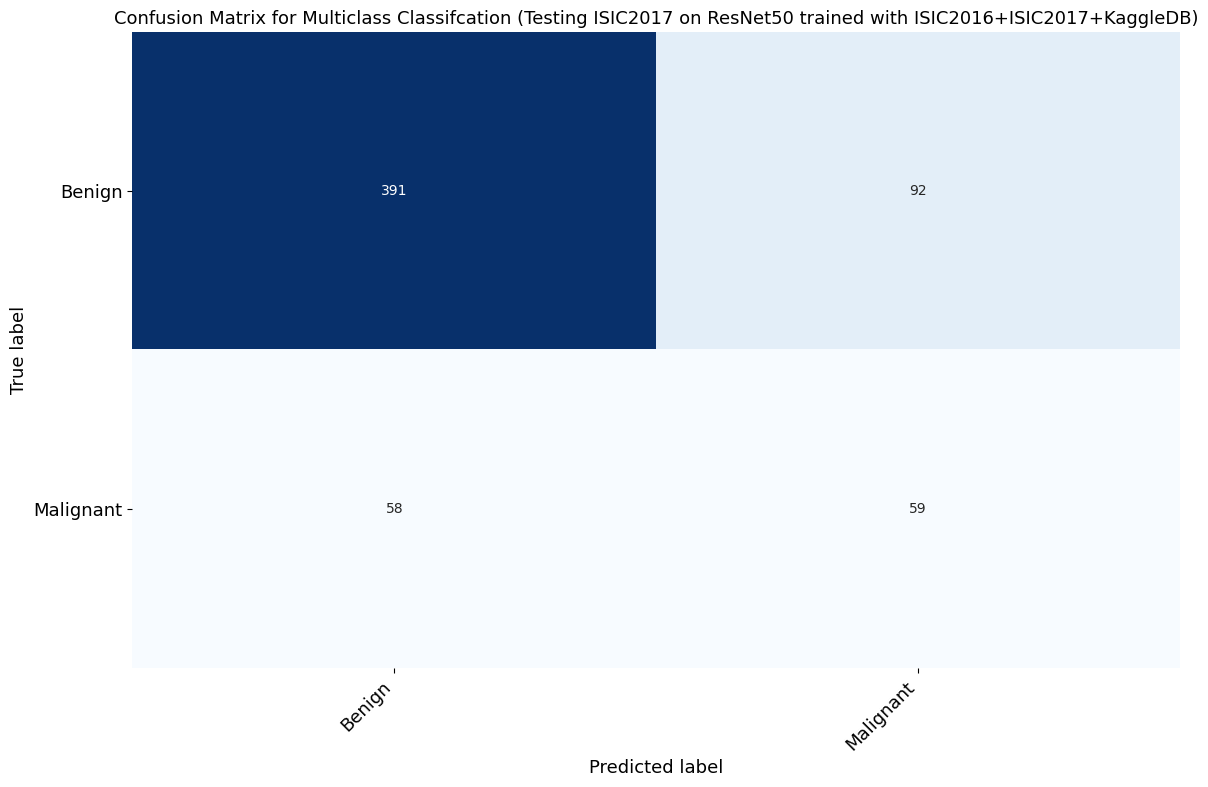

In [27]:
model_name = 'ResNet50 trained with ISIC2016+ISIC2017+KaggleDB'
filename = 'ResNet50 on ISIC2016+ISIC2017+KaggleDB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)              

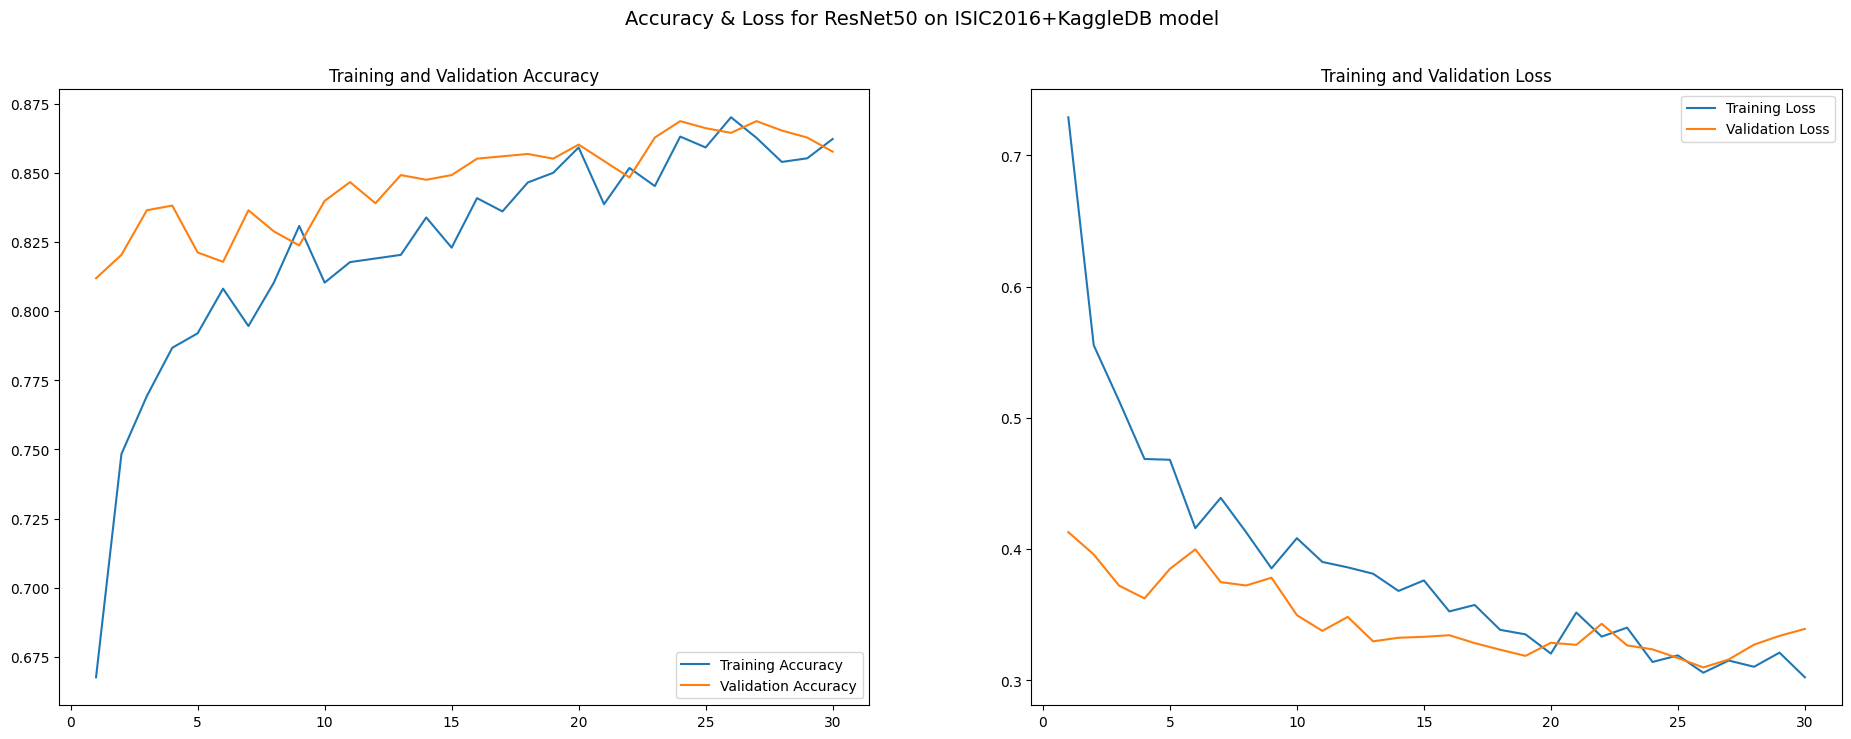

In [28]:
# training ISIC2016 + KaggleDB
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2016_KaggleDB_224h_224w.pkl')
# HAM10000_ISIC2016_ISIC2017_224h_224w.pkl

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2016+KaggleDB'
model = base_model.myresnet50()

# Train ISIC2016 +ISIC2017 + KaggleDB
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2016+KaggleDB model...



52/52 [==============================] - 2s 24ms/step - loss: 0.2094 - accuracy: 0.9035
Train loss = 0.20941801369190216  ;  Train accuracy = 90.35%

32/32 [==============================] - 1s 22ms/step - loss: 0.2816 - accuracy: 0.8750
Validation loss = 0.2815611958503723  ;  Validation accuracy = 87.50%

21/21 [==============================] - 0s 22ms/step - loss: 0.3094 - accuracy: 0.8576
Test loss = 0.30941563844680786  ;  Test accuracy = 85.76%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2016+KaggleDB...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2016+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.89      0.94      0.92       905
   Malignant       0.92      0.86      0.89       732

    accuracy                           0.90      1637
   macro avg       0.91      0.90      0.90      1637
weighted avg       0.90      0.90      0.90      1637

Test Report :
        

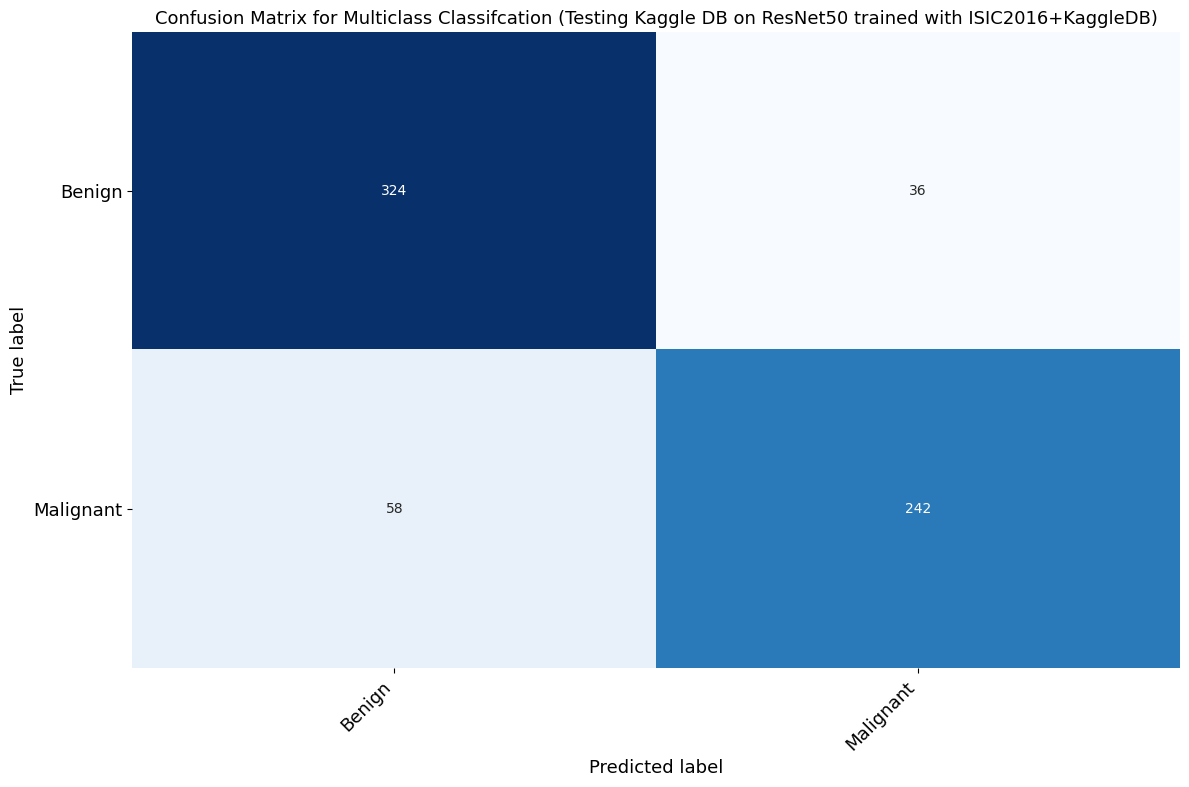

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2016+KaggleDB model...



251/251 [==============================] - 6s 23ms/step - loss: 0.5276 - accuracy: 0.7594
Train loss = 0.5275675058364868  ;  Train accuracy = 75.94%

28/28 [==============================] - 1s 24ms/step - loss: 0.2729 - accuracy: 0.8822
Validation loss = 0.2728902995586395  ;  Validation accuracy = 88.22%

35/35 [==============================] - 1s 28ms/step - loss: 0.2858 - accuracy: 0.8794
Test loss = 0.2858212888240814  ;  Test accuracy = 87.94%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2016+KaggleDB...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2016+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.95      0.76      0.85      6994
   Malignant       0.31      0.73      0.44      1035

    accuracy                           0.76      8029
   macro avg       0.63      0.75      0.64      8029
weighted avg       0.87      0.76      0.79      8029

Test Report :
          

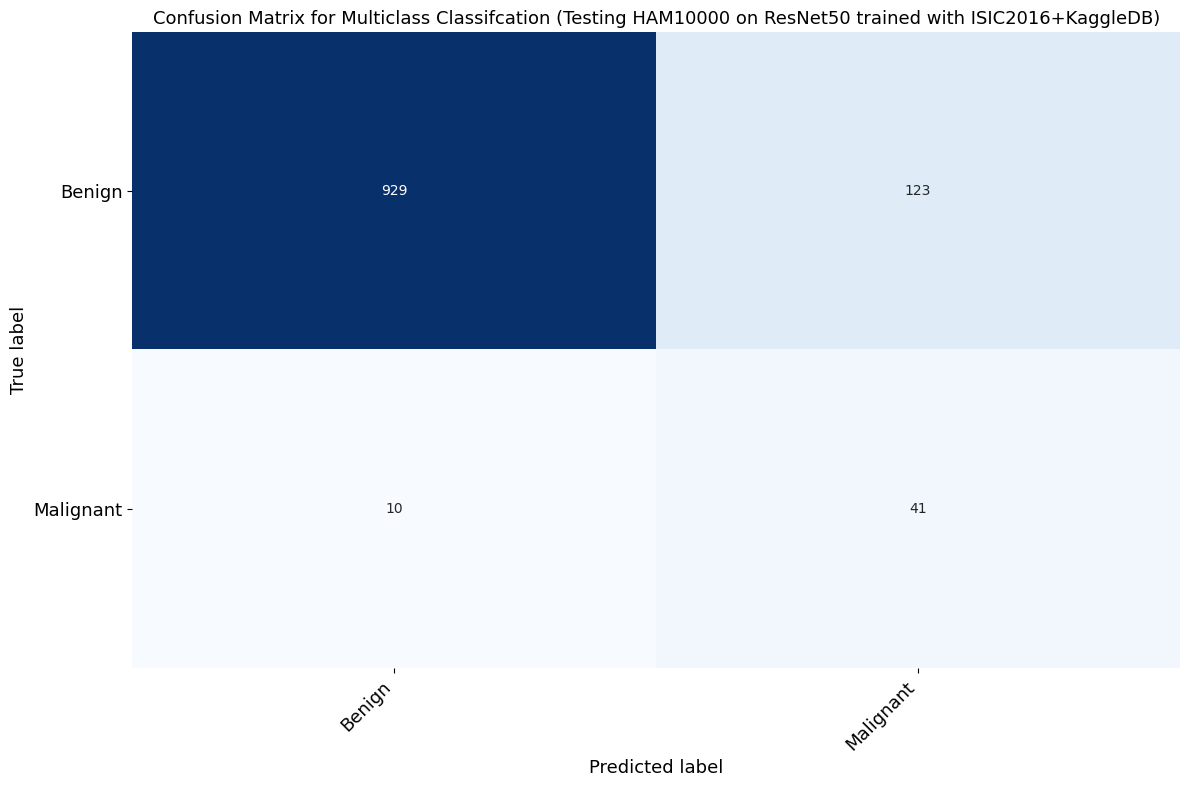

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2016+KaggleDB model...



23/23 [==============================] - 1s 29ms/step - loss: 0.3144 - accuracy: 0.8681
Train loss = 0.3143790364265442  ;  Train accuracy = 86.81%

6/6 [==============================] - 0s 25ms/step - loss: 0.4670 - accuracy: 0.8000
Validation loss = 0.4669921100139618  ;  Validation accuracy = 80.00%

12/12 [==============================] - 0s 22ms/step - loss: 0.4213 - accuracy: 0.8338
Test loss = 0.4212524890899658  ;  Test accuracy = 83.38%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2016+KaggleDB...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2016+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.89      0.95      0.92       583
   Malignant       0.71      0.53      0.60       137

    accuracy                           0.87       720
   macro avg       0.80      0.74      0.76       720
weighted avg       0.86      0.87      0.86       720

Test Report :
              

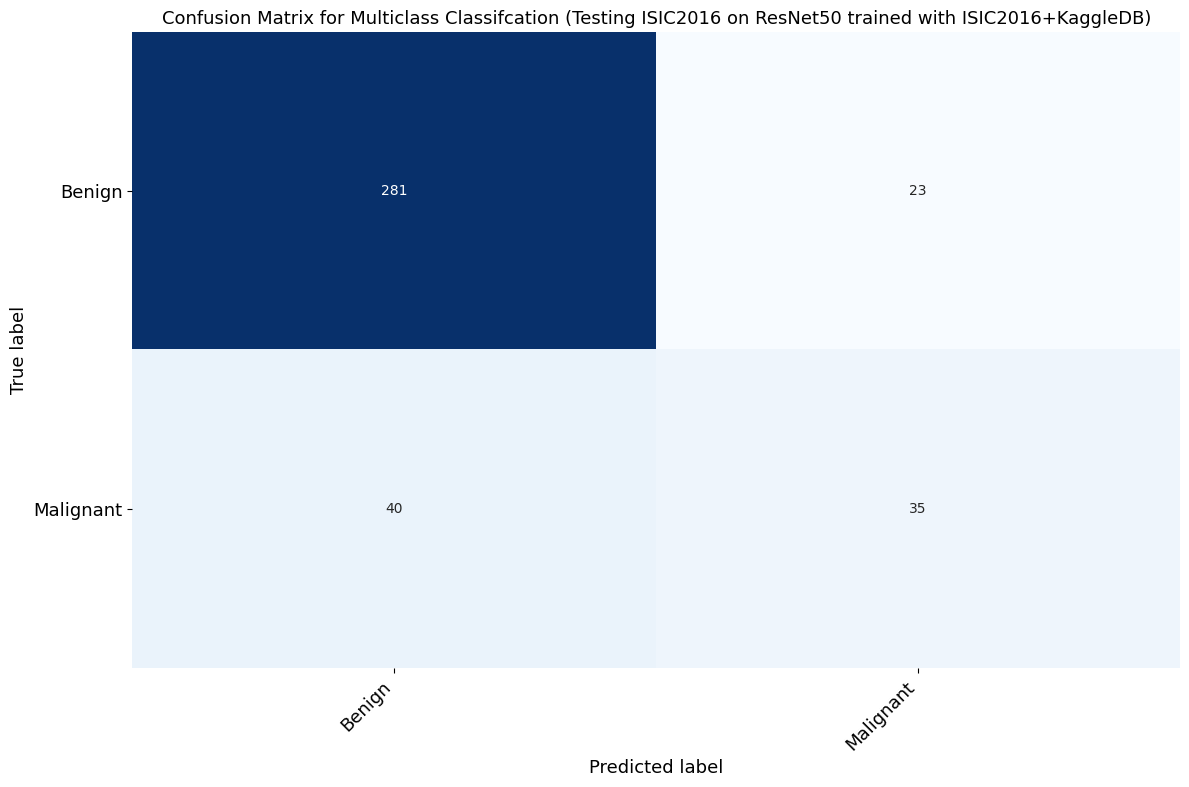

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2016+KaggleDB model...



63/63 [==============================] - 3s 23ms/step - loss: 1.1191 - accuracy: 0.6350
Train loss = 1.119110345840454  ;  Train accuracy = 63.50%

5/5 [==============================] - 0s 21ms/step - loss: 1.3985 - accuracy: 0.5533
Validation loss = 1.3984662294387817  ;  Validation accuracy = 55.33%

19/19 [==============================] - 0s 25ms/step - loss: 1.5106 - accuracy: 0.5017
Test loss = 1.5106326341629028  ;  Test accuracy = 50.17%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2016+KaggleDB...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2016+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.89      0.63      0.74      1626
   Malignant       0.29      0.68      0.41       374

    accuracy                           0.64      2000
   macro avg       0.59      0.65      0.57      2000
weighted avg       0.78      0.64      0.67      2000

Test Report :
               

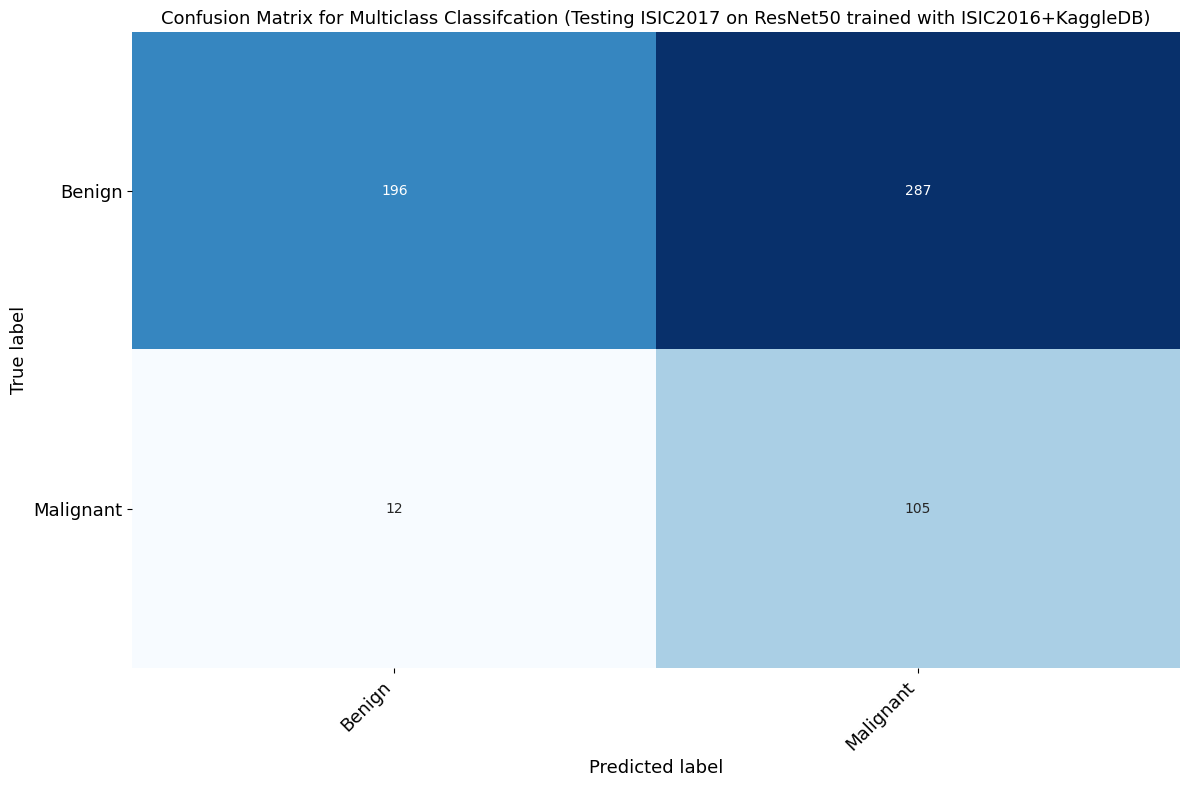

In [28]:
model_name = 'ResNet50 trained with ISIC2016+KaggleDB'
filename = 'ResNet50 on ISIC2016+KaggleDB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)              

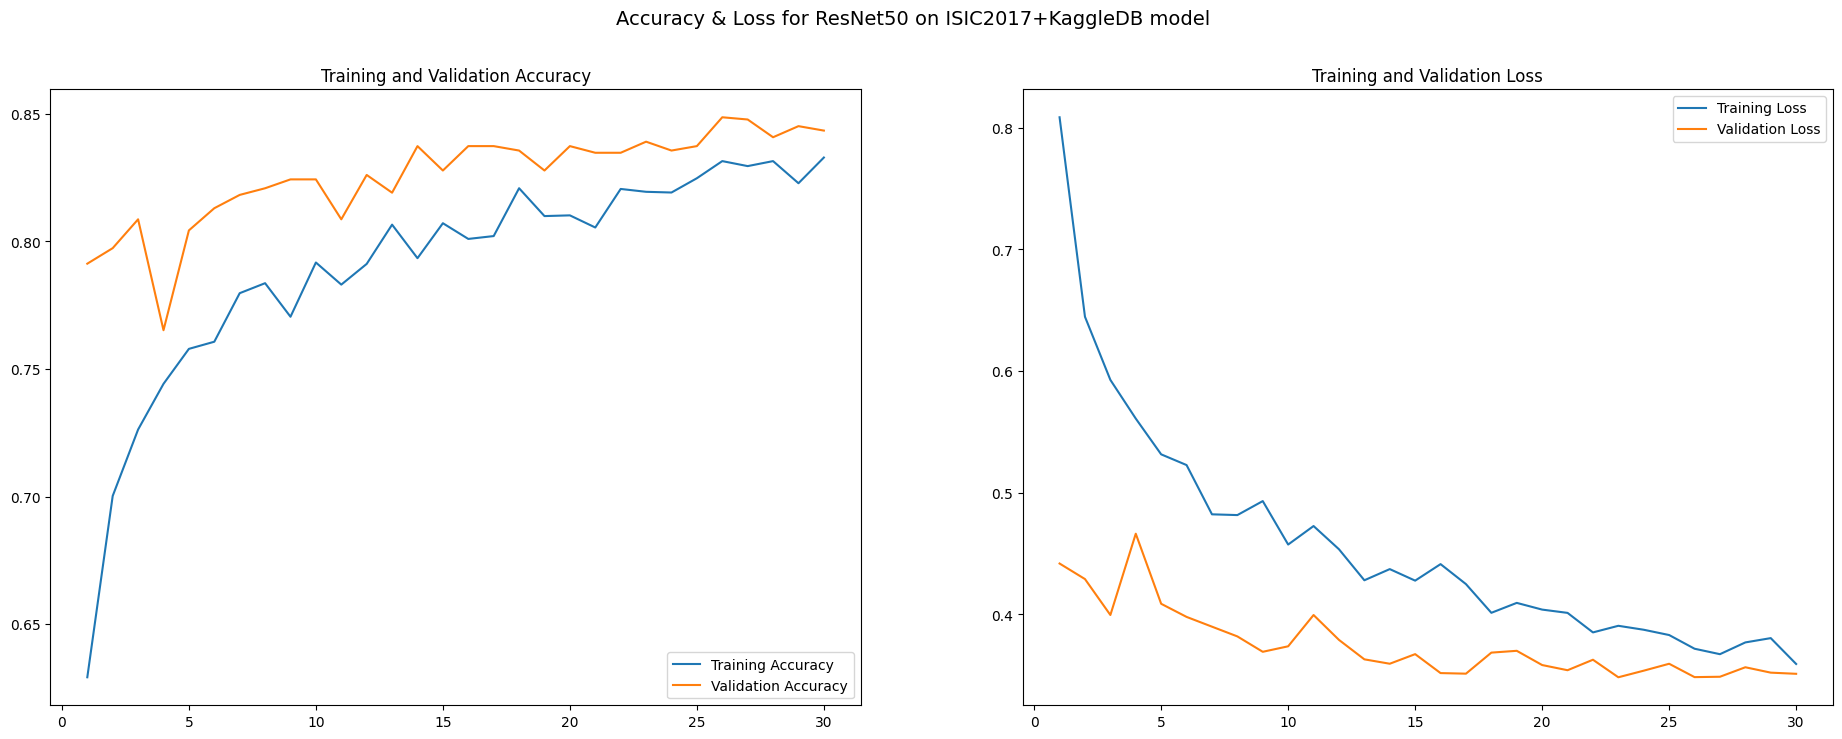

In [31]:
# training ISIC2017 + KaggleDB
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
add_augmentation = {'ROTATION_RANGE':90.0, 'ZOOM_RANGE':0.1, 'HSHIFT_RANGE':0.1, 'WSHIFT_RANGE':0.1}
CFG.update(add_augmentation)

trainimages, testimages, validationimages, \
			trainlabels, testlabels, validationlabels, num_classes_binary\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+'ISIC2017_KaggleDB_224h_224w.pkl')

base_model = mel.CNN(CFG=CFG)
model_name = 'ResNet50 on ISIC2017+KaggleDB'
model = base_model.myresnet50()

# Train ISIC2017 + KaggleDB
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages,
    trainlabels = trainlabels,
    validationimages = validationimages,
    validationlabels = validationlabels,
)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

Testing on Kaggle DB
Evaluating Testing Kaggle DB on ResNet50 trained with ISIC2017+KaggleDB model...



52/52 [==============================] - 2s 23ms/step - loss: 0.2791 - accuracy: 0.8711
Train loss = 0.27906161546707153  ;  Train accuracy = 87.11%

32/32 [==============================] - 1s 22ms/step - loss: 0.3353 - accuracy: 0.8460
Validation loss = 0.33532047271728516  ;  Validation accuracy = 84.60%

21/21 [==============================] - 0s 22ms/step - loss: 0.3722 - accuracy: 0.8318
Test loss = 0.37216511368751526  ;  Test accuracy = 83.18%
Computing predictions for Testing Kaggle DB on ResNet50 trained with ISIC2017+KaggleDB...
Model report for Testing Kaggle DB on ResNet50 trained with ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.86      0.92      0.89       905
   Malignant       0.89      0.81      0.85       732

    accuracy                           0.87      1637
   macro avg       0.87      0.87      0.87      1637
weighted avg       0.87      0.87      0.87      1637

Test Report :
       

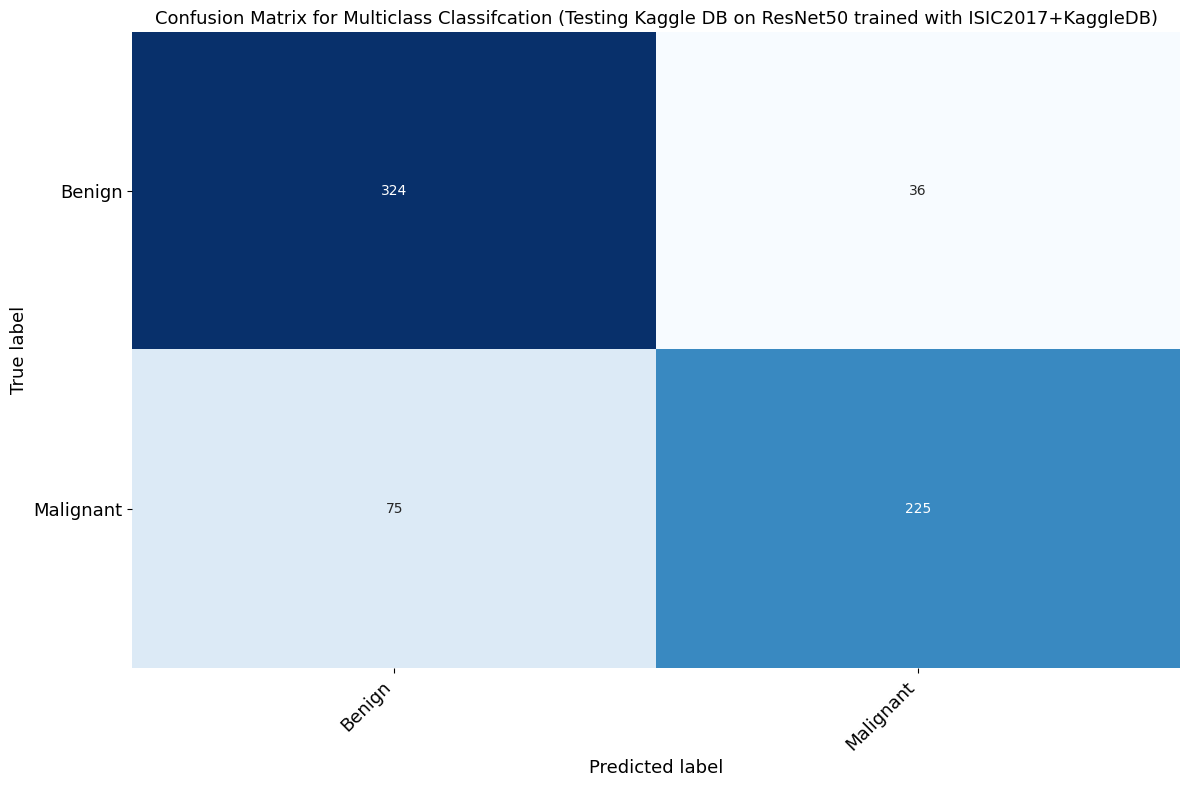

Testing on HAM10000
Evaluating Testing HAM10000 on ResNet50 trained with ISIC2017+KaggleDB model...



251/251 [==============================] - 6s 23ms/step - loss: 0.5504 - accuracy: 0.7467
Train loss = 0.5503718256950378  ;  Train accuracy = 74.67%

28/28 [==============================] - 1s 27ms/step - loss: 0.3417 - accuracy: 0.8630
Validation loss = 0.34168800711631775  ;  Validation accuracy = 86.30%

35/35 [==============================] - 1s 25ms/step - loss: 0.3311 - accuracy: 0.8713
Test loss = 0.3310818672180176  ;  Test accuracy = 87.13%
Computing predictions for Testing HAM10000 on ResNet50 trained with ISIC2017+KaggleDB...
Model report for Testing HAM10000 on ResNet50 trained with ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.96      0.74      0.84      6994
   Malignant       0.31      0.78      0.44      1035

    accuracy                           0.75      8029
   macro avg       0.63      0.76      0.64      8029
weighted avg       0.87      0.75      0.79      8029

Test Report :
         

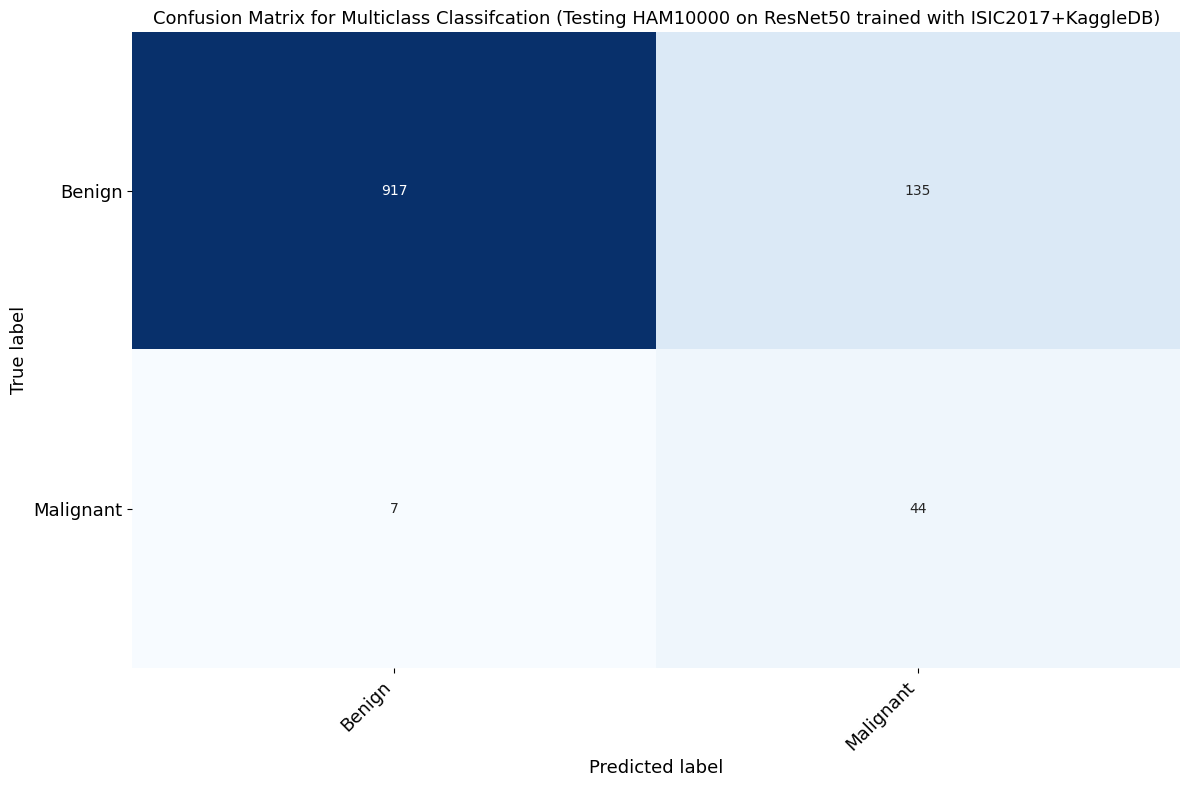

Testing on ISIC2016
Evaluating Testing ISIC2016 on ResNet50 trained with ISIC2017+KaggleDB model...



23/23 [==============================] - 1s 28ms/step - loss: 0.3709 - accuracy: 0.8347
Train loss = 0.37089264392852783  ;  Train accuracy = 83.47%

6/6 [==============================] - 0s 21ms/step - loss: 0.3475 - accuracy: 0.8667
Validation loss = 0.34750494360923767  ;  Validation accuracy = 86.67%

12/12 [==============================] - 0s 22ms/step - loss: 0.3573 - accuracy: 0.8549
Test loss = 0.35728904604911804  ;  Test accuracy = 85.49%
Computing predictions for Testing ISIC2016 on ResNet50 trained with ISIC2017+KaggleDB...
Model report for Testing ISIC2016 on ResNet50 trained with ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.91      0.89      0.90       583
   Malignant       0.56      0.61      0.58       137

    accuracy                           0.83       720
   macro avg       0.73      0.75      0.74       720
weighted avg       0.84      0.83      0.84       720

Test Report :
           

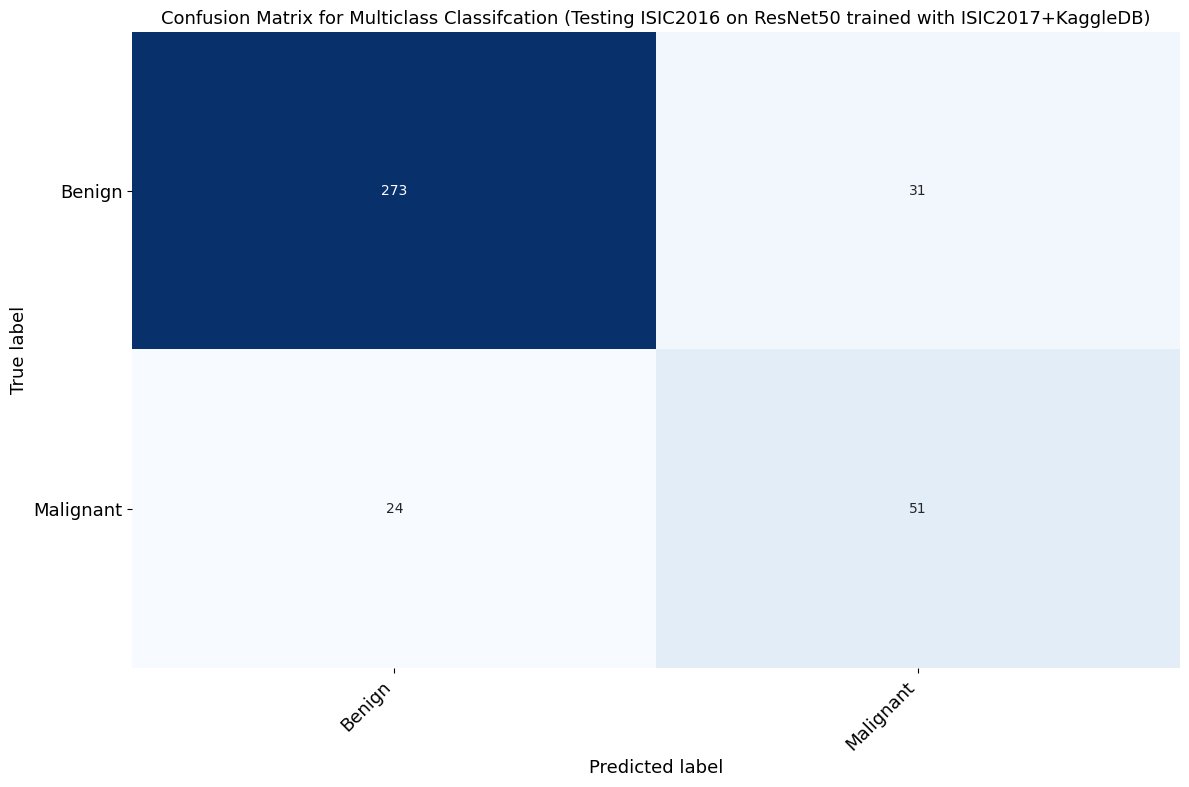

Testing on ISIC2017
Evaluating Testing ISIC2017 on ResNet50 trained with ISIC2017+KaggleDB model...



63/63 [==============================] - 2s 27ms/step - loss: 0.3591 - accuracy: 0.8470
Train loss = 0.3591395318508148  ;  Train accuracy = 84.70%

5/5 [==============================] - 0s 30ms/step - loss: 0.4337 - accuracy: 0.8000
Validation loss = 0.43371400237083435  ;  Validation accuracy = 80.00%

19/19 [==============================] - 1s 27ms/step - loss: 0.5056 - accuracy: 0.7850
Test loss = 0.5055908560752869  ;  Test accuracy = 78.50%
Computing predictions for Testing ISIC2017 on ResNet50 trained with ISIC2017+KaggleDB...
Model report for Testing ISIC2017 on ResNet50 trained with ISIC2017+KaggleDB model ->


Train Report :
               precision    recall  f1-score   support

      Benign       0.91      0.90      0.91      1626
   Malignant       0.59      0.60      0.60       374

    accuracy                           0.85      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.85      0.85      0.85      2000

Test Report :
             

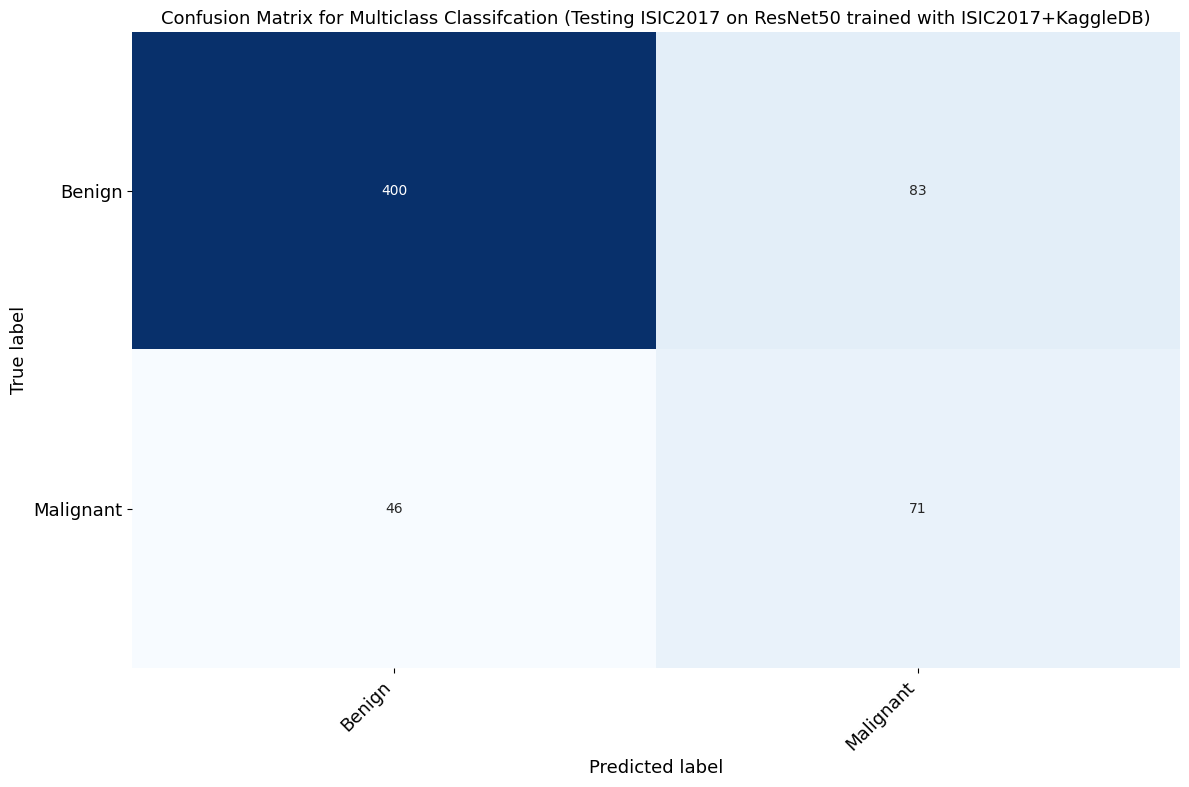

In [30]:
model_name = 'ResNet50 trained with ISIC2017+KaggleDB'
filename = 'ResNet50 on ISIC2017+KaggleDB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

dbpath_KaggleDB = dbpath+'/'+f'KaggleDB_{img_size[0]}h_{img_size[1]}w.pkl'
dbpath_HAM10000 = dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2016 = dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl'
dbpath_ISIC2017 = dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl'

base_model.evaluate_model_onAll(model_name, modelpath, dbpath_KaggleDB, dbpath_HAM10000, dbpath_ISIC2016, dbpath_ISIC2017)
